In [1]:
import time
from options.train_options import TrainOptions
from data.data_loader import CreateDataLoader, CreateDataLoader_pre
from model.model_Loader import CreatModel
from utils.utils import error


import tqdm
import os
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from data.data_loader import CreateDataLoader_test
from model.Component import one_hot_long, Tensor2Image
from torch.autograd import Variable

from PIL import Image

In [2]:
opt = TrainOptions().parse()
data_loader = CreateDataLoader(opt)
data_loader_pre = CreateDataLoader_pre(opt)
data_loader_test = CreateDataLoader_test(opt)
model = CreatModel(opt)

D_interval: 1
G_interval: 1
N_expr: 6
batchsize: 64
beta1: 0.5
beta2: 0.999
checkpoints_dir: /home/wpk/paper/code/Comparison_experiments/ExprGAN/checkpoints/
count_epoch: 1
epochs: 1001
fm_coeff: 1
gpu_ids: [6]
input_nc: 3
is_Train: True
load_epoch: 0
lr: 0.0002
model: single
output_nc: 3
pretrained_D: None
pretrained_G: None
q_coeff: 1
save_epoch_freq: 50
test_checkpoints_dir: /home/wpk/paper/code/Comparison_experiments/ExprGAN/checkpoints/2020.04.04
test_dir: ./result/2020-04-18_14-16-08
vgg_coeff: 1
model ExprGAN was created


In [3]:
err = error(model.save_dir)
G_list = []
D_z_list = []
D_img_list = []

In [4]:
# 第一部分用Multi-PIE 正脸多表情来训练 50epoch
# 第二部分  50epoch
# 死三部分到1500轮
for epoch in range(opt.count_epoch, 501):
    epoch_start_time = time.time()
    err.initialize()
    
#     model.face_embedding.eval()
    model.Encoder.train()
    model.Decoder.train()
    model.Discriminator_z.train()
    model.Discriminator_img.train()

    if epoch<=0:
#         continue
        for i, data in tqdm.tqdm(enumerate(data_loader_pre)):
            model.forward(data, 1)
            model.optimize_G_parameters(1)
            model.optimize_D_img_parameters(1)
            
#             err.add(model.loss_EG.data.item(), 0, model.loss_Di.data.item())
            
#         if epoch % opt.save_epoch_freq == 0:
#             print('Saving the model at the end of epoch {}\n'.format(epoch))
#             model.save(epoch)
    elif 0<epoch<=0:
        for i, data in tqdm.tqdm(enumerate(data_loader)):
            model.forward(data, 2)
            model.optimize_G_parameters(2)
            model.optimize_D_img_parameters(2)
            
#             err.add(model.loss_EG.data.item(), 0, model.loss_Di.data.item())
            
#         if epoch % opt.save_epoch_freq == 0:
#             print('Saving the model at the end of epoch {}\n'.format(epoch))
#             model.save(epoch)
            
#         LOSSG, LossD_z, LossD_img = err.print_errors(epoch)
        
#         print('vgg_loss', model.vgg_loss.data.item())
#         print('EG_loss', model.EG_loss.data.item())
#         print('fm_loss', model.fm_loss.data.item())
#         print('D_cont_loss_fake', model.D_cont_loss_fake.data.item())
#         print('D_img_loss_input', model.D_img_loss_input.data.item())
#         print('D_img_loss_G', model.D_img_loss_G.data.item())
        
#         print('End of epoch {0} \t Time Taken: {1} sec\n'.format(epoch, time.time()-epoch_start_time))
#         if epoch % 200 == 0:
#             model.save_result(epoch)
    else:
        for i, data in tqdm.tqdm(enumerate(data_loader)):
            model.forward(data, 3)                              
            model.optimize_G_parameters(3)
            model.optimize_D_z_parameters()
            model.optimize_D_img_parameters(3)
            
            err.add(model.loss_EG.data.item(), model.loss_Dz.data.item(), model.loss_Di.data.item())
            
        if epoch % 50 == 0:
            print('Saving the model at the end of epoch {}\n'.format(epoch))
            model.save(epoch)
            
        LOSSG, LossD_z, LossD_img = err.print_errors(epoch)
        
        print('vgg_loss', model.vgg_loss.data.item())
        print('EG_loss', model.EG_loss.data.item())
        print('fm_loss', model.fm_loss.data.item())
        print('G_img_loss', model.G_img_loss.data.item())
        print('E_z_loss', model.E_z_loss.data.item())
        print('tv_loss', model.tv_loss.data.item())
        print('D_cont_loss_fake', model.D_cont_loss_fake.data.item())
        print('D_img_loss_input', model.D_img_loss_input.data.item())
        print('D_img_loss_G', model.D_img_loss_G.data.item())
        
        print('End of epoch {0} \t Time Taken: {1} sec\n'.format(epoch, time.time()-epoch_start_time))
        
        if epoch % 50 == 0:
            model.save_result(epoch)
            
    if epoch > 0:        
        G_list.append(LOSSG)
        D_z_list.append(LossD_z)
        D_img_list.append(LossD_img)

18it [00:21,  1.13s/it]

Loss_G: 1.8891316188706293\Loss_D_z: 1.3880856898095872\Loss_D_img: 2.6096886263953314
vgg_loss 0.007804000284522772
EG_loss 0.19189926981925964
fm_loss 0.16624696552753448
G_img_loss 1.044656753540039
E_z_loss 0.6635316014289856
tv_loss 0.45518797636032104
D_cont_loss_fake 1.2446484565734863
D_img_loss_input 0.5539253950119019
D_img_loss_G 0.44288623332977295
End of epoch 1 	 Time Taken: 21.321544647216797 sec




18it [00:20,  1.14s/it]

Loss_G: 1.2830221321847703\Loss_D_z: 1.3835469086964924\Loss_D_img: 1.9450566569964092
vgg_loss 0.007427642121911049
EG_loss 0.15113209187984467
fm_loss 0.1581794023513794
G_img_loss 1.0113322734832764
E_z_loss 0.6761953830718994
tv_loss 0.46289002895355225
D_cont_loss_fake 0.7819916605949402
D_img_loss_input 0.4945513606071472
D_img_loss_G 0.47669434547424316
End of epoch 2 	 Time Taken: 21.05025362968445 sec




18it [00:20,  1.13s/it]

Loss_G: 1.0169212354554071\Loss_D_z: 1.3802515202098422\Loss_D_img: 1.713397377067142
vgg_loss 0.007130463141947985
EG_loss 0.13936160504817963
fm_loss 0.1542973518371582
G_img_loss 1.1399452686309814
E_z_loss 0.6842029094696045
tv_loss 0.45772552490234375
D_cont_loss_fake 0.6140459179878235
D_img_loss_input 0.6048723459243774
D_img_loss_G 0.41711848974227905
End of epoch 3 	 Time Taken: 21.069278717041016 sec




18it [00:20,  1.13s/it]

Loss_G: 0.8522376616795858\Loss_D_z: 1.376611782444848\Loss_D_img: 1.4498584005567763
vgg_loss 0.006731472443789244
EG_loss 0.1291736215353012
fm_loss 0.1824929267168045
G_img_loss 1.1816575527191162
E_z_loss 0.6905378103256226
tv_loss 0.43158993124961853
D_cont_loss_fake 0.4750772714614868
D_img_loss_input 0.3987094759941101
D_img_loss_G 0.3998810052871704
End of epoch 4 	 Time Taken: 20.954113483428955 sec




18it [00:20,  1.12s/it]

Loss_G: 0.7404261661900414\Loss_D_z: 1.3714197940296597\Loss_D_img: 1.2499931388431125
vgg_loss 0.006673444993793964
EG_loss 0.12994085252285004
fm_loss 0.19587987661361694
G_img_loss 1.3291916847229004
E_z_loss 0.6988232135772705
tv_loss 0.45183295011520386
D_cont_loss_fake 0.44130590558052063
D_img_loss_input 0.4951012134552002
D_img_loss_G 0.3190210163593292
End of epoch 5 	 Time Taken: 20.857025146484375 sec




18it [00:20,  1.13s/it]

Loss_G: 0.6630499396059248\Loss_D_z: 1.3677849107318454\Loss_D_img: 1.1252889467610254
vgg_loss 0.0065418025478720665
EG_loss 0.1287653148174286
fm_loss 0.22185468673706055
G_img_loss 1.3565040826797485
E_z_loss 0.7091012597084045
tv_loss 0.46641597151756287
D_cont_loss_fake 0.40083491802215576
D_img_loss_input 0.2671215534210205
D_img_loss_G 0.30438482761383057
End of epoch 6 	 Time Taken: 20.93598985671997 sec




18it [00:20,  1.13s/it]

Loss_G: 0.5844527880350748\Loss_D_z: 1.3646055393748813\Loss_D_img: 0.9051637351512909
vgg_loss 0.006458005867898464
EG_loss 0.12764598429203033
fm_loss 0.22389471530914307
G_img_loss 1.628772258758545
E_z_loss 0.7144105434417725
tv_loss 0.537254810333252
D_cont_loss_fake 0.2973752021789551
D_img_loss_input 0.4523881673812866
D_img_loss_G 0.2326849400997162
End of epoch 7 	 Time Taken: 20.925073862075806 sec




18it [00:20,  1.13s/it]

Loss_G: 0.5565863947073618\Loss_D_z: 1.3596576982074313\Loss_D_img: 0.8625233537620969
vgg_loss 0.006412719376385212
EG_loss 0.12724152207374573
fm_loss 0.23216255009174347
G_img_loss 1.449042797088623
E_z_loss 0.7167664766311646
tv_loss 0.5277849435806274
D_cont_loss_fake 0.23396356403827667
D_img_loss_input 0.28109005093574524
D_img_loss_G 0.28200584650039673
End of epoch 8 	 Time Taken: 21.064080953598022 sec




18it [00:20,  1.13s/it]

Loss_G: 0.522514111465878\Loss_D_z: 1.3529565864139133\Loss_D_img: 0.8321970370080736
vgg_loss 0.006330446805804968
EG_loss 0.12311670184135437
fm_loss 0.25030553340911865
G_img_loss 1.8551113605499268
E_z_loss 0.721454918384552
tv_loss 0.5154844522476196
D_cont_loss_fake 0.2328929603099823
D_img_loss_input 0.2491512894630432
D_img_loss_G 0.17263585329055786
End of epoch 9 	 Time Taken: 20.9977285861969 sec




18it [00:20,  1.14s/it]

Loss_G: 0.49829839335547554\Loss_D_z: 1.346733848253886\Loss_D_img: 0.801516572634379
vgg_loss 0.0061974842101335526
EG_loss 0.12544368207454681
fm_loss 0.2568650245666504
G_img_loss 1.6715261936187744
E_z_loss 0.7234534025192261
tv_loss 0.6070992946624756
D_cont_loss_fake 0.2055620551109314
D_img_loss_input 0.2323908656835556
D_img_loss_G 0.22653767466545105
End of epoch 10 	 Time Taken: 21.032463788986206 sec




18it [00:20,  1.12s/it]

Loss_G: 0.45741866694556343\Loss_D_z: 1.3415809207492404\Loss_D_img: 0.6226276357968649
vgg_loss 0.006081366911530495
EG_loss 0.12351682037115097
fm_loss 0.2727022171020508
G_img_loss 1.1946626901626587
E_z_loss 0.7332761883735657
tv_loss 0.6351141929626465
D_cont_loss_fake 0.16193872690200806
D_img_loss_input 0.1437000036239624
D_img_loss_G 0.37706926465034485
End of epoch 11 	 Time Taken: 20.886446475982666 sec




18it [00:20,  1.13s/it]

Loss_G: 0.4396558668878343\Loss_D_z: 1.332285828060574\Loss_D_img: 0.6701968560616175
vgg_loss 0.006239667534828186
EG_loss 0.12333448231220245
fm_loss 0.2647380232810974
G_img_loss 1.9414280652999878
E_z_loss 0.744721531867981
tv_loss 0.5477076768875122
D_cont_loss_fake 0.1854884922504425
D_img_loss_input 0.22367244958877563
D_img_loss_G 0.1828785389661789
End of epoch 12 	 Time Taken: 20.98285961151123 sec




18it [00:20,  1.13s/it]

Loss_G: 0.4105794413222207\Loss_D_z: 1.3290582829051547\Loss_D_img: 0.5319960547818078
vgg_loss 0.005995248444378376
EG_loss 0.13352197408676147
fm_loss 0.263323038816452
G_img_loss 2.0910086631774902
E_z_loss 0.7344095706939697
tv_loss 0.635857880115509
D_cont_loss_fake 0.15416210889816284
D_img_loss_input 0.2665909230709076
D_img_loss_G 0.13744595646858215
End of epoch 13 	 Time Taken: 21.158393621444702 sec




18it [00:20,  1.15s/it]

Loss_G: 0.4072085569302241\Loss_D_z: 1.321739461686876\Loss_D_img: 0.5328205823898315
vgg_loss 0.006166466046124697
EG_loss 0.11912205815315247
fm_loss 0.2783191502094269
G_img_loss 1.8130755424499512
E_z_loss 0.7544205188751221
tv_loss 0.6347333192825317
D_cont_loss_fake 0.12656405568122864
D_img_loss_input 0.17726629972457886
D_img_loss_G 0.23842084407806396
End of epoch 14 	 Time Taken: 21.221408128738403 sec




18it [00:20,  1.14s/it]

Loss_G: 0.4103929681910409\Loss_D_z: 1.3137133253945246\Loss_D_img: 0.7359831399387784
vgg_loss 0.005935382097959518
EG_loss 0.11517663300037384
fm_loss 0.27559995651245117
G_img_loss 1.8078904151916504
E_z_loss 0.7567846775054932
tv_loss 0.6452599167823792
D_cont_loss_fake 0.11521066725254059
D_img_loss_input 0.2105008065700531
D_img_loss_G 0.19704493880271912
End of epoch 15 	 Time Taken: 21.146224975585938 sec




18it [00:20,  1.13s/it]

Loss_G: 0.37657613555590314\Loss_D_z: 1.3058239685164557\Loss_D_img: 0.4682087202866872
vgg_loss 0.00590195506811142
EG_loss 0.11565336585044861
fm_loss 0.2655569314956665
G_img_loss 1.643155813217163
E_z_loss 0.7660225033760071
tv_loss 0.6832435131072998
D_cont_loss_fake 0.11305209994316101
D_img_loss_input 0.14133143424987793
D_img_loss_G 0.24760839343070984
End of epoch 16 	 Time Taken: 21.190666675567627 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3941819585031933\Loss_D_z: 1.2938520908355713\Loss_D_img: 0.6886508166790009
vgg_loss 0.005825711879879236
EG_loss 0.11356731504201889
fm_loss 0.25746339559555054
G_img_loss 2.159550666809082
E_z_loss 0.7601919174194336
tv_loss 0.6775940656661987
D_cont_loss_fake 0.10821197926998138
D_img_loss_input 0.18570207059383392
D_img_loss_G 0.12964439392089844
End of epoch 17 	 Time Taken: 21.076009035110474 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3662976821263631\Loss_D_z: 1.284339189529419\Loss_D_img: 0.5526120464007059
vgg_loss 0.006006905343383551
EG_loss 0.11348669230937958
fm_loss 0.2725973129272461
G_img_loss 1.983508825302124
E_z_loss 0.7875438332557678
tv_loss 0.6100380420684814
D_cont_loss_fake 0.10245642811059952
D_img_loss_input 0.14846861362457275
D_img_loss_G 0.16822367906570435
End of epoch 18 	 Time Taken: 20.92177653312683 sec




18it [00:20,  1.12s/it]

Loss_G: 0.3618515017959807\Loss_D_z: 1.2848282588852777\Loss_D_img: 0.4887586418125365
vgg_loss 0.005846621468663216
EG_loss 0.11776916682720184
fm_loss 0.26902246475219727
G_img_loss 2.372060775756836
E_z_loss 0.7783012390136719
tv_loss 0.6608712077140808
D_cont_loss_fake 0.11283289641141891
D_img_loss_input 0.26995110511779785
D_img_loss_G 0.11632052063941956
End of epoch 19 	 Time Taken: 20.89027428627014 sec




18it [00:20,  1.13s/it]

Loss_G: 0.35921116338835823\Loss_D_z: 1.2845685614479914\Loss_D_img: 0.6711004790332582
vgg_loss 0.0057900287210941315
EG_loss 0.11101224273443222
fm_loss 0.27547138929367065
G_img_loss 1.5924437046051025
E_z_loss 0.7789108753204346
tv_loss 0.6392608284950256
D_cont_loss_fake 0.09741055220365524
D_img_loss_input 0.16457480192184448
D_img_loss_G 0.2424566000699997
End of epoch 20 	 Time Taken: 21.002087831497192 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3435008641746309\Loss_D_z: 1.2716312143537734\Loss_D_img: 0.5983046111133363
vgg_loss 0.005888266023248434
EG_loss 0.11230611801147461
fm_loss 0.25303971767425537
G_img_loss 1.5444892644882202
E_z_loss 0.7807815074920654
tv_loss 0.6604440212249756
D_cont_loss_fake 0.09775324165821075
D_img_loss_input 0.1136665791273117
D_img_loss_G 0.28486669063568115
End of epoch 21 	 Time Taken: 21.01258611679077 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3487679892116123\Loss_D_z: 1.263283325566186\Loss_D_img: 0.4946322871579064
vgg_loss 0.006043634843081236
EG_loss 0.11965598911046982
fm_loss 0.273117333650589
G_img_loss 1.8255689144134521
E_z_loss 0.7983956336975098
tv_loss 0.7866047620773315
D_cont_loss_fake 0.0615408681333065
D_img_loss_input 0.17163661122322083
D_img_loss_G 0.20059823989868164
End of epoch 22 	 Time Taken: 20.985473155975342 sec




18it [00:20,  1.12s/it]

Loss_G: 0.3497714069154527\Loss_D_z: 1.2526170876291063\Loss_D_img: 0.6359092824988894
vgg_loss 0.0057824659161269665
EG_loss 0.10960026830434799
fm_loss 0.2960466742515564
G_img_loss 2.135241985321045
E_z_loss 0.7941348552703857
tv_loss 0.6092711091041565
D_cont_loss_fake 0.0910140872001648
D_img_loss_input 0.15140725672245026
D_img_loss_G 0.18943065404891968
End of epoch 23 	 Time Taken: 20.916887283325195 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3358818110492494\Loss_D_z: 1.2511285079850092\Loss_D_img: 0.60027876496315
vgg_loss 0.006017044652253389
EG_loss 0.11326655000448227
fm_loss 0.2861931324005127
G_img_loss 0.5548685789108276
E_z_loss 0.8112467527389526
tv_loss 0.779083251953125
D_cont_loss_fake 0.09957483410835266
D_img_loss_input 0.10449814796447754
D_img_loss_G 1.0316258668899536
End of epoch 24 	 Time Taken: 20.955124616622925 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3390578611029519\Loss_D_z: 1.2325932913356357\Loss_D_img: 0.43522220684422386
vgg_loss 0.00589314429089427
EG_loss 0.11307396739721298
fm_loss 0.26659494638442993
G_img_loss 1.761502742767334
E_z_loss 0.8149905800819397
tv_loss 0.7149587273597717
D_cont_loss_fake 0.06609265506267548
D_img_loss_input 0.09197883307933807
D_img_loss_G 0.21423275768756866
End of epoch 25 	 Time Taken: 21.024075269699097 sec




18it [00:20,  1.13s/it]

Loss_G: 0.33245669305324554\Loss_D_z: 1.2268860273891025\Loss_D_img: 0.6337723102834489
vgg_loss 0.005725501570850611
EG_loss 0.11145474761724472
fm_loss 0.24912987649440765
G_img_loss 1.7886502742767334
E_z_loss 0.8274807929992676
tv_loss 0.7016460299491882
D_cont_loss_fake 0.07417868822813034
D_img_loss_input 0.12751074135303497
D_img_loss_G 0.1987391859292984
End of epoch 26 	 Time Taken: 20.90577220916748 sec




18it [00:20,  1.14s/it]

Loss_G: 0.33148424989647335\Loss_D_z: 1.2163929409450955\Loss_D_img: 0.5267426355017556
vgg_loss 0.005645282566547394
EG_loss 0.10730418562889099
fm_loss 0.2683893144130707
G_img_loss 2.3790640830993652
E_z_loss 0.839451789855957
tv_loss 0.6257225275039673
D_cont_loss_fake 0.07862305641174316
D_img_loss_input 0.2053522765636444
D_img_loss_G 0.10895669460296631
End of epoch 27 	 Time Taken: 20.979263305664062 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3308420462740792\Loss_D_z: 1.2111019161012437\Loss_D_img: 0.551311355498102
vgg_loss 0.005501358769834042
EG_loss 0.10485320538282394
fm_loss 0.24742965400218964
G_img_loss 1.921704649925232
E_z_loss 0.853236198425293
tv_loss 0.5852912068367004
D_cont_loss_fake 0.07945914566516876
D_img_loss_input 0.16365396976470947
D_img_loss_G 0.22458875179290771
End of epoch 28 	 Time Taken: 21.064900875091553 sec




18it [00:20,  1.13s/it]

Loss_G: 0.32006096839904785\Loss_D_z: 1.2014813092019823\Loss_D_img: 0.4196416520410114
vgg_loss 0.005595592316240072
EG_loss 0.1076364815235138
fm_loss 0.23961815237998962
G_img_loss 2.440321922302246
E_z_loss 0.8635799884796143
tv_loss 0.6798960566520691
D_cont_loss_fake 0.07423379272222519
D_img_loss_input 0.1690596640110016
D_img_loss_G 0.09893672168254852
End of epoch 29 	 Time Taken: 20.862716913223267 sec




18it [00:20,  1.13s/it]

Loss_G: 0.31957591738965774\Loss_D_z: 1.1876874963442485\Loss_D_img: 0.5759600235356225
vgg_loss 0.0057112849317491055
EG_loss 0.11045002937316895
fm_loss 0.2555111050605774
G_img_loss 1.9317083358764648
E_z_loss 0.8716104030609131
tv_loss 0.7476766109466553
D_cont_loss_fake 0.06595484912395477
D_img_loss_input 0.20050865411758423
D_img_loss_G 0.18437203764915466
End of epoch 30 	 Time Taken: 21.13285493850708 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3220113135046429\Loss_D_z: 1.1815611720085144\Loss_D_img: 0.5314656347036362
vgg_loss 0.00565437413752079
EG_loss 0.11038480699062347
fm_loss 0.24448935687541962
G_img_loss 2.3842883110046387
E_z_loss 0.8520130515098572
tv_loss 0.7262707352638245
D_cont_loss_fake 0.05868382379412651
D_img_loss_input 0.3855600357055664
D_img_loss_G 0.1153726577758789
End of epoch 31 	 Time Taken: 20.974884748458862 sec




18it [00:20,  1.14s/it]

Loss_G: 0.32088683545589447\Loss_D_z: 1.164456268151601\Loss_D_img: 0.5075393964846929
vgg_loss 0.005496974103152752
EG_loss 0.10816192626953125
fm_loss 0.27504920959472656
G_img_loss 1.035018801689148
E_z_loss 0.8754900693893433
tv_loss 0.7795826196670532
D_cont_loss_fake 0.06960578262805939
D_img_loss_input 0.1150946244597435
D_img_loss_G 0.654853343963623
End of epoch 32 	 Time Taken: 21.033548831939697 sec




18it [00:20,  1.13s/it]

Loss_G: 0.32062773240937126\Loss_D_z: 1.1555769311057196\Loss_D_img: 0.6797438909610113
vgg_loss 0.005710196681320667
EG_loss 0.11146339029073715
fm_loss 0.23475250601768494
G_img_loss 2.074131727218628
E_z_loss 0.8668615221977234
tv_loss 0.7010715007781982
D_cont_loss_fake 0.08626954257488251
D_img_loss_input 0.2829827666282654
D_img_loss_G 0.2651318907737732
End of epoch 33 	 Time Taken: 21.066853284835815 sec




18it [00:20,  1.14s/it]

Loss_G: 0.31477266715632546\Loss_D_z: 1.1424182256062825\Loss_D_img: 0.4111197392145793
vgg_loss 0.005680580157786608
EG_loss 0.1059504896402359
fm_loss 0.24499371647834778
G_img_loss 2.386895179748535
E_z_loss 0.8971486687660217
tv_loss 0.7943763732910156
D_cont_loss_fake 0.06021280586719513
D_img_loss_input 0.21865035593509674
D_img_loss_G 0.12089060992002487
End of epoch 34 	 Time Taken: 20.96542453765869 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3103176603714625\Loss_D_z: 1.1358009444342718\Loss_D_img: 0.48677195111910504
vgg_loss 0.00561700901016593
EG_loss 0.10912543535232544
fm_loss 0.2561691105365753
G_img_loss 1.3693022727966309
E_z_loss 0.9138548374176025
tv_loss 0.7477506995201111
D_cont_loss_fake 0.06642920523881912
D_img_loss_input 0.08750028908252716
D_img_loss_G 0.3485132157802582
End of epoch 35 	 Time Taken: 21.04822826385498 sec




18it [00:20,  1.14s/it]

Loss_G: 0.31555650962723625\Loss_D_z: 1.129816512266795\Loss_D_img: 0.515915948483679
vgg_loss 0.00552556524053216
EG_loss 0.10739897191524506
fm_loss 0.27220872044563293
G_img_loss 2.191283941268921
E_z_loss 0.9230849146842957
tv_loss 0.7022696733474731
D_cont_loss_fake 0.06140562519431114
D_img_loss_input 0.2055545449256897
D_img_loss_G 0.16994020342826843
End of epoch 36 	 Time Taken: 21.053011178970337 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3120521853367488\Loss_D_z: 1.1379865739080641\Loss_D_img: 0.46742827859189773
vgg_loss 0.00568031333386898
EG_loss 0.1062123104929924
fm_loss 0.2563376724720001
G_img_loss 2.811795711517334
E_z_loss 0.9284677505493164
tv_loss 0.8543789386749268
D_cont_loss_fake 0.06206725165247917
D_img_loss_input 0.3148278594017029
D_img_loss_G 0.07283821702003479
End of epoch 37 	 Time Taken: 20.984818696975708 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3118980328241984\Loss_D_z: 1.1185584333207872\Loss_D_img: 0.5855361074209213
vgg_loss 0.005548600573092699
EG_loss 0.10623453557491302
fm_loss 0.2510749399662018
G_img_loss 2.06721568107605
E_z_loss 0.9397760629653931
tv_loss 0.6890964508056641
D_cont_loss_fake 0.06854525953531265
D_img_loss_input 0.1458120048046112
D_img_loss_G 0.21411846578121185
End of epoch 38 	 Time Taken: 20.999412059783936 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3100235213836034\Loss_D_z: 1.0941370460722182\Loss_D_img: 0.4269489844640096
vgg_loss 0.0056517766788601875
EG_loss 0.10648876428604126
fm_loss 0.24705801904201508
G_img_loss 2.3226325511932373
E_z_loss 0.9331402778625488
tv_loss 0.8565239906311035
D_cont_loss_fake 0.07704119384288788
D_img_loss_input 0.22240734100341797
D_img_loss_G 0.11533094942569733
End of epoch 39 	 Time Taken: 21.063640356063843 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3125120798746745\Loss_D_z: 1.091343343257904\Loss_D_img: 0.4751944724056456
vgg_loss 0.005772066302597523
EG_loss 0.10734911262989044
fm_loss 0.24328261613845825
G_img_loss 2.53145694732666
E_z_loss 0.9179401397705078
tv_loss 0.9518841505050659
D_cont_loss_fake 0.0683923289179802
D_img_loss_input 0.44827800989151
D_img_loss_G 0.09886529296636581
End of epoch 40 	 Time Taken: 20.955942392349243 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30808542999956345\Loss_D_z: 1.0804700255393982\Loss_D_img: 0.5566170182492998
vgg_loss 0.00564623111858964
EG_loss 0.1063258945941925
fm_loss 0.24302677810192108
G_img_loss 2.3923559188842773
E_z_loss 0.9487934112548828
tv_loss 0.7934861183166504
D_cont_loss_fake 0.06334423273801804
D_img_loss_input 0.3384111523628235
D_img_loss_G 0.13005337119102478
End of epoch 41 	 Time Taken: 21.02916169166565 sec




18it [00:20,  1.14s/it]

Loss_G: 0.3031584206554625\Loss_D_z: 1.1004179384973314\Loss_D_img: 0.4603649063242806
vgg_loss 0.005826226901262999
EG_loss 0.10880725085735321
fm_loss 0.2659241855144501
G_img_loss 2.800546169281006
E_z_loss 0.9163734912872314
tv_loss 0.8621463775634766
D_cont_loss_fake 0.08141434192657471
D_img_loss_input 0.3881989121437073
D_img_loss_G 0.06941308081150055
End of epoch 42 	 Time Taken: 21.13557481765747 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30879134436448413\Loss_D_z: 1.0656102630827162\Loss_D_img: 0.5471685296959348
vgg_loss 0.0056246500462293625
EG_loss 0.10801085829734802
fm_loss 0.25053900480270386
G_img_loss 2.511444091796875
E_z_loss 0.9446485042572021
tv_loss 0.8185358643531799
D_cont_loss_fake 0.049009770154953
D_img_loss_input 0.30118444561958313
D_img_loss_G 0.10600504279136658
End of epoch 43 	 Time Taken: 20.893531322479248 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30512122644318473\Loss_D_z: 1.0545613235897489\Loss_D_img: 0.47304774324099225
vgg_loss 0.005656283814460039
EG_loss 0.10832834243774414
fm_loss 0.26251524686813354
G_img_loss 2.1070380210876465
E_z_loss 0.9890434145927429
tv_loss 0.8247131109237671
D_cont_loss_fake 0.06434130668640137
D_img_loss_input 0.14566972851753235
D_img_loss_G 0.17056608200073242
End of epoch 44 	 Time Taken: 21.05603313446045 sec




18it [00:20,  1.12s/it]

Loss_G: 0.3023579352431827\Loss_D_z: 1.0512813528378804\Loss_D_img: 0.44999899963537854
vgg_loss 0.005631111096590757
EG_loss 0.10680487751960754
fm_loss 0.24484029412269592
G_img_loss 1.9331777095794678
E_z_loss 0.967039942741394
tv_loss 0.8636415004730225
D_cont_loss_fake 0.05996004864573479
D_img_loss_input 0.25277721881866455
D_img_loss_G 0.23538872599601746
End of epoch 45 	 Time Taken: 20.951096534729004 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3056718640857273\Loss_D_z: 1.0403755638334486\Loss_D_img: 0.5601997756295733
vgg_loss 0.005534513853490353
EG_loss 0.10315132141113281
fm_loss 0.24515177309513092
G_img_loss 2.8620998859405518
E_z_loss 1.006197214126587
tv_loss 0.8374833464622498
D_cont_loss_fake 0.07320365309715271
D_img_loss_input 0.6512337327003479
D_img_loss_G 0.07928918302059174
End of epoch 46 	 Time Taken: 21.00122094154358 sec




18it [00:20,  1.13s/it]

Loss_G: 0.305828344490793\Loss_D_z: 1.022281242741479\Loss_D_img: 0.563175661696328
vgg_loss 0.00531513849273324
EG_loss 0.10375162214040756
fm_loss 0.2551692724227905
G_img_loss 2.17203950881958
E_z_loss 1.0207148790359497
tv_loss 0.7330367565155029
D_cont_loss_fake 0.04802371561527252
D_img_loss_input 0.09188978374004364
D_img_loss_G 0.17060518264770508
End of epoch 47 	 Time Taken: 21.05563235282898 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3003876921203401\Loss_D_z: 1.0059361159801483\Loss_D_img: 0.49398526383770835
vgg_loss 0.005364981479942799
EG_loss 0.09891891479492188
fm_loss 0.263724684715271
G_img_loss 1.7104027271270752
E_z_loss 1.0160249471664429
tv_loss 0.7891677618026733
D_cont_loss_fake 0.051987648010253906
D_img_loss_input 0.11887488514184952
D_img_loss_G 0.25879549980163574
End of epoch 48 	 Time Taken: 21.21919345855713 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2983892295095656\Loss_D_z: 0.9994530710909102\Loss_D_img: 0.4965531412098143
vgg_loss 0.005414494313299656
EG_loss 0.10268490761518478
fm_loss 0.25453799962997437
G_img_loss 2.366807699203491
E_z_loss 1.0749497413635254
tv_loss 0.7462105751037598
D_cont_loss_fake 0.06145445257425308
D_img_loss_input 0.10328155755996704
D_img_loss_G 0.12098623812198639
End of epoch 49 	 Time Taken: 20.973839044570923 sec




18it [00:20,  1.13s/it]


Saving the model at the end of epoch 50

Loss_G: 0.2982033888498942\Loss_D_z: 0.9818687670760684\Loss_D_img: 0.49060579968823326
vgg_loss 0.005515732802450657
EG_loss 0.104936882853508
fm_loss 0.26350563764572144
G_img_loss 1.103476881980896
E_z_loss 1.016855239868164
tv_loss 0.9281426668167114
D_cont_loss_fake 0.06010354682803154
D_img_loss_input 0.1648305058479309
D_img_loss_G 0.8080328702926636
End of epoch 50 	 Time Taken: 21.766330003738403 sec



18it [00:20,  1.13s/it]

Loss_G: 0.3004294004705217\Loss_D_z: 0.9673970209227668\Loss_D_img: 0.48291610678037006
vgg_loss 0.005271316040307283
EG_loss 0.10162415355443954
fm_loss 0.25477612018585205
G_img_loss 2.245455741882324
E_z_loss 1.038351058959961
tv_loss 0.8724777698516846
D_cont_loss_fake 0.05518220737576485
D_img_loss_input 0.24153350293636322
D_img_loss_G 0.195316880941391
End of epoch 51 	 Time Taken: 20.876063346862793 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2971066004700131\Loss_D_z: 0.958101792467965\Loss_D_img: 0.4329175502061844
vgg_loss 0.005260963924229145
EG_loss 0.1014755591750145
fm_loss 0.263477623462677
G_img_loss 1.8723291158676147
E_z_loss 1.0372356176376343
tv_loss 0.8862340450286865
D_cont_loss_fake 0.047967493534088135
D_img_loss_input 0.16623061895370483
D_img_loss_G 0.20766767859458923
End of epoch 52 	 Time Taken: 21.046432971954346 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30336952540609574\Loss_D_z: 0.95609340733952\Loss_D_img: 0.5043024155828688
vgg_loss 0.005306617822498083
EG_loss 0.10067519545555115
fm_loss 0.2595621347427368
G_img_loss 2.417556047439575
E_z_loss 1.0618007183074951
tv_loss 0.8603492379188538
D_cont_loss_fake 0.08010400831699371
D_img_loss_input 0.2527368664741516
D_img_loss_G 0.14138159155845642
End of epoch 53 	 Time Taken: 21.010529279708862 sec




18it [00:20,  1.15s/it]

Loss_G: 0.29480568567911786\Loss_D_z: 0.9414048161771562\Loss_D_img: 0.6410610675811768
vgg_loss 0.005183847155421972
EG_loss 0.10679750144481659
fm_loss 0.23904551565647125
G_img_loss 2.467095375061035
E_z_loss 1.0166856050491333
tv_loss 0.7220396995544434
D_cont_loss_fake 0.04609331861138344
D_img_loss_input 0.24331334233283997
D_img_loss_G 0.14305493235588074
End of epoch 54 	 Time Taken: 21.038020133972168 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2908373524745305\Loss_D_z: 0.9527376459704505\Loss_D_img: 0.4642689890331692
vgg_loss 0.005307546351104975
EG_loss 0.09945541620254517
fm_loss 0.23721538484096527
G_img_loss 2.3509860038757324
E_z_loss 1.0466139316558838
tv_loss 0.8895508050918579
D_cont_loss_fake 0.06206528842449188
D_img_loss_input 0.48115408420562744
D_img_loss_G 0.14010117948055267
End of epoch 55 	 Time Taken: 21.001861333847046 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2962101697921753\Loss_D_z: 0.944736940993203\Loss_D_img: 0.515207611852222
vgg_loss 0.005160720087587833
EG_loss 0.09800790250301361
fm_loss 0.255426287651062
G_img_loss 2.2993154525756836
E_z_loss 1.0661216974258423
tv_loss 0.7932958602905273
D_cont_loss_fake 0.047584470361471176
D_img_loss_input 0.1907503306865692
D_img_loss_G 0.15066975355148315
End of epoch 56 	 Time Taken: 20.935133934020996 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29418833553791046\Loss_D_z: 0.9128440287378099\Loss_D_img: 0.45366819037331474
vgg_loss 0.005595160648226738
EG_loss 0.10494941473007202
fm_loss 0.2677690088748932
G_img_loss 1.8935697078704834
E_z_loss 1.0471482276916504
tv_loss 0.9329379200935364
D_cont_loss_fake 0.05998917669057846
D_img_loss_input 0.17161589860916138
D_img_loss_G 0.2347060739994049
End of epoch 57 	 Time Taken: 20.911757469177246 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2952262709538142\Loss_D_z: 0.9193654722637601\Loss_D_img: 0.5358668267726898
vgg_loss 0.005075451452285051
EG_loss 0.09829142689704895
fm_loss 0.2506733536720276
G_img_loss 2.3472442626953125
E_z_loss 1.1649668216705322
tv_loss 0.7926106452941895
D_cont_loss_fake 0.05197249352931976
D_img_loss_input 0.1739761233329773
D_img_loss_G 0.19771859049797058
End of epoch 58 	 Time Taken: 21.022948026657104 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2948203633228938\Loss_D_z: 0.8980281286769443\Loss_D_img: 0.4485832651456197
vgg_loss 0.00533638522028923
EG_loss 0.0996273010969162
fm_loss 0.25888341665267944
G_img_loss 2.1571381092071533
E_z_loss 1.1162774562835693
tv_loss 0.9462618827819824
D_cont_loss_fake 0.07425998151302338
D_img_loss_input 0.3174659311771393
D_img_loss_G 0.1566096842288971
End of epoch 59 	 Time Taken: 20.985580444335938 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2955801288286845\Loss_D_z: 0.87195685505867\Loss_D_img: 0.4357686721616321
vgg_loss 0.0052435691468417645
EG_loss 0.0995892882347107
fm_loss 0.2632750868797302
G_img_loss 2.528451681137085
E_z_loss 1.145547866821289
tv_loss 0.9410244226455688
D_cont_loss_fake 0.06385155767202377
D_img_loss_input 0.3498132526874542
D_img_loss_G 0.10387255251407623
End of epoch 60 	 Time Taken: 21.03576970100403 sec




18it [00:20,  1.15s/it]

Loss_G: 0.28999323977364433\Loss_D_z: 0.8666157027085623\Loss_D_img: 0.47864395048883224
vgg_loss 0.005179312080144882
EG_loss 0.09772060811519623
fm_loss 0.25101760029792786
G_img_loss 2.364586353302002
E_z_loss 1.162922978401184
tv_loss 0.9368236660957336
D_cont_loss_fake 0.043902598321437836
D_img_loss_input 0.3202081620693207
D_img_loss_G 0.14913757145404816
End of epoch 61 	 Time Taken: 21.04313015937805 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2864243917995029\Loss_D_z: 0.910231288936403\Loss_D_img: 0.4668654402097066
vgg_loss 0.0050973747856915
EG_loss 0.09721153974533081
fm_loss 0.2550227642059326
G_img_loss 2.1708807945251465
E_z_loss 1.0923025608062744
tv_loss 0.8982185125350952
D_cont_loss_fake 0.04915038123726845
D_img_loss_input 0.2506140470504761
D_img_loss_G 0.1583539843559265
End of epoch 62 	 Time Taken: 21.043459177017212 sec




18it [00:20,  1.14s/it]

Loss_G: 0.29620226058695054\Loss_D_z: 0.868956165181266\Loss_D_img: 0.45079083575142753
vgg_loss 0.005088349804282188
EG_loss 0.09933966398239136
fm_loss 0.24836871027946472
G_img_loss 1.9973341226577759
E_z_loss 1.1728661060333252
tv_loss 0.9350944757461548
D_cont_loss_fake 0.06037815660238266
D_img_loss_input 0.14712902903556824
D_img_loss_G 0.18938419222831726
End of epoch 63 	 Time Taken: 21.019882917404175 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2884712533818351\Loss_D_z: 0.8563466800583733\Loss_D_img: 0.5068666057454215
vgg_loss 0.005229154136031866
EG_loss 0.09889285266399384
fm_loss 0.2517227530479431
G_img_loss 2.0446267127990723
E_z_loss 1.140644907951355
tv_loss 0.8692103028297424
D_cont_loss_fake 0.050048600882291794
D_img_loss_input 0.15632706880569458
D_img_loss_G 0.25743067264556885
End of epoch 64 	 Time Taken: 21.046459197998047 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2885194702280892\Loss_D_z: 0.8358547190825144\Loss_D_img: 0.40856293506092495
vgg_loss 0.005197522230446339
EG_loss 0.10087089240550995
fm_loss 0.26878395676612854
G_img_loss 2.2132985591888428
E_z_loss 1.148836374282837
tv_loss 0.9912424683570862
D_cont_loss_fake 0.045307375490665436
D_img_loss_input 0.15781466662883759
D_img_loss_G 0.1673462688922882
End of epoch 65 	 Time Taken: 21.045976400375366 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28689101172818077\Loss_D_z: 0.8377476301458147\Loss_D_img: 0.46030871238973403
vgg_loss 0.004995635710656643
EG_loss 0.0938912034034729
fm_loss 0.26117926836013794
G_img_loss 1.841928482055664
E_z_loss 1.1579244136810303
tv_loss 0.9201316833496094
D_cont_loss_fake 0.06415511667728424
D_img_loss_input 0.14112083613872528
D_img_loss_G 0.21693962812423706
End of epoch 66 	 Time Taken: 21.07542324066162 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2890210300683975\Loss_D_z: 0.8325391179985471\Loss_D_img: 0.44185935623115963
vgg_loss 0.005064350552856922
EG_loss 0.09537017345428467
fm_loss 0.2559865713119507
G_img_loss 2.052095890045166
E_z_loss 1.2304904460906982
tv_loss 0.9099995493888855
D_cont_loss_fake 0.05275515094399452
D_img_loss_input 0.1437673270702362
D_img_loss_G 0.19182971119880676
End of epoch 67 	 Time Taken: 20.999039888381958 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2915415151251687\Loss_D_z: 0.7966438863012526\Loss_D_img: 0.4470287296507094
vgg_loss 0.005204071756452322
EG_loss 0.10272035002708435
fm_loss 0.26606136560440063
G_img_loss 1.5758332014083862
E_z_loss 1.3000993728637695
tv_loss 0.9553237557411194
D_cont_loss_fake 0.04478415474295616
D_img_loss_input 0.13412320613861084
D_img_loss_G 0.329651415348053
End of epoch 68 	 Time Taken: 20.982089281082153 sec




18it [00:20,  1.13s/it]

Loss_G: 0.289489209651947\Loss_D_z: 0.775408599111769\Loss_D_img: 0.4996997382905748
vgg_loss 0.0051735201850533485
EG_loss 0.10681246221065521
fm_loss 0.25336727499961853
G_img_loss 2.3711774349212646
E_z_loss 1.2125895023345947
tv_loss 1.0114022493362427
D_cont_loss_fake 0.05704003572463989
D_img_loss_input 0.40228337049484253
D_img_loss_G 0.17751747369766235
End of epoch 69 	 Time Taken: 20.95437717437744 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28701135681735146\Loss_D_z: 0.7706430123911964\Loss_D_img: 0.44207418461640674
vgg_loss 0.005021796096116304
EG_loss 0.09530868381261826
fm_loss 0.2550290822982788
G_img_loss 2.6452431678771973
E_z_loss 1.27069091796875
tv_loss 0.9181917905807495
D_cont_loss_fake 0.046070244163274765
D_img_loss_input 0.2895370125770569
D_img_loss_G 0.09704289585351944
End of epoch 70 	 Time Taken: 20.9533212184906 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2869865083032184\Loss_D_z: 0.7387199103832245\Loss_D_img: 0.3991911808649699
vgg_loss 0.005050372797995806
EG_loss 0.09578734636306763
fm_loss 0.24759776890277863
G_img_loss 2.253063201904297
E_z_loss 1.3610169887542725
tv_loss 0.9161107540130615
D_cont_loss_fake 0.04656003415584564
D_img_loss_input 0.20438219606876373
D_img_loss_G 0.135783851146698
End of epoch 71 	 Time Taken: 21.066158771514893 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28488533861107296\Loss_D_z: 0.7468984358840518\Loss_D_img: 0.44680479500028825
vgg_loss 0.004989015869796276
EG_loss 0.09467212855815887
fm_loss 0.25562113523483276
G_img_loss 2.3482542037963867
E_z_loss 1.278412103652954
tv_loss 0.9641594290733337
D_cont_loss_fake 0.0589606948196888
D_img_loss_input 0.2512264847755432
D_img_loss_G 0.18995198607444763
End of epoch 72 	 Time Taken: 20.96317148208618 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2847821315129598\Loss_D_z: 0.7571607993708717\Loss_D_img: 0.43597738775942063
vgg_loss 0.0048041860572993755
EG_loss 0.09305518120527267
fm_loss 0.241635262966156
G_img_loss 2.9710872173309326
E_z_loss 1.2143105268478394
tv_loss 0.9141453504562378
D_cont_loss_fake 0.04949736222624779
D_img_loss_input 0.2723718583583832
D_img_loss_G 0.07302135229110718
End of epoch 73 	 Time Taken: 21.0678653717041 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28425798151228165\Loss_D_z: 0.7683211266994476\Loss_D_img: 0.40179894202285343
vgg_loss 0.00492766872048378
EG_loss 0.0944504588842392
fm_loss 0.259981632232666
G_img_loss 2.139902353286743
E_z_loss 1.2849161624908447
tv_loss 0.8890013694763184
D_cont_loss_fake 0.05755491554737091
D_img_loss_input 0.20174220204353333
D_img_loss_G 0.17958754301071167
End of epoch 74 	 Time Taken: 20.995305061340332 sec




18it [00:21,  1.24s/it]

Loss_G: 0.2828213804297977\Loss_D_z: 0.7413685255580478\Loss_D_img: 0.41033463345633614
vgg_loss 0.00497243320569396
EG_loss 0.09450577199459076
fm_loss 0.2509584426879883
G_img_loss 1.5794901847839355
E_z_loss 1.2840468883514404
tv_loss 0.9608159065246582
D_cont_loss_fake 0.03907569497823715
D_img_loss_input 0.09208647161722183
D_img_loss_G 0.3745971620082855
End of epoch 75 	 Time Taken: 21.64267349243164 sec




18it [00:23,  1.28s/it]

Loss_G: 0.2868100007375081\Loss_D_z: 0.7133875886599222\Loss_D_img: 0.4170292251639896
vgg_loss 0.004894386976957321
EG_loss 0.09353329986333847
fm_loss 0.2478121668100357
G_img_loss 2.511707067489624
E_z_loss 1.3299798965454102
tv_loss 0.9021562337875366
D_cont_loss_fake 0.05467531085014343
D_img_loss_input 0.15094810724258423
D_img_loss_G 0.11697777360677719
End of epoch 76 	 Time Taken: 23.59329390525818 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2855066524611579\Loss_D_z: 0.7170465257432725\Loss_D_img: 0.4368222935332192
vgg_loss 0.005015419330447912
EG_loss 0.09434869140386581
fm_loss 0.25637632608413696
G_img_loss 2.302882671356201
E_z_loss 1.3169312477111816
tv_loss 0.928622841835022
D_cont_loss_fake 0.05859607458114624
D_img_loss_input 0.14209425449371338
D_img_loss_G 0.137247234582901
End of epoch 77 	 Time Taken: 23.674880266189575 sec




18it [00:23,  1.28s/it]

Loss_G: 0.28246088160408866\Loss_D_z: 0.7191797395547231\Loss_D_img: 0.3805345180961821
vgg_loss 0.005036596674472094
EG_loss 0.09698095172643661
fm_loss 0.24624577164649963
G_img_loss 1.916724681854248
E_z_loss 1.3537907600402832
tv_loss 0.8707074522972107
D_cont_loss_fake 0.045317672193050385
D_img_loss_input 0.0748991146683693
D_img_loss_G 0.21578781306743622
End of epoch 78 	 Time Taken: 23.61568331718445 sec




18it [00:21,  1.12s/it]

Loss_G: 0.2809612916575538\Loss_D_z: 0.7194022668732537\Loss_D_img: 0.38295038375589585
vgg_loss 0.004882249049842358
EG_loss 0.09927388280630112
fm_loss 0.2558438777923584
G_img_loss 1.70208740234375
E_z_loss 1.28935706615448
tv_loss 0.9181545972824097
D_cont_loss_fake 0.04549911245703697
D_img_loss_input 0.08194741606712341
D_img_loss_G 0.26706260442733765
End of epoch 79 	 Time Taken: 21.577229738235474 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28483494619528454\Loss_D_z: 0.6679786509937711\Loss_D_img: 0.42929217053784263
vgg_loss 0.0048121181316673756
EG_loss 0.0928598940372467
fm_loss 0.2684556543827057
G_img_loss 2.3500001430511475
E_z_loss 1.4402261972427368
tv_loss 0.8705475926399231
D_cont_loss_fake 0.04514903575181961
D_img_loss_input 0.14464734494686127
D_img_loss_G 0.15252605080604553
End of epoch 80 	 Time Taken: 20.952702522277832 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2798231873247359\Loss_D_z: 0.6703272230095334\Loss_D_img: 0.410125744011667
vgg_loss 0.004765665158629417
EG_loss 0.09883096069097519
fm_loss 0.2741226553916931
G_img_loss 2.509964942932129
E_z_loss 1.300328254699707
tv_loss 0.9226757287979126
D_cont_loss_fake 0.05828142166137695
D_img_loss_input 0.29189103841781616
D_img_loss_G 0.1354982554912567
End of epoch 81 	 Time Taken: 20.94185709953308 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28010372155242497\Loss_D_z: 0.6754033300611708\Loss_D_img: 0.4107183681594001
vgg_loss 0.004799705930054188
EG_loss 0.09358683228492737
fm_loss 0.26399362087249756
G_img_loss 2.0368142127990723
E_z_loss 1.3945268392562866
tv_loss 0.965300440788269
D_cont_loss_fake 0.04851169511675835
D_img_loss_input 0.167768195271492
D_img_loss_G 0.21337780356407166
End of epoch 82 	 Time Taken: 20.989104509353638 sec




18it [00:21,  1.27s/it]

Loss_G: 0.28525447845458984\Loss_D_z: 0.6844901674323611\Loss_D_img: 0.3676145325104396
vgg_loss 0.0048713297583162785
EG_loss 0.09488385915756226
fm_loss 0.2628942131996155
G_img_loss 2.26131534576416
E_z_loss 1.3759313821792603
tv_loss 1.0130996704101562
D_cont_loss_fake 0.04033203423023224
D_img_loss_input 0.19206896424293518
D_img_loss_G 0.16323885321617126
End of epoch 83 	 Time Taken: 22.09360146522522 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2826071514023675\Loss_D_z: 0.6602811581558652\Loss_D_img: 0.38327522741423714
vgg_loss 0.004816052503883839
EG_loss 0.09368859231472015
fm_loss 0.25726813077926636
G_img_loss 1.967393159866333
E_z_loss 1.4974637031555176
tv_loss 0.9537846446037292
D_cont_loss_fake 0.06166145205497742
D_img_loss_input 0.13254541158676147
D_img_loss_G 0.21994256973266602
End of epoch 84 	 Time Taken: 23.53318500518799 sec




18it [00:23,  1.32s/it]

Loss_G: 0.2842128740416633\Loss_D_z: 0.6307506329483457\Loss_D_img: 0.38193659484386444
vgg_loss 0.004884599708020687
EG_loss 0.09288153052330017
fm_loss 0.25629836320877075
G_img_loss 2.4013938903808594
E_z_loss 1.554507851600647
tv_loss 0.9669380187988281
D_cont_loss_fake 0.060868218541145325
D_img_loss_input 0.14487126469612122
D_img_loss_G 0.13469192385673523
End of epoch 85 	 Time Taken: 23.60469341278076 sec




18it [00:23,  1.27s/it]

Loss_G: 0.28230727546744877\Loss_D_z: 0.628301911883884\Loss_D_img: 0.3837510794401169
vgg_loss 0.004996922332793474
EG_loss 0.10295062512159348
fm_loss 0.2519468665122986
G_img_loss 2.3398325443267822
E_z_loss 1.4377062320709229
tv_loss 0.957477331161499
D_cont_loss_fake 0.06288820505142212
D_img_loss_input 0.1375746726989746
D_img_loss_G 0.1500471830368042
End of epoch 86 	 Time Taken: 23.625029802322388 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2850513441695107\Loss_D_z: 0.6210136181778378\Loss_D_img: 0.38103220363457996
vgg_loss 0.004725028295069933
EG_loss 0.09270551055669785
fm_loss 0.2608035206794739
G_img_loss 2.528669834136963
E_z_loss 1.4975963830947876
tv_loss 1.0176664590835571
D_cont_loss_fake 0.04502999037504196
D_img_loss_input 0.3054812550544739
D_img_loss_G 0.11436702311038971
End of epoch 87 	 Time Taken: 21.320767879486084 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2764355192581813\Loss_D_z: 0.5916833248403337\Loss_D_img: 0.3750847379366557
vgg_loss 0.004823674447834492
EG_loss 0.09523939341306686
fm_loss 0.25834134221076965
G_img_loss 2.7143404483795166
E_z_loss 1.569405436515808
tv_loss 0.9452252984046936
D_cont_loss_fake 0.04317344352602959
D_img_loss_input 0.16593772172927856
D_img_loss_G 0.09551382064819336
End of epoch 88 	 Time Taken: 20.96767234802246 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28079378604888916\Loss_D_z: 0.5876151323318481\Loss_D_img: 0.36904195696115494
vgg_loss 0.004805902484804392
EG_loss 0.09286808222532272
fm_loss 0.2533659338951111
G_img_loss 2.840134620666504
E_z_loss 1.443387508392334
tv_loss 1.0295689105987549
D_cont_loss_fake 0.04372832924127579
D_img_loss_input 0.22382088005542755
D_img_loss_G 0.09160633385181427
End of epoch 89 	 Time Taken: 21.0054190158844 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2770679146051407\Loss_D_z: 0.5985774132940505\Loss_D_img: 0.3620459967189365
vgg_loss 0.004609765484929085
EG_loss 0.08890044689178467
fm_loss 0.2518995404243469
G_img_loss 2.506011962890625
E_z_loss 1.3459233045578003
tv_loss 0.9526209831237793
D_cont_loss_fake 0.04461105912923813
D_img_loss_input 0.0929584875702858
D_img_loss_G 0.13271629810333252
End of epoch 90 	 Time Taken: 21.026227951049805 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2756045295132531\Loss_D_z: 0.5952540304925706\Loss_D_img: 0.38436606857511735
vgg_loss 0.004802788142114878
EG_loss 0.09401100873947144
fm_loss 0.2566336393356323
G_img_loss 2.478181838989258
E_z_loss 1.4276045560836792
tv_loss 0.9637551307678223
D_cont_loss_fake 0.0408327616751194
D_img_loss_input 0.1358957588672638
D_img_loss_G 0.12804564833641052
End of epoch 91 	 Time Taken: 21.057310342788696 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2771153168545829\Loss_D_z: 0.5814903775850931\Loss_D_img: 0.3549576881859038
vgg_loss 0.004550605081021786
EG_loss 0.08937837928533554
fm_loss 0.27094078063964844
G_img_loss 1.9614697694778442
E_z_loss 1.6270380020141602
tv_loss 0.9585983753204346
D_cont_loss_fake 0.044762153178453445
D_img_loss_input 0.13693487644195557
D_img_loss_G 0.2502010464668274
End of epoch 92 	 Time Taken: 20.92365264892578 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27829735312196946\Loss_D_z: 0.5660108659002516\Loss_D_img: 0.368742060330179
vgg_loss 0.0047899275086820126
EG_loss 0.09784271568059921
fm_loss 0.275706946849823
G_img_loss 2.140665292739868
E_z_loss 1.462916612625122
tv_loss 0.9822558164596558
D_cont_loss_fake 0.041473887860774994
D_img_loss_input 0.11843264102935791
D_img_loss_G 0.2386896014213562
End of epoch 93 	 Time Taken: 20.825159072875977 sec




18it [00:20,  1.11s/it]

Loss_G: 0.2812675221098794\Loss_D_z: 0.553133636713028\Loss_D_img: 0.3374040441380607
vgg_loss 0.004719437565654516
EG_loss 0.09102851152420044
fm_loss 0.2639349699020386
G_img_loss 2.642451286315918
E_z_loss 1.5504343509674072
tv_loss 0.9566714763641357
D_cont_loss_fake 0.04738595336675644
D_img_loss_input 0.13793541491031647
D_img_loss_G 0.11785769462585449
End of epoch 94 	 Time Taken: 20.6292724609375 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2792893002430598\Loss_D_z: 0.5518639882405599\Loss_D_img: 0.32328637275430894
vgg_loss 0.004764665849506855
EG_loss 0.09626668691635132
fm_loss 0.2491515725851059
G_img_loss 2.314638137817383
E_z_loss 1.5237975120544434
tv_loss 1.0162466764450073
D_cont_loss_fake 0.04902949929237366
D_img_loss_input 0.21636147797107697
D_img_loss_G 0.15297237038612366
End of epoch 95 	 Time Taken: 20.78450036048889 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28448950747648877\Loss_D_z: 0.526624975932969\Loss_D_img: 0.3496359826789962
vgg_loss 0.0047565340064466
EG_loss 0.09368479251861572
fm_loss 0.2526094317436218
G_img_loss 2.4163219928741455
E_z_loss 1.6903932094573975
tv_loss 0.9684343934059143
D_cont_loss_fake 0.0431591272354126
D_img_loss_input 0.11521665751934052
D_img_loss_G 0.1525980532169342
End of epoch 96 	 Time Taken: 20.88653874397278 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27876576284567517\Loss_D_z: 0.5128558658891254\Loss_D_img: 0.33034351964791614
vgg_loss 0.004665711894631386
EG_loss 0.09006977081298828
fm_loss 0.26349151134490967
G_img_loss 2.686763286590576
E_z_loss 1.6400712728500366
tv_loss 0.9885657429695129
D_cont_loss_fake 0.04854515567421913
D_img_loss_input 0.20406389236450195
D_img_loss_G 0.10995617508888245
End of epoch 97 	 Time Taken: 20.881856441497803 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2805615050925149\Loss_D_z: 0.5269927299684949\Loss_D_img: 0.339115955763393
vgg_loss 0.004552608821541071
EG_loss 0.09228961169719696
fm_loss 0.26397353410720825
G_img_loss 2.3022069931030273
E_z_loss 1.6571922302246094
tv_loss 0.9768328070640564
D_cont_loss_fake 0.04327075183391571
D_img_loss_input 0.12133196741342545
D_img_loss_G 0.15518471598625183
End of epoch 98 	 Time Taken: 20.925333261489868 sec




18it [00:20,  1.13s/it]

Loss_G: 0.282520333925883\Loss_D_z: 0.5236837615569433\Loss_D_img: 0.3647604402568605
vgg_loss 0.0047798166051507
EG_loss 0.09512173384428024
fm_loss 0.2661597728729248
G_img_loss 2.5338401794433594
E_z_loss 1.5209195613861084
tv_loss 0.9985096454620361
D_cont_loss_fake 0.053726550191640854
D_img_loss_input 0.13341984152793884
D_img_loss_G 0.13807620108127594
End of epoch 99 	 Time Taken: 20.79575204849243 sec




18it [00:20,  1.12s/it]


Saving the model at the end of epoch 100

Loss_G: 0.28297313385539585\Loss_D_z: 0.5118217964967092\Loss_D_img: 0.2955254763364792
vgg_loss 0.004649665672332048
EG_loss 0.091456338763237
fm_loss 0.2543809413909912
G_img_loss 2.7059121131896973
E_z_loss 1.6273696422576904
tv_loss 1.0304089784622192
D_cont_loss_fake 0.03977520763874054
D_img_loss_input 0.1430143415927887
D_img_loss_G 0.11497190594673157
End of epoch 100 	 Time Taken: 21.683478832244873 sec



18it [00:20,  1.12s/it]

Loss_G: 0.2842077248626285\Loss_D_z: 0.4983711838722229\Loss_D_img: 0.32217469977007973
vgg_loss 0.004843087401241064
EG_loss 0.09267108142375946
fm_loss 0.2635362446308136
G_img_loss 2.4661200046539307
E_z_loss 1.6972407102584839
tv_loss 0.9969536066055298
D_cont_loss_fake 0.04965544492006302
D_img_loss_input 0.08831324428319931
D_img_loss_G 0.13486994802951813
End of epoch 101 	 Time Taken: 20.855546712875366 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27602982852194047\Loss_D_z: 0.47648409340116715\Loss_D_img: 0.30745626820458305
vgg_loss 0.004584400914609432
EG_loss 0.0892038345336914
fm_loss 0.2534271478652954
G_img_loss 2.367309331893921
E_z_loss 1.6162497997283936
tv_loss 0.9812501072883606
D_cont_loss_fake 0.04976574704051018
D_img_loss_input 0.09112183749675751
D_img_loss_G 0.16188323497772217
End of epoch 102 	 Time Taken: 20.892605543136597 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28071597549650407\Loss_D_z: 0.47136958440144855\Loss_D_img: 0.34457457727856106
vgg_loss 0.004499393980950117
EG_loss 0.09312828630208969
fm_loss 0.26722949743270874
G_img_loss 2.561469793319702
E_z_loss 1.665974736213684
tv_loss 0.9496961832046509
D_cont_loss_fake 0.046226903796195984
D_img_loss_input 0.22453613579273224
D_img_loss_G 0.12251158058643341
End of epoch 103 	 Time Taken: 20.739598751068115 sec




18it [00:20,  1.11s/it]

Loss_G: 0.27997923062907326\Loss_D_z: 0.49327248831590015\Loss_D_img: 0.3217334664530224
vgg_loss 0.0047074975445866585
EG_loss 0.09107758849859238
fm_loss 0.2595940828323364
G_img_loss 2.13744854927063
E_z_loss 1.5980217456817627
tv_loss 1.0081459283828735
D_cont_loss_fake 0.03312075138092041
D_img_loss_input 0.07511857151985168
D_img_loss_G 0.1883775144815445
End of epoch 104 	 Time Taken: 20.732126712799072 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27854568594031864\Loss_D_z: 0.4789775825209088\Loss_D_img: 0.30610547628667617
vgg_loss 0.004595758393406868
EG_loss 0.08865371346473694
fm_loss 0.2521347403526306
G_img_loss 2.5723912715911865
E_z_loss 1.6519027948379517
tv_loss 0.9953358173370361
D_cont_loss_fake 0.05460542440414429
D_img_loss_input 0.10682588815689087
D_img_loss_G 0.12240374833345413
End of epoch 105 	 Time Taken: 20.738142490386963 sec




18it [00:20,  1.12s/it]

Loss_G: 0.280096302429835\Loss_D_z: 0.49782901340060765\Loss_D_img: 0.29646215173933244
vgg_loss 0.004550565965473652
EG_loss 0.09860306978225708
fm_loss 0.26719027757644653
G_img_loss 3.1239867210388184
E_z_loss 1.5824475288391113
tv_loss 1.0154789686203003
D_cont_loss_fake 0.04260976240038872
D_img_loss_input 0.19339436292648315
D_img_loss_G 0.08203147351741791
End of epoch 106 	 Time Taken: 20.816296100616455 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27967969079812366\Loss_D_z: 0.46717529992262524\Loss_D_img: 0.28373219155602986
vgg_loss 0.004644320346415043
EG_loss 0.0907871425151825
fm_loss 0.27484628558158875
G_img_loss 2.4178476333618164
E_z_loss 1.733335018157959
tv_loss 1.0316215753555298
D_cont_loss_fake 0.052358753979206085
D_img_loss_input 0.06962309777736664
D_img_loss_G 0.1286797970533371
End of epoch 107 	 Time Taken: 20.93784213066101 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27977244390381706\Loss_D_z: 0.46020546224382186\Loss_D_img: 0.3076462580098046
vgg_loss 0.004500317387282848
EG_loss 0.08727221190929413
fm_loss 0.24333788454532623
G_img_loss 2.6128063201904297
E_z_loss 1.7097485065460205
tv_loss 0.9464347958564758
D_cont_loss_fake 0.03644511103630066
D_img_loss_input 0.13008464872837067
D_img_loss_G 0.10889888554811478
End of epoch 108 	 Time Taken: 20.876157522201538 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2795254670911365\Loss_D_z: 0.44410445623927647\Loss_D_img: 0.35176290571689606
vgg_loss 0.004614013712853193
EG_loss 0.08939667791128159
fm_loss 0.26020097732543945
G_img_loss 2.88570499420166
E_z_loss 1.7659356594085693
tv_loss 1.002389669418335
D_cont_loss_fake 0.0428801104426384
D_img_loss_input 0.13566437363624573
D_img_loss_G 0.07738460600376129
End of epoch 109 	 Time Taken: 20.881470441818237 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2768826484680176\Loss_D_z: 0.4468193252881368\Loss_D_img: 0.3099709095226394
vgg_loss 0.004659845028072596
EG_loss 0.09985052049160004
fm_loss 0.25161394476890564
G_img_loss 2.661738872528076
E_z_loss 1.7007315158843994
tv_loss 1.0133343935012817
D_cont_loss_fake 0.03392823413014412
D_img_loss_input 0.10088074207305908
D_img_loss_G 0.11157544702291489
End of epoch 110 	 Time Taken: 20.962493658065796 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28213366700543296\Loss_D_z: 0.4458305239677429\Loss_D_img: 0.32371829864051604
vgg_loss 0.004570703953504562
EG_loss 0.0901721939444542
fm_loss 0.2567545473575592
G_img_loss 2.6728670597076416
E_z_loss 1.8674288988113403
tv_loss 0.9660220146179199
D_cont_loss_fake 0.0402558334171772
D_img_loss_input 0.11773040890693665
D_img_loss_G 0.1307281255722046
End of epoch 111 	 Time Taken: 20.918081283569336 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28040076792240143\Loss_D_z: 0.4290323307116826\Loss_D_img: 0.2916330132219527
vgg_loss 0.004601168911904097
EG_loss 0.08946055173873901
fm_loss 0.2520475685596466
G_img_loss 2.8003053665161133
E_z_loss 1.80739426612854
tv_loss 0.9673947095870972
D_cont_loss_fake 0.041984062641859055
D_img_loss_input 0.1204264909029007
D_img_loss_G 0.11000806093215942
End of epoch 112 	 Time Taken: 20.873774528503418 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2759816033972634\Loss_D_z: 0.4291136728392707\Loss_D_img: 0.29273853202660877
vgg_loss 0.004687000066041946
EG_loss 0.09050257503986359
fm_loss 0.2560848593711853
G_img_loss 2.9170660972595215
E_z_loss 1.6517667770385742
tv_loss 0.9641222953796387
D_cont_loss_fake 0.04305132478475571
D_img_loss_input 0.1490352749824524
D_img_loss_G 0.15375235676765442
End of epoch 113 	 Time Taken: 20.912824392318726 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2802506304449505\Loss_D_z: 0.4399881760279338\Loss_D_img: 0.2854956289132436
vgg_loss 0.004613708704710007
EG_loss 0.0909748524427414
fm_loss 0.26496535539627075
G_img_loss 2.59828782081604
E_z_loss 1.8540029525756836
tv_loss 0.9556159973144531
D_cont_loss_fake 0.03919906169176102
D_img_loss_input 0.06878867745399475
D_img_loss_G 0.10970228910446167
End of epoch 114 	 Time Taken: 20.868006944656372 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2778346902794308\Loss_D_z: 0.42523308595021564\Loss_D_img: 0.2759406599733565
vgg_loss 0.0045580025762319565
EG_loss 0.09003468602895737
fm_loss 0.2718985676765442
G_img_loss 2.6877975463867188
E_z_loss 1.7112219333648682
tv_loss 0.9524210691452026
D_cont_loss_fake 0.04394419863820076
D_img_loss_input 0.11616039276123047
D_img_loss_G 0.0961296334862709
End of epoch 115 	 Time Taken: 20.827367067337036 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2794357008404202\Loss_D_z: 0.4064811733033922\Loss_D_img: 0.31233539432287216
vgg_loss 0.004494068678468466
EG_loss 0.08792850375175476
fm_loss 0.2792591452598572
G_img_loss 3.0571820735931396
E_z_loss 1.8418097496032715
tv_loss 0.9663203954696655
D_cont_loss_fake 0.03712894767522812
D_img_loss_input 0.11227551847696304
D_img_loss_G 0.0731535255908966
End of epoch 116 	 Time Taken: 20.95238494873047 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27664056089189315\Loss_D_z: 0.4084922969341278\Loss_D_img: 0.25420743723710376
vgg_loss 0.0046078297309577465
EG_loss 0.09174557775259018
fm_loss 0.2566174864768982
G_img_loss 2.6639485359191895
E_z_loss 1.7675328254699707
tv_loss 0.9909716248512268
D_cont_loss_fake 0.046797219663858414
D_img_loss_input 0.08501788973808289
D_img_loss_G 0.1275363713502884
End of epoch 117 	 Time Taken: 20.99168610572815 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2807548741499583\Loss_D_z: 0.38562454117669\Loss_D_img: 0.2706316163142522
vgg_loss 0.004659764468669891
EG_loss 0.09013208001852036
fm_loss 0.2633119821548462
G_img_loss 2.7210168838500977
E_z_loss 1.9145681858062744
tv_loss 1.020963430404663
D_cont_loss_fake 0.04988934472203255
D_img_loss_input 0.14114239811897278
D_img_loss_G 0.10057398676872253
End of epoch 118 	 Time Taken: 20.93679904937744 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2791900469197167\Loss_D_z: 0.3912425637245178\Loss_D_img: 0.3075210096107589
vgg_loss 0.004518153145909309
EG_loss 0.08694164454936981
fm_loss 0.25635480880737305
G_img_loss 3.5767292976379395
E_z_loss 1.6985881328582764
tv_loss 0.9961709976196289
D_cont_loss_fake 0.043173372745513916
D_img_loss_input 0.263627827167511
D_img_loss_G 0.05956496670842171
End of epoch 119 	 Time Taken: 21.072614669799805 sec




18it [00:20,  1.14s/it]

Loss_G: 0.27607327699661255\Loss_D_z: 0.3878487249215444\Loss_D_img: 0.2867523920204904
vgg_loss 0.0044840299524366856
EG_loss 0.08843692392110825
fm_loss 0.2505713105201721
G_img_loss 3.104471206665039
E_z_loss 1.5732147693634033
tv_loss 0.9961862564086914
D_cont_loss_fake 0.0373433381319046
D_img_loss_input 0.13572236895561218
D_img_loss_G 0.11301275342702866
End of epoch 120 	 Time Taken: 20.976694345474243 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2771914237075382\Loss_D_z: 0.3810815413792928\Loss_D_img: 0.2642652500006888
vgg_loss 0.004484506323933601
EG_loss 0.08822815865278244
fm_loss 0.2710877060890198
G_img_loss 3.0047807693481445
E_z_loss 1.9142892360687256
tv_loss 1.065114974975586
D_cont_loss_fake 0.03911036252975464
D_img_loss_input 0.1582157462835312
D_img_loss_G 0.07274708151817322
End of epoch 121 	 Time Taken: 20.942758321762085 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27538619107670254\Loss_D_z: 0.35606757634215885\Loss_D_img: 0.2625269666314125
vgg_loss 0.0044416990131139755
EG_loss 0.0877203494310379
fm_loss 0.247391939163208
G_img_loss 2.397620677947998
E_z_loss 1.9583022594451904
tv_loss 1.0291248559951782
D_cont_loss_fake 0.044054385274648666
D_img_loss_input 0.0743214562535286
D_img_loss_G 0.12932103872299194
End of epoch 122 	 Time Taken: 21.0599844455719 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27601360115740037\Loss_D_z: 0.371251149310006\Loss_D_img: 0.26265882203976315
vgg_loss 0.004362581763416529
EG_loss 0.08520175516605377
fm_loss 0.26257938146591187
G_img_loss 3.1788711547851562
E_z_loss 1.995016098022461
tv_loss 0.9940198659896851
D_cont_loss_fake 0.04626084119081497
D_img_loss_input 0.1308082938194275
D_img_loss_G 0.07623503357172012
End of epoch 123 	 Time Taken: 21.1352961063385 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27837784091631573\Loss_D_z: 0.3561295204692417\Loss_D_img: 0.2911442899041706
vgg_loss 0.004468110390007496
EG_loss 0.09221987426280975
fm_loss 0.25088390707969666
G_img_loss 3.131000280380249
E_z_loss 1.808327078819275
tv_loss 0.9883960485458374
D_cont_loss_fake 0.04042215645313263
D_img_loss_input 0.12135227024555206
D_img_loss_G 0.08884642273187637
End of epoch 124 	 Time Taken: 20.958376169204712 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27629972332053715\Loss_D_z: 0.35136889749103123\Loss_D_img: 0.2717122816377216
vgg_loss 0.004631982650607824
EG_loss 0.08935005962848663
fm_loss 0.25440913438796997
G_img_loss 2.786015272140503
E_z_loss 1.9991134405136108
tv_loss 1.0395721197128296
D_cont_loss_fake 0.04896041005849838
D_img_loss_input 0.06354786455631256
D_img_loss_G 0.11507167667150497
End of epoch 125 	 Time Taken: 21.03791618347168 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2744574745496114\Loss_D_z: 0.34404810931947494\Loss_D_img: 0.2656915692819489
vgg_loss 0.004530751146376133
EG_loss 0.0909489244222641
fm_loss 0.27323052287101746
G_img_loss 2.678562641143799
E_z_loss 2.018705129623413
tv_loss 1.020589828491211
D_cont_loss_fake 0.054191600531339645
D_img_loss_input 0.1579858362674713
D_img_loss_G 0.11082541942596436
End of epoch 126 	 Time Taken: 20.966573476791382 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2795579350656933\Loss_D_z: 0.34025536974271137\Loss_D_img: 0.2920430774490039
vgg_loss 0.004468314815312624
EG_loss 0.08701526373624802
fm_loss 0.2622997760772705
G_img_loss 3.577646493911743
E_z_loss 2.0181455612182617
tv_loss 0.970596194267273
D_cont_loss_fake 0.03802289441227913
D_img_loss_input 0.13239745795726776
D_img_loss_G 0.04321736842393875
End of epoch 127 	 Time Taken: 20.841382026672363 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27772963378164506\Loss_D_z: 0.3452955120139652\Loss_D_img: 0.2676902479595608
vgg_loss 0.004547083750367165
EG_loss 0.088215172290802
fm_loss 0.26798757910728455
G_img_loss 2.837956428527832
E_z_loss 2.0435385704040527
tv_loss 0.9960657358169556
D_cont_loss_fake 0.04096669703722
D_img_loss_input 0.12424173206090927
D_img_loss_G 0.10066194832324982
End of epoch 128 	 Time Taken: 20.99023723602295 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2780042555597093\Loss_D_z: 0.3071419033739302\Loss_D_img: 0.3003989780942599
vgg_loss 0.004437578842043877
EG_loss 0.08826969563961029
fm_loss 0.26433664560317993
G_img_loss 3.329549789428711
E_z_loss 2.1615896224975586
tv_loss 0.911145806312561
D_cont_loss_fake 0.04953785240650177
D_img_loss_input 0.15642377734184265
D_img_loss_G 0.08353394269943237
End of epoch 129 	 Time Taken: 20.82041049003601 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2725134723716312\Loss_D_z: 0.3252682371271981\Loss_D_img: 0.27193235605955124
vgg_loss 0.004495925270020962
EG_loss 0.08702924102544785
fm_loss 0.2513502836227417
G_img_loss 3.438627243041992
E_z_loss 2.101468324661255
tv_loss 0.9646680951118469
D_cont_loss_fake 0.0417746976017952
D_img_loss_input 0.2068844437599182
D_img_loss_G 0.05838587135076523
End of epoch 130 	 Time Taken: 20.88616180419922 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2749790648619334\Loss_D_z: 0.3222083929512236\Loss_D_img: 0.3241441390580601
vgg_loss 0.004379690159112215
EG_loss 0.08936046808958054
fm_loss 0.2711832523345947
G_img_loss 2.9686965942382812
E_z_loss 2.0270166397094727
tv_loss 0.9323500990867615
D_cont_loss_fake 0.05542012304067612
D_img_loss_input 0.18244948983192444
D_img_loss_G 0.17595118284225464
End of epoch 131 	 Time Taken: 21.005881786346436 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27239612407154506\Loss_D_z: 0.3416067378388511\Loss_D_img: 0.3081038271387418
vgg_loss 0.004426704719662666
EG_loss 0.0857887715101242
fm_loss 0.24858301877975464
G_img_loss 2.591395854949951
E_z_loss 2.0198416709899902
tv_loss 0.9453303813934326
D_cont_loss_fake 0.041696686297655106
D_img_loss_input 0.06480266898870468
D_img_loss_G 0.11744780838489532
End of epoch 132 	 Time Taken: 20.88592505455017 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2741651435693105\Loss_D_z: 0.3202022198173735\Loss_D_img: 0.24766876465744442
vgg_loss 0.004553159233182669
EG_loss 0.0894278883934021
fm_loss 0.2472938597202301
G_img_loss 2.8640248775482178
E_z_loss 2.190939426422119
tv_loss 0.9469637274742126
D_cont_loss_fake 0.04319211468100548
D_img_loss_input 0.11804936826229095
D_img_loss_G 0.08981704711914062
End of epoch 133 	 Time Taken: 20.910565614700317 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2795112712515725\Loss_D_z: 0.29479125804371303\Loss_D_img: 0.27006544007195366
vgg_loss 0.004419668111950159
EG_loss 0.08629914373159409
fm_loss 0.25734859704971313
G_img_loss 1.9932552576065063
E_z_loss 2.270353317260742
tv_loss 0.9234358072280884
D_cont_loss_fake 0.05764809250831604
D_img_loss_input 0.09055556356906891
D_img_loss_G 0.3370731472969055
End of epoch 134 	 Time Taken: 21.177979230880737 sec




18it [00:21,  1.27s/it]

Loss_G: 0.27640103300412494\Loss_D_z: 0.3086387912432353\Loss_D_img: 0.2857441074318356
vgg_loss 0.004209591541439295
EG_loss 0.08449326455593109
fm_loss 0.26941978931427
G_img_loss 2.912168264389038
E_z_loss 1.5290669202804565
tv_loss 1.0124030113220215
D_cont_loss_fake 0.04205271974205971
D_img_loss_input 0.10400139540433884
D_img_loss_G 0.09186850488185883
End of epoch 135 	 Time Taken: 22.343595027923584 sec




18it [00:23,  1.29s/it]

Loss_G: 0.269942969083786\Loss_D_z: 0.3177784714433882\Loss_D_img: 0.23898113353384864
vgg_loss 0.004435306880623102
EG_loss 0.08614125847816467
fm_loss 0.24584829807281494
G_img_loss 2.5925745964050293
E_z_loss 2.1432418823242188
tv_loss 0.9978195428848267
D_cont_loss_fake 0.04003501683473587
D_img_loss_input 0.053186140954494476
D_img_loss_G 0.1327531337738037
End of epoch 136 	 Time Taken: 23.624821424484253 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2736564841535356\Loss_D_z: 0.30058502157529193\Loss_D_img: 0.22810470147265327
vgg_loss 0.004495113156735897
EG_loss 0.08747966587543488
fm_loss 0.26154133677482605
G_img_loss 2.9332971572875977
E_z_loss 2.1040680408477783
tv_loss 0.9862895607948303
D_cont_loss_fake 0.042946308851242065
D_img_loss_input 0.07088449597358704
D_img_loss_G 0.08363381028175354
End of epoch 137 	 Time Taken: 23.488938093185425 sec




18it [00:23,  1.27s/it]

Loss_G: 0.28242528604136574\Loss_D_z: 0.28600579417414135\Loss_D_img: 0.23605580627918243
vgg_loss 0.00449929665774107
EG_loss 0.0878804624080658
fm_loss 0.2543185353279114
G_img_loss 2.82431697845459
E_z_loss 2.1087751388549805
tv_loss 1.0375100374221802
D_cont_loss_fake 0.05246470123529434
D_img_loss_input 0.08443459868431091
D_img_loss_G 0.09698557108640671
End of epoch 138 	 Time Taken: 23.625104188919067 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28066666589842904\Loss_D_z: 0.28263868225945366\Loss_D_img: 0.23315586232476765
vgg_loss 0.004303604830056429
EG_loss 0.08534412086009979
fm_loss 0.24440963566303253
G_img_loss 2.9871628284454346
E_z_loss 2.3030850887298584
tv_loss 0.9498064517974854
D_cont_loss_fake 0.048287950456142426
D_img_loss_input 0.06947208940982819
D_img_loss_G 0.07939226925373077
End of epoch 139 	 Time Taken: 21.032974004745483 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27813733451896244\Loss_D_z: 0.2712852574057049\Loss_D_img: 0.23233242084582648
vgg_loss 0.004351790063083172
EG_loss 0.08500054478645325
fm_loss 0.253975510597229
G_img_loss 2.806741237640381
E_z_loss 2.266335964202881
tv_loss 0.9726890325546265
D_cont_loss_fake 0.04165947064757347
D_img_loss_input 0.039612721651792526
D_img_loss_G 0.10746835172176361
End of epoch 140 	 Time Taken: 20.895898818969727 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27525556253062355\Loss_D_z: 0.27725086195601356\Loss_D_img: 0.2669521106614007
vgg_loss 0.004427008796483278
EG_loss 0.0852174460887909
fm_loss 0.2431056797504425
G_img_loss 3.1430647373199463
E_z_loss 2.2234535217285156
tv_loss 0.9838467836380005
D_cont_loss_fake 0.042602308094501495
D_img_loss_input 0.09140388667583466
D_img_loss_G 0.09671927988529205
End of epoch 141 	 Time Taken: 20.81902265548706 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2781895200411479\Loss_D_z: 0.2805200152926975\Loss_D_img: 0.226074089606603
vgg_loss 0.004364741966128349
EG_loss 0.08485152572393417
fm_loss 0.26741135120391846
G_img_loss 3.289970874786377
E_z_loss 2.2394771575927734
tv_loss 0.9666863679885864
D_cont_loss_fake 0.05742279812693596
D_img_loss_input 0.08066945523023605
D_img_loss_G 0.07587899267673492
End of epoch 142 	 Time Taken: 20.827247381210327 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27725700702932143\Loss_D_z: 0.2753746120466126\Loss_D_img: 0.22639453493886524
vgg_loss 0.00435198750346899
EG_loss 0.08550070971250534
fm_loss 0.26290881633758545
G_img_loss 2.8863625526428223
E_z_loss 2.366140842437744
tv_loss 1.0099670886993408
D_cont_loss_fake 0.03644733875989914
D_img_loss_input 0.10509081929922104
D_img_loss_G 0.09445321559906006
End of epoch 143 	 Time Taken: 20.794347286224365 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27674535248014664\Loss_D_z: 0.2607829330696\Loss_D_img: 0.25339026004076004
vgg_loss 0.004343606997281313
EG_loss 0.08438863605260849
fm_loss 0.25507819652557373
G_img_loss 2.973123073577881
E_z_loss 2.3528151512145996
tv_loss 1.0002036094665527
D_cont_loss_fake 0.040905293077230453
D_img_loss_input 0.09360839426517487
D_img_loss_G 0.09105516225099564
End of epoch 144 	 Time Taken: 20.945132732391357 sec




18it [00:20,  1.12s/it]

Loss_G: 0.275339941183726\Loss_D_z: 0.2527320393257671\Loss_D_img: 0.22780104809337193
vgg_loss 0.004421090707182884
EG_loss 0.08500858396291733
fm_loss 0.2634137272834778
G_img_loss 2.898834466934204
E_z_loss 2.2619857788085938
tv_loss 1.0507601499557495
D_cont_loss_fake 0.05341547727584839
D_img_loss_input 0.06874170899391174
D_img_loss_G 0.11470997333526611
End of epoch 145 	 Time Taken: 20.81066870689392 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2783174117406209\Loss_D_z: 0.24275588409768212\Loss_D_img: 0.2569803131951226
vgg_loss 0.004342745523899794
EG_loss 0.08553072065114975
fm_loss 0.2562011778354645
G_img_loss 3.0190277099609375
E_z_loss 2.4239895343780518
tv_loss 0.9700186252593994
D_cont_loss_fake 0.04993794858455658
D_img_loss_input 0.12225871533155441
D_img_loss_G 0.09557312726974487
End of epoch 146 	 Time Taken: 20.906368494033813 sec




18it [00:20,  1.13s/it]

Loss_G: 0.338627932800187\Loss_D_z: 0.2418071064684126\Loss_D_img: 3.337825866209136
vgg_loss 0.005537969525903463
EG_loss 0.09963499754667282
fm_loss 0.14086446166038513
G_img_loss 0.991273045539856
E_z_loss 2.4264230728149414
tv_loss 1.6689525842666626
D_cont_loss_fake 0.09501046687364578
D_img_loss_input 0.6480628848075867
D_img_loss_G 0.7600707411766052
End of epoch 147 	 Time Taken: 20.92832851409912 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2710567033953137\Loss_D_z: 0.25190204713079667\Loss_D_img: 1.0625361038578882
vgg_loss 0.0043656351044774055
EG_loss 0.09655403345823288
fm_loss 0.19745901226997375
G_img_loss 1.3268293142318726
E_z_loss 2.213602066040039
tv_loss 0.6051006317138672
D_cont_loss_fake 0.042020294815301895
D_img_loss_input 0.36526256799697876
D_img_loss_G 0.4580642580986023
End of epoch 148 	 Time Taken: 20.960285186767578 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2531885430216789\Loss_D_z: 0.2420153237051434\Loss_D_img: 0.7466490103138818
vgg_loss 0.004352771211415529
EG_loss 0.08156956732273102
fm_loss 0.22984068095684052
G_img_loss 2.3446385860443115
E_z_loss 2.302138566970825
tv_loss 0.6695501804351807
D_cont_loss_fake 0.03821336850523949
D_img_loss_input 0.29583975672721863
D_img_loss_G 0.23931299149990082
End of epoch 149 	 Time Taken: 20.918172359466553 sec




18it [00:20,  1.13s/it]


Saving the model at the end of epoch 150

Loss_G: 0.2513194978237152\Loss_D_z: 0.23593441231383216\Loss_D_img: 0.4575795266363356
vgg_loss 0.004222528543323278
EG_loss 0.08947744965553284
fm_loss 0.2438226342201233
G_img_loss 2.0379526615142822
E_z_loss 2.2829036712646484
tv_loss 0.7827918529510498
D_cont_loss_fake 0.04927359148859978
D_img_loss_input 0.19063818454742432
D_img_loss_G 0.19180259108543396
End of epoch 150 	 Time Taken: 21.69933581352234 sec



18it [00:20,  1.10s/it]

Loss_G: 0.25042115814156\Loss_D_z: 0.22571217599842283\Loss_D_img: 0.4798297617170546
vgg_loss 0.0043609002605080605
EG_loss 0.08694349974393845
fm_loss 0.2511228024959564
G_img_loss 1.9776480197906494
E_z_loss 2.3028433322906494
tv_loss 0.8189915418624878
D_cont_loss_fake 0.05403220281004906
D_img_loss_input 0.1164940744638443
D_img_loss_G 0.2242020070552826
End of epoch 151 	 Time Taken: 20.738222122192383 sec




18it [00:20,  1.13s/it]

Loss_G: 0.25415824602047604\Loss_D_z: 0.22688765244351494\Loss_D_img: 0.43599004050095874
vgg_loss 0.004291923716664314
EG_loss 0.08803284168243408
fm_loss 0.24922806024551392
G_img_loss 2.9171316623687744
E_z_loss 2.2993226051330566
tv_loss 0.9004511833190918
D_cont_loss_fake 0.039226431399583817
D_img_loss_input 0.2217133343219757
D_img_loss_G 0.09336584061384201
End of epoch 152 	 Time Taken: 21.122292041778564 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2568379234936502\Loss_D_z: 0.21883584724532235\Loss_D_img: 0.3457571102513207
vgg_loss 0.004147379193454981
EG_loss 0.08005447685718536
fm_loss 0.2617853283882141
G_img_loss 2.3726274967193604
E_z_loss 2.5766401290893555
tv_loss 0.8897230625152588
D_cont_loss_fake 0.031481966376304626
D_img_loss_input 0.10648852586746216
D_img_loss_G 0.15798477828502655
End of epoch 153 	 Time Taken: 20.945181846618652 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2592148640089565\Loss_D_z: 0.2200115281674597\Loss_D_img: 0.30758610202206504
vgg_loss 0.004129436798393726
EG_loss 0.08067464828491211
fm_loss 0.2598634362220764
G_img_loss 2.6159701347351074
E_z_loss 2.449748992919922
tv_loss 0.9134929180145264
D_cont_loss_fake 0.042947106063365936
D_img_loss_input 0.16585275530815125
D_img_loss_G 0.1240302249789238
End of epoch 154 	 Time Taken: 21.04241704940796 sec




18it [00:20,  1.14s/it]

Loss_G: 0.26009031550751793\Loss_D_z: 0.2408579174015257\Loss_D_img: 0.273187475072013
vgg_loss 0.0041832285933196545
EG_loss 0.08258316665887833
fm_loss 0.2718188166618347
G_img_loss 2.436704635620117
E_z_loss 2.1159286499023438
tv_loss 0.9455137252807617
D_cont_loss_fake 0.04581988602876663
D_img_loss_input 0.11208932846784592
D_img_loss_G 0.1285240650177002
End of epoch 155 	 Time Taken: 21.137418270111084 sec




18it [00:20,  1.14s/it]

Loss_G: 0.26629336840576595\Loss_D_z: 0.23090984175602594\Loss_D_img: 0.28407811952961814
vgg_loss 0.0042238966561853886
EG_loss 0.08122433722019196
fm_loss 0.27075886726379395
G_img_loss 2.726968288421631
E_z_loss 2.318640947341919
tv_loss 0.8987327814102173
D_cont_loss_fake 0.06156425550580025
D_img_loss_input 0.09541916102170944
D_img_loss_G 0.10548490285873413
End of epoch 156 	 Time Taken: 21.092778205871582 sec




18it [00:20,  1.13s/it]

Loss_G: 0.26924163268672097\Loss_D_z: 0.22121619433164597\Loss_D_img: 0.2756924422250854
vgg_loss 0.004204015713185072
EG_loss 0.08254760503768921
fm_loss 0.26015734672546387
G_img_loss 2.958092212677002
E_z_loss 2.2650842666625977
tv_loss 0.9276248812675476
D_cont_loss_fake 0.04540301486849785
D_img_loss_input 0.19187229871749878
D_img_loss_G 0.08659902960062027
End of epoch 157 	 Time Taken: 21.01892900466919 sec




18it [00:20,  1.12s/it]

Loss_G: 0.26836011475986904\Loss_D_z: 0.2119426222311126\Loss_D_img: 0.25230935629871154
vgg_loss 0.00445165392011404
EG_loss 0.09637465327978134
fm_loss 0.2816760540008545
G_img_loss 2.935124397277832
E_z_loss 2.5547990798950195
tv_loss 0.9810546636581421
D_cont_loss_fake 0.04509906470775604
D_img_loss_input 0.08861888945102692
D_img_loss_G 0.08134948462247849
End of epoch 158 	 Time Taken: 20.90648627281189 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2696467737356822\Loss_D_z: 0.21342818604575264\Loss_D_img: 0.2681078430679109
vgg_loss 0.004260128829628229
EG_loss 0.08294650167226791
fm_loss 0.2609955370426178
G_img_loss 2.585068702697754
E_z_loss 2.5065066814422607
tv_loss 0.968523383140564
D_cont_loss_fake 0.04631492868065834
D_img_loss_input 0.0876680538058281
D_img_loss_G 0.1379517912864685
End of epoch 159 	 Time Taken: 20.96045756340027 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27075973484251237\Loss_D_z: 0.20989939818779627\Loss_D_img: 0.2608964708116319
vgg_loss 0.004425575956702232
EG_loss 0.08799932897090912
fm_loss 0.255423367023468
G_img_loss 2.275881052017212
E_z_loss 2.558304786682129
tv_loss 0.9899251461029053
D_cont_loss_fake 0.051575109362602234
D_img_loss_input 0.08042220771312714
D_img_loss_G 0.19037029147148132
End of epoch 160 	 Time Taken: 20.978203058242798 sec




18it [00:20,  1.13s/it]

Loss_G: 0.26892686386903125\Loss_D_z: 0.21814393666055468\Loss_D_img: 0.23264649344815147
vgg_loss 0.004216864705085754
EG_loss 0.08388720452785492
fm_loss 0.2669602334499359
G_img_loss 2.7228622436523438
E_z_loss 2.34814715385437
tv_loss 0.991828978061676
D_cont_loss_fake 0.05315554887056351
D_img_loss_input 0.16497460007667542
D_img_loss_G 0.1284835934638977
End of epoch 161 	 Time Taken: 21.112156867980957 sec




18it [00:20,  1.13s/it]

Loss_G: 0.274979583091206\Loss_D_z: 0.2293103966448042\Loss_D_img: 0.23782411714394888
vgg_loss 0.004394437186419964
EG_loss 0.08768805116415024
fm_loss 0.2613895535469055
G_img_loss 2.6038246154785156
E_z_loss 2.3902883529663086
tv_loss 0.9737287163734436
D_cont_loss_fake 0.052466973662376404
D_img_loss_input 0.08045884221792221
D_img_loss_G 0.11350288987159729
End of epoch 162 	 Time Taken: 20.87378239631653 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27080829275978935\Loss_D_z: 0.2084501948621538\Loss_D_img: 0.226347545782725
vgg_loss 0.004364070948213339
EG_loss 0.08468914031982422
fm_loss 0.2793700695037842
G_img_loss 3.140193462371826
E_z_loss 2.6658005714416504
tv_loss 0.9653246402740479
D_cont_loss_fake 0.04310167208313942
D_img_loss_input 0.11459390074014664
D_img_loss_G 0.06576903164386749
End of epoch 163 	 Time Taken: 21.03931188583374 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2720801896519131\Loss_D_z: 0.1996986683872011\Loss_D_img: 0.2177462304631869
vgg_loss 0.004209598526358604
EG_loss 0.08310719579458237
fm_loss 0.28067833185195923
G_img_loss 2.810520648956299
E_z_loss 2.598565101623535
tv_loss 0.9812332391738892
D_cont_loss_fake 0.050928935408592224
D_img_loss_input 0.10279671102762222
D_img_loss_G 0.12933124601840973
End of epoch 164 	 Time Taken: 20.981918334960938 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27001354429456925\Loss_D_z: 0.18651878668202293\Loss_D_img: 0.21851744751135507
vgg_loss 0.0042922222055494785
EG_loss 0.08366262912750244
fm_loss 0.25967520475387573
G_img_loss 2.6619632244110107
E_z_loss 2.453263759613037
tv_loss 1.0271058082580566
D_cont_loss_fake 0.04272841289639473
D_img_loss_input 0.06319771707057953
D_img_loss_G 0.10365112125873566
End of epoch 165 	 Time Taken: 21.010513305664062 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2747102412912581\Loss_D_z: 0.19542862474918365\Loss_D_img: 0.21428662041823068
vgg_loss 0.004380923230201006
EG_loss 0.08718548715114594
fm_loss 0.2673202455043793
G_img_loss 2.794924020767212
E_z_loss 2.4394450187683105
tv_loss 0.9934635162353516
D_cont_loss_fake 0.04416920989751816
D_img_loss_input 0.06140333041548729
D_img_loss_G 0.12187488377094269
End of epoch 166 	 Time Taken: 21.00533652305603 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2698511514398787\Loss_D_z: 0.2075147976477941\Loss_D_img: 0.2123176927367846
vgg_loss 0.004200937692075968
EG_loss 0.08505624532699585
fm_loss 0.25824281573295593
G_img_loss 3.021806478500366
E_z_loss 2.3877274990081787
tv_loss 0.9760595560073853
D_cont_loss_fake 0.04444335028529167
D_img_loss_input 0.07966111600399017
D_img_loss_G 0.08292838931083679
End of epoch 167 	 Time Taken: 20.93694305419922 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27013714777098763\Loss_D_z: 0.19595245603058073\Loss_D_img: 0.20942120999097824
vgg_loss 0.004281500354409218
EG_loss 0.08244030922651291
fm_loss 0.27669039368629456
G_img_loss 3.198585033416748
E_z_loss 2.716749429702759
tv_loss 0.9654910564422607
D_cont_loss_fake 0.0420907586812973
D_img_loss_input 0.11403599381446838
D_img_loss_G 0.06586568057537079
End of epoch 168 	 Time Taken: 20.956023454666138 sec




18it [00:20,  1.20s/it]

Loss_G: 0.2762851417064667\Loss_D_z: 0.20341413219769797\Loss_D_img: 0.2400484076804585
vgg_loss 0.004203657619655132
EG_loss 0.08313261717557907
fm_loss 0.27880746126174927
G_img_loss 3.3394548892974854
E_z_loss 2.2419328689575195
tv_loss 0.9158095717430115
D_cont_loss_fake 0.045226018875837326
D_img_loss_input 0.170831561088562
D_img_loss_G 0.05939965695142746
End of epoch 169 	 Time Taken: 21.21969223022461 sec




18it [00:23,  1.28s/it]

Loss_G: 0.27601158453358543\Loss_D_z: 0.18098795000049803\Loss_D_img: 0.22732198652293947
vgg_loss 0.004191483370959759
EG_loss 0.08126046508550644
fm_loss 0.265566349029541
G_img_loss 2.7776880264282227
E_z_loss 2.7694263458251953
tv_loss 0.9923869371414185
D_cont_loss_fake 0.04833599179983139
D_img_loss_input 0.10379818081855774
D_img_loss_G 0.1166122704744339
End of epoch 170 	 Time Taken: 23.692501306533813 sec




18it [00:23,  1.28s/it]

Loss_G: 0.2776062836249669\Loss_D_z: 0.18113861315780216\Loss_D_img: 0.21569369484980902
vgg_loss 0.004000731743872166
EG_loss 0.08071891218423843
fm_loss 0.28651735186576843
G_img_loss 3.079338788986206
E_z_loss 2.6400251388549805
tv_loss 0.9699791669845581
D_cont_loss_fake 0.055983103811740875
D_img_loss_input 0.06839586049318314
D_img_loss_G 0.08923399448394775
End of epoch 171 	 Time Taken: 23.596803903579712 sec




18it [00:23,  1.26s/it]

Loss_G: 0.2703710115618176\Loss_D_z: 0.19989185283581415\Loss_D_img: 0.20964839226669735
vgg_loss 0.004333597142249346
EG_loss 0.08433330059051514
fm_loss 0.26081913709640503
G_img_loss 2.7905473709106445
E_z_loss 2.693370819091797
tv_loss 1.0064046382904053
D_cont_loss_fake 0.036838702857494354
D_img_loss_input 0.030128445476293564
D_img_loss_G 0.11949513852596283
End of epoch 172 	 Time Taken: 23.5257887840271 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2747476382388009\Loss_D_z: 0.18688383946816126\Loss_D_img: 0.22288627756966484
vgg_loss 0.004191234242171049
EG_loss 0.08225569128990173
fm_loss 0.2550355792045593
G_img_loss 3.188666343688965
E_z_loss 2.7427282333374023
tv_loss 0.9927017688751221
D_cont_loss_fake 0.042392946779727936
D_img_loss_input 0.10379588603973389
D_img_loss_G 0.07965975999832153
End of epoch 173 	 Time Taken: 23.569644689559937 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2739730295207765\Loss_D_z: 0.18265357530779308\Loss_D_img: 0.20001374847359127
vgg_loss 0.004237817600369453
EG_loss 0.08216691762208939
fm_loss 0.2697770595550537
G_img_loss 3.3113059997558594
E_z_loss 2.319737195968628
tv_loss 0.9774755239486694
D_cont_loss_fake 0.03309912979602814
D_img_loss_input 0.05335753783583641
D_img_loss_G 0.0694495290517807
End of epoch 174 	 Time Taken: 23.585828065872192 sec




18it [00:22,  1.21s/it]

Loss_G: 0.27126482956939274\Loss_D_z: 0.16989588406350878\Loss_D_img: 0.22348931266201866
vgg_loss 0.0042672245763242245
EG_loss 0.0834958553314209
fm_loss 0.26579105854034424
G_img_loss 3.3498663902282715
E_z_loss 2.63505220413208
tv_loss 0.9420678615570068
D_cont_loss_fake 0.03768577426671982
D_img_loss_input 0.10419781506061554
D_img_loss_G 0.06889502704143524
End of epoch 175 	 Time Taken: 23.34110689163208 sec




18it [00:20,  1.14s/it]

Loss_G: 0.27361674937937\Loss_D_z: 0.17603224101993772\Loss_D_img: 0.22663960854212442
vgg_loss 0.004202777054160833
EG_loss 0.08340152353048325
fm_loss 0.24642466008663177
G_img_loss 2.5983779430389404
E_z_loss 2.6650729179382324
tv_loss 0.9576302766799927
D_cont_loss_fake 0.04693043231964111
D_img_loss_input 0.1009293645620346
D_img_loss_G 0.16159090399742126
End of epoch 176 	 Time Taken: 21.044573545455933 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27529167963398826\Loss_D_z: 0.1641586936182446\Loss_D_img: 0.22581764393382603
vgg_loss 0.004216277040541172
EG_loss 0.08149799704551697
fm_loss 0.26525038480758667
G_img_loss 3.2204458713531494
E_z_loss 2.8708877563476562
tv_loss 0.9392254948616028
D_cont_loss_fake 0.041279714554548264
D_img_loss_input 0.0592336505651474
D_img_loss_G 0.06579577177762985
End of epoch 177 	 Time Taken: 21.0316481590271 sec




18it [00:21,  1.27s/it]

Loss_G: 0.26934895912806195\Loss_D_z: 0.17156082391738892\Loss_D_img: 0.2105838515692287
vgg_loss 0.004153266549110413
EG_loss 0.0812901109457016
fm_loss 0.244747132062912
G_img_loss 2.6154472827911377
E_z_loss 2.700810670852661
tv_loss 0.9336637258529663
D_cont_loss_fake 0.037697650492191315
D_img_loss_input 0.04500870406627655
D_img_loss_G 0.14332816004753113
End of epoch 178 	 Time Taken: 22.002052307128906 sec




18it [00:23,  1.27s/it]

Loss_G: 0.27261916299661\Loss_D_z: 0.15275513049629\Loss_D_img: 0.2367697631319364
vgg_loss 0.00430642906576395
EG_loss 0.08445455878973007
fm_loss 0.2597424387931824
G_img_loss 3.124863624572754
E_z_loss 2.882789134979248
tv_loss 0.9631993770599365
D_cont_loss_fake 0.0492355041205883
D_img_loss_input 0.07041247189044952
D_img_loss_G 0.09184010326862335
End of epoch 179 	 Time Taken: 23.465553522109985 sec




18it [00:23,  1.28s/it]

Loss_G: 0.2701267252365748\Loss_D_z: 0.15949461691909367\Loss_D_img: 0.2330106877618366
vgg_loss 0.00424922863021493
EG_loss 0.08187732100486755
fm_loss 0.2602987289428711
G_img_loss 3.3383493423461914
E_z_loss 2.817591667175293
tv_loss 0.9372137784957886
D_cont_loss_fake 0.042647384107112885
D_img_loss_input 0.10593514889478683
D_img_loss_G 0.07541026175022125
End of epoch 180 	 Time Taken: 23.662195205688477 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2716720269785987\Loss_D_z: 0.1626535894142257\Loss_D_img: 0.19630297852887046
vgg_loss 0.003957825712859631
EG_loss 0.07988531142473221
fm_loss 0.2572067379951477
G_img_loss 2.6860547065734863
E_z_loss 2.4707884788513184
tv_loss 0.9683610200881958
D_cont_loss_fake 0.048192523419857025
D_img_loss_input 0.07263582944869995
D_img_loss_G 0.13998126983642578
End of epoch 181 	 Time Taken: 23.43891716003418 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2722592271036572\Loss_D_z: 0.15421422902080748\Loss_D_img: 0.20997090058194268
vgg_loss 0.004049581475555897
EG_loss 0.08353075385093689
fm_loss 0.2557303309440613
G_img_loss 2.93344783782959
E_z_loss 2.742069721221924
tv_loss 1.0013481378555298
D_cont_loss_fake 0.03742960840463638
D_img_loss_input 0.08006694912910461
D_img_loss_G 0.10540638118982315
End of epoch 182 	 Time Taken: 20.93857169151306 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27119920154412586\Loss_D_z: 0.15117771219876078\Loss_D_img: 0.21397082176473406
vgg_loss 0.004323807079344988
EG_loss 0.08548812568187714
fm_loss 0.2589016258716583
G_img_loss 3.1366639137268066
E_z_loss 2.920560121536255
tv_loss 0.9569345712661743
D_cont_loss_fake 0.0457431823015213
D_img_loss_input 0.0772765725851059
D_img_loss_G 0.0976722240447998
End of epoch 183 	 Time Taken: 20.89287781715393 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2718091607093811\Loss_D_z: 0.155499291088846\Loss_D_img: 0.23150685098436144
vgg_loss 0.004194608423858881
EG_loss 0.08176007866859436
fm_loss 0.2711031138896942
G_img_loss 3.0952200889587402
E_z_loss 2.884551525115967
tv_loss 1.0142992734909058
D_cont_loss_fake 0.03567693755030632
D_img_loss_input 0.056181296706199646
D_img_loss_G 0.08149286359548569
End of epoch 184 	 Time Taken: 20.8932147026062 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2705746624204848\Loss_D_z: 0.15709790173504087\Loss_D_img: 0.20494231167766783
vgg_loss 0.004217884968966246
EG_loss 0.08356397598981857
fm_loss 0.2507643699645996
G_img_loss 3.107398748397827
E_z_loss 2.791351079940796
tv_loss 0.9814785718917847
D_cont_loss_fake 0.037580929696559906
D_img_loss_input 0.08902020007371902
D_img_loss_G 0.11469143629074097
End of epoch 185 	 Time Taken: 20.889642238616943 sec




18it [00:20,  1.13s/it]

Loss_G: 0.26955940160486436\Loss_D_z: 0.15883919845024744\Loss_D_img: 0.1974951368239191
vgg_loss 0.004248517565429211
EG_loss 0.08230898529291153
fm_loss 0.2599020302295685
G_img_loss 3.2362942695617676
E_z_loss 2.5767383575439453
tv_loss 0.9734970927238464
D_cont_loss_fake 0.03323662281036377
D_img_loss_input 0.09643213450908661
D_img_loss_G 0.08294811099767685
End of epoch 186 	 Time Taken: 20.97941827774048 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27426037689050037\Loss_D_z: 0.20549451228645113\Loss_D_img: 0.21381028162108529
vgg_loss 0.004258305300027132
EG_loss 0.08284522593021393
fm_loss 0.27106183767318726
G_img_loss 3.1472835540771484
E_z_loss 2.5619335174560547
tv_loss 0.9580056667327881
D_cont_loss_fake 0.04885929450392723
D_img_loss_input 0.07377021759748459
D_img_loss_G 0.06705160439014435
End of epoch 187 	 Time Taken: 20.927858591079712 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2687149362431632\Loss_D_z: 0.1708119668894344\Loss_D_img: 0.20827647878064048
vgg_loss 0.004170173779129982
EG_loss 0.08296085149049759
fm_loss 0.2663077116012573
G_img_loss 3.163390636444092
E_z_loss 2.679358959197998
tv_loss 0.9893438816070557
D_cont_loss_fake 0.0426667183637619
D_img_loss_input 0.10273290425539017
D_img_loss_G 0.09672997146844864
End of epoch 188 	 Time Taken: 20.99346923828125 sec




18it [00:20,  1.15s/it]

Loss_G: 0.2698547707663642\Loss_D_z: 0.16998524632718828\Loss_D_img: 0.2548524604903327
vgg_loss 0.004024307709187269
EG_loss 0.07971680164337158
fm_loss 0.2620737552642822
G_img_loss 3.8197522163391113
E_z_loss 2.744863510131836
tv_loss 0.9172005653381348
D_cont_loss_fake 0.03534354642033577
D_img_loss_input 0.20655351877212524
D_img_loss_G 0.05698343738913536
End of epoch 189 	 Time Taken: 21.032981395721436 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27306949098904926\Loss_D_z: 0.16830285473002327\Loss_D_img: 0.23055043071508408
vgg_loss 0.004226556047797203
EG_loss 0.08248324692249298
fm_loss 0.27008503675460815
G_img_loss 3.0250608921051025
E_z_loss 2.4809234142303467
tv_loss 0.9817609786987305
D_cont_loss_fake 0.03647879138588905
D_img_loss_input 0.06855667382478714
D_img_loss_G 0.13666634261608124
End of epoch 190 	 Time Taken: 21.023526191711426 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2653956926531262\Loss_D_z: 0.1661861754126019\Loss_D_img: 0.21140359507666695
vgg_loss 0.004089265130460262
EG_loss 0.07941839843988419
fm_loss 0.26998305320739746
G_img_loss 3.085160255432129
E_z_loss 2.730480194091797
tv_loss 0.9444712996482849
D_cont_loss_fake 0.03727426007390022
D_img_loss_input 0.06483602523803711
D_img_loss_G 0.0837273895740509
End of epoch 191 	 Time Taken: 21.039948225021362 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2757153544161055\Loss_D_z: 0.150294019944138\Loss_D_img: 0.21222367717160118
vgg_loss 0.004063826985657215
EG_loss 0.08218011260032654
fm_loss 0.25669926404953003
G_img_loss 3.330848217010498
E_z_loss 2.794724941253662
tv_loss 0.9597299695014954
D_cont_loss_fake 0.04647295922040939
D_img_loss_input 0.09458515793085098
D_img_loss_G 0.07293996959924698
End of epoch 192 	 Time Taken: 20.9120774269104 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27036409245596993\Loss_D_z: 0.15193268160025278\Loss_D_img: 0.21036145836114883
vgg_loss 0.004092942923307419
EG_loss 0.08170735836029053
fm_loss 0.26785188913345337
G_img_loss 3.852557420730591
E_z_loss 2.8357913494110107
tv_loss 0.9650556445121765
D_cont_loss_fake 0.048467811197042465
D_img_loss_input 0.18372268974781036
D_img_loss_G 0.04177841544151306
End of epoch 193 	 Time Taken: 20.89644742012024 sec




18it [00:20,  1.14s/it]

Loss_G: 0.27030451595783234\Loss_D_z: 0.15053174065219033\Loss_D_img: 0.23049836026297676
vgg_loss 0.004215005319565535
EG_loss 0.08394354581832886
fm_loss 0.2629360854625702
G_img_loss 3.6665096282958984
E_z_loss 2.72003436088562
tv_loss 0.9177261590957642
D_cont_loss_fake 0.052047014236450195
D_img_loss_input 0.09884364902973175
D_img_loss_G 0.07205463945865631
End of epoch 194 	 Time Taken: 21.05466628074646 sec




18it [00:20,  1.14s/it]

Loss_G: 0.27550335890716976\Loss_D_z: 0.14155574018756548\Loss_D_img: 0.21834766119718552
vgg_loss 0.004041239619255066
EG_loss 0.08282588422298431
fm_loss 0.2605013847351074
G_img_loss 3.258129835128784
E_z_loss 2.7397913932800293
tv_loss 0.9619278311729431
D_cont_loss_fake 0.04933999478816986
D_img_loss_input 0.0439564511179924
D_img_loss_G 0.07548829913139343
End of epoch 195 	 Time Taken: 20.998503923416138 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2699272102779812\Loss_D_z: 0.15015176890624893\Loss_D_img: 0.187239876223935
vgg_loss 0.00415518693625927
EG_loss 0.08352559804916382
fm_loss 0.25925254821777344
G_img_loss 3.097050189971924
E_z_loss 2.757448196411133
tv_loss 1.0025060176849365
D_cont_loss_fake 0.04638700932264328
D_img_loss_input 0.07560096681118011
D_img_loss_G 0.11561616510152817
End of epoch 196 	 Time Taken: 21.016383171081543 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2756931102938122\Loss_D_z: 0.14378043678071764\Loss_D_img: 0.20760636611117256
vgg_loss 0.004110905807465315
EG_loss 0.08089114725589752
fm_loss 0.26456010341644287
G_img_loss 3.7892329692840576
E_z_loss 2.798884868621826
tv_loss 1.0302884578704834
D_cont_loss_fake 0.047291550785303116
D_img_loss_input 0.14635996520519257
D_img_loss_G 0.057230204343795776
End of epoch 197 	 Time Taken: 20.94484782218933 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2700842155350579\Loss_D_z: 0.14275188661283916\Loss_D_img: 0.20950436178180906
vgg_loss 0.004148003179579973
EG_loss 0.08114458620548248
fm_loss 0.25845733284950256
G_img_loss 3.2736620903015137
E_z_loss 3.050584316253662
tv_loss 0.9797038435935974
D_cont_loss_fake 0.038135893642902374
D_img_loss_input 0.0921308845281601
D_img_loss_G 0.07784423977136612
End of epoch 198 	 Time Taken: 20.99005126953125 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2741920550664266\Loss_D_z: 0.13980041609870064\Loss_D_img: 0.21336538013484743
vgg_loss 0.003996985964477062
EG_loss 0.08247049897909164
fm_loss 0.2504737675189972
G_img_loss 2.7979257106781006
E_z_loss 2.919299840927124
tv_loss 0.9490798711776733
D_cont_loss_fake 0.04686945676803589
D_img_loss_input 0.038350872695446014
D_img_loss_G 0.1256653517484665
End of epoch 199 	 Time Taken: 20.97200632095337 sec




18it [00:20,  1.13s/it]


Saving the model at the end of epoch 200

Loss_G: 0.2745220594935947\Loss_D_z: 0.13491792438758743\Loss_D_img: 0.1932511114411884
vgg_loss 0.004239862319082022
EG_loss 0.08362166583538055
fm_loss 0.25994348526000977
G_img_loss 3.3332462310791016
E_z_loss 3.0639705657958984
tv_loss 0.9871110916137695
D_cont_loss_fake 0.03745659440755844
D_img_loss_input 0.09230724722146988
D_img_loss_G 0.06432700157165527
End of epoch 200 	 Time Taken: 21.80469536781311 sec



18it [00:20,  1.13s/it]

Loss_G: 0.27540982762972516\Loss_D_z: 0.13757164859109455\Loss_D_img: 0.19615203224950367
vgg_loss 0.004110249225050211
EG_loss 0.08658140152692795
fm_loss 0.26211774349212646
G_img_loss 3.2906436920166016
E_z_loss 2.622117757797241
tv_loss 0.921990156173706
D_cont_loss_fake 0.05781065300107002
D_img_loss_input 0.0802416205406189
D_img_loss_G 0.07408962398767471
End of epoch 201 	 Time Taken: 20.860782146453857 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27537335952123004\Loss_D_z: 0.1385700288746092\Loss_D_img: 0.17989843587080637
vgg_loss 0.004104680847376585
EG_loss 0.08032169193029404
fm_loss 0.2560618221759796
G_img_loss 3.5213732719421387
E_z_loss 2.746659278869629
tv_loss 0.9393717646598816
D_cont_loss_fake 0.034247152507305145
D_img_loss_input 0.07423734664916992
D_img_loss_G 0.042995333671569824
End of epoch 202 	 Time Taken: 20.97417140007019 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27482113904423183\Loss_D_z: 0.12168324324819776\Loss_D_img: 0.19685285372866523
vgg_loss 0.004224035423249006
EG_loss 0.08539175987243652
fm_loss 0.2586364150047302
G_img_loss 3.4121387004852295
E_z_loss 2.855257987976074
tv_loss 1.0051069259643555
D_cont_loss_fake 0.04236786440014839
D_img_loss_input 0.11158478260040283
D_img_loss_G 0.1162266880273819
End of epoch 203 	 Time Taken: 20.911303997039795 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27227793137232464\Loss_D_z: 0.12266843683189815\Loss_D_img: 0.18304205023580128
vgg_loss 0.0040143015794456005
EG_loss 0.07965179532766342
fm_loss 0.2591515779495239
G_img_loss 3.5048985481262207
E_z_loss 3.2605724334716797
tv_loss 0.9938473701477051
D_cont_loss_fake 0.03843136504292488
D_img_loss_input 0.09917806088924408
D_img_loss_G 0.0482654832303524
End of epoch 204 	 Time Taken: 20.903080224990845 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2724628647168477\Loss_D_z: 0.1256629472805394\Loss_D_img: 0.18624577505720985
vgg_loss 0.004125300329178572
EG_loss 0.08056562393903732
fm_loss 0.25471019744873047
G_img_loss 3.1930856704711914
E_z_loss 3.0335283279418945
tv_loss 1.005789041519165
D_cont_loss_fake 0.05581335350871086
D_img_loss_input 0.058817170560359955
D_img_loss_G 0.08294982463121414
End of epoch 205 	 Time Taken: 20.87626576423645 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27636823058128357\Loss_D_z: 0.12456440470284885\Loss_D_img: 0.20909295976161957
vgg_loss 0.004200777038931847
EG_loss 0.0936395525932312
fm_loss 0.2490139603614807
G_img_loss 3.338655948638916
E_z_loss 2.6652021408081055
tv_loss 0.955251932144165
D_cont_loss_fake 0.04038584977388382
D_img_loss_input 0.04489991068840027
D_img_loss_G 0.08767305314540863
End of epoch 206 	 Time Taken: 20.94173288345337 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27441442675060695\Loss_D_z: 0.12721153390076426\Loss_D_img: 0.18131395098235872
vgg_loss 0.004212663974612951
EG_loss 0.08420403301715851
fm_loss 0.26870378851890564
G_img_loss 3.5484445095062256
E_z_loss 2.8307595252990723
tv_loss 0.9714226722717285
D_cont_loss_fake 0.043108608573675156
D_img_loss_input 0.06464061141014099
D_img_loss_G 0.055798497051000595
End of epoch 207 	 Time Taken: 21.00766396522522 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27935842672983807\Loss_D_z: 0.12131979482041465\Loss_D_img: 0.18003307365708882
vgg_loss 0.0041025965474545956
EG_loss 0.08318343013525009
fm_loss 0.2451813519001007
G_img_loss 2.512819290161133
E_z_loss 2.971235752105713
tv_loss 1.010621190071106
D_cont_loss_fake 0.052570901811122894
D_img_loss_input 0.039179831743240356
D_img_loss_G 0.14362305402755737
End of epoch 208 	 Time Taken: 20.907426834106445 sec




18it [00:20,  1.15s/it]

Loss_G: 0.2771839367018806\Loss_D_z: 0.12129026816950904\Loss_D_img: 0.17991529570685494
vgg_loss 0.004216219764202833
EG_loss 0.08484454452991486
fm_loss 0.24487721920013428
G_img_loss 3.0679163932800293
E_z_loss 3.004592180252075
tv_loss 0.9967242479324341
D_cont_loss_fake 0.04755973815917969
D_img_loss_input 0.051288388669490814
D_img_loss_G 0.1164194792509079
End of epoch 209 	 Time Taken: 21.033217668533325 sec




18it [00:20,  1.14s/it]

Loss_G: 0.27268336051040226\Loss_D_z: 0.1118650452958213\Loss_D_img: 0.23281630956464344
vgg_loss 0.003976878710091114
EG_loss 0.07935960590839386
fm_loss 0.2528141736984253
G_img_loss 3.313657760620117
E_z_loss 3.1601319313049316
tv_loss 0.9057279825210571
D_cont_loss_fake 0.041275084018707275
D_img_loss_input 0.11243697255849838
D_img_loss_G 0.18043214082717896
End of epoch 210 	 Time Taken: 21.018731594085693 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2715948538647758\Loss_D_z: 0.1250014557606644\Loss_D_img: 0.20080498854319254
vgg_loss 0.004050148651003838
EG_loss 0.07997705787420273
fm_loss 0.2665439546108246
G_img_loss 3.4364712238311768
E_z_loss 3.0164098739624023
tv_loss 0.9483682513237
D_cont_loss_fake 0.037618041038513184
D_img_loss_input 0.05562471225857735
D_img_loss_G 0.07223006337881088
End of epoch 211 	 Time Taken: 21.000784873962402 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2739091333415773\Loss_D_z: 0.10868744717703925\Loss_D_img: 0.17886993951267666
vgg_loss 0.0040419078432023525
EG_loss 0.0785188227891922
fm_loss 0.25352564454078674
G_img_loss 3.353433609008789
E_z_loss 3.338913917541504
tv_loss 0.9493613243103027
D_cont_loss_fake 0.03412168100476265
D_img_loss_input 0.05663171783089638
D_img_loss_G 0.08345337212085724
End of epoch 212 	 Time Taken: 20.879127502441406 sec




18it [00:20,  1.13s/it]

Loss_G: 0.26791784332858193\Loss_D_z: 0.10983364987704489\Loss_D_img: 0.23895511362287733
vgg_loss 0.004035495221614838
EG_loss 0.08043529093265533
fm_loss 0.2631813585758209
G_img_loss 3.9768006801605225
E_z_loss 3.2746825218200684
tv_loss 0.8900604248046875
D_cont_loss_fake 0.047762468457221985
D_img_loss_input 0.12284200638532639
D_img_loss_G 0.04265942797064781
End of epoch 213 	 Time Taken: 20.93816041946411 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2770246946149402\Loss_D_z: 0.11238784798317486\Loss_D_img: 0.22201219532224867
vgg_loss 0.00398896774277091
EG_loss 0.07828168570995331
fm_loss 0.23825836181640625
G_img_loss 3.440889358520508
E_z_loss 3.1638073921203613
tv_loss 0.9472780823707581
D_cont_loss_fake 0.04448937624692917
D_img_loss_input 0.1338566690683365
D_img_loss_G 0.07432396709918976
End of epoch 214 	 Time Taken: 20.944676399230957 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2703581286801232\Loss_D_z: 0.10260611524184544\Loss_D_img: 0.20201259354750314
vgg_loss 0.004067426547408104
EG_loss 0.0820927694439888
fm_loss 0.26089832186698914
G_img_loss 3.648228883743286
E_z_loss 3.138028383255005
tv_loss 0.9590834379196167
D_cont_loss_fake 0.02860267087817192
D_img_loss_input 0.0570078082382679
D_img_loss_G 0.053750988095998764
End of epoch 215 	 Time Taken: 21.1904513835907 sec




18it [00:20,  1.14s/it]

Loss_G: 0.26950430704487693\Loss_D_z: 0.1035352527267403\Loss_D_img: 0.2002491040362252
vgg_loss 0.00399054167792201
EG_loss 0.07779053598642349
fm_loss 0.2636169493198395
G_img_loss 3.89192795753479
E_z_loss 3.079352378845215
tv_loss 0.9719797372817993
D_cont_loss_fake 0.042677149176597595
D_img_loss_input 0.06139829009771347
D_img_loss_G 0.03271542489528656
End of epoch 216 	 Time Taken: 20.95102286338806 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2711644139554765\Loss_D_z: 0.10330190675126182\Loss_D_img: 0.19902361763848198
vgg_loss 0.003990329336374998
EG_loss 0.07935434579849243
fm_loss 0.25359824299812317
G_img_loss 3.5102038383483887
E_z_loss 3.333695650100708
tv_loss 0.9255133867263794
D_cont_loss_fake 0.04292202740907669
D_img_loss_input 0.06741151213645935
D_img_loss_G 0.06199488416314125
End of epoch 217 	 Time Taken: 20.984307765960693 sec




18it [00:20,  1.15s/it]

Loss_G: 0.2761587335003747\Loss_D_z: 0.10818034824397829\Loss_D_img: 0.21102151605818006
vgg_loss 0.004080087412148714
EG_loss 0.08407475799322128
fm_loss 0.26084357500076294
G_img_loss 3.511204719543457
E_z_loss 2.9591846466064453
tv_loss 0.9043066501617432
D_cont_loss_fake 0.04540591686964035
D_img_loss_input 0.0627804771065712
D_img_loss_G 0.06278596073389053
End of epoch 218 	 Time Taken: 21.15579342842102 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27528424974944854\Loss_D_z: 0.10401004552841187\Loss_D_img: 0.24095390240351358
vgg_loss 0.004041065461933613
EG_loss 0.08058389276266098
fm_loss 0.26302045583724976
G_img_loss 3.715031862258911
E_z_loss 3.3670711517333984
tv_loss 0.9405681490898132
D_cont_loss_fake 0.04352645203471184
D_img_loss_input 0.0838182345032692
D_img_loss_G 0.05420144647359848
End of epoch 219 	 Time Taken: 20.98235297203064 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27223430905077195\Loss_D_z: 0.10830807354715136\Loss_D_img: 0.21880179395278296
vgg_loss 0.003991700708866119
EG_loss 0.07812755554914474
fm_loss 0.2652001976966858
G_img_loss 3.6781890392303467
E_z_loss 3.4050002098083496
tv_loss 0.9355933666229248
D_cont_loss_fake 0.0399065837264061
D_img_loss_input 0.06164461001753807
D_img_loss_G 0.04915373772382736
End of epoch 220 	 Time Taken: 20.958126544952393 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27042798697948456\Loss_D_z: 0.10502091836598185\Loss_D_img: 0.2014954479204284
vgg_loss 0.003947023302316666
EG_loss 0.07780922949314117
fm_loss 0.25154945254325867
G_img_loss 3.525383949279785
E_z_loss 3.244115114212036
tv_loss 0.9524363279342651
D_cont_loss_fake 0.0350455678999424
D_img_loss_input 0.10788058489561081
D_img_loss_G 0.07783862948417664
End of epoch 221 	 Time Taken: 21.07142472267151 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2737322946389516\Loss_D_z: 0.09790443587634298\Loss_D_img: 0.17499623696009317
vgg_loss 0.003922056872397661
EG_loss 0.08120346069335938
fm_loss 0.2550696134567261
G_img_loss 3.4020137786865234
E_z_loss 3.2624056339263916
tv_loss 0.9492402672767639
D_cont_loss_fake 0.03479686751961708
D_img_loss_input 0.03372928872704506
D_img_loss_G 0.0971948504447937
End of epoch 222 	 Time Taken: 20.928704738616943 sec




18it [00:20,  1.16s/it]

Loss_G: 0.272419305311309\Loss_D_z: 0.09464172315266398\Loss_D_img: 0.20520174337757957
vgg_loss 0.003903424134477973
EG_loss 0.08004891127347946
fm_loss 0.2583824396133423
G_img_loss 3.6871795654296875
E_z_loss 3.572009325027466
tv_loss 0.9660976529121399
D_cont_loss_fake 0.04174564778804779
D_img_loss_input 0.08824960887432098
D_img_loss_G 0.050940386950969696
End of epoch 223 	 Time Taken: 21.158324480056763 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2732286469803916\Loss_D_z: 0.09314425910512607\Loss_D_img: 0.18390214029285643
vgg_loss 0.003961811773478985
EG_loss 0.07646217197179794
fm_loss 0.27384984493255615
G_img_loss 3.3703057765960693
E_z_loss 3.4854183197021484
tv_loss 0.9530223608016968
D_cont_loss_fake 0.04885205626487732
D_img_loss_input 0.053610071539878845
D_img_loss_G 0.0837707370519638
End of epoch 224 	 Time Taken: 20.9295175075531 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2755649470620685\Loss_D_z: 0.0938136407898532\Loss_D_img: 0.17586349033647114
vgg_loss 0.004038138780742884
EG_loss 0.07849504798650742
fm_loss 0.2548580467700958
G_img_loss 3.4529812335968018
E_z_loss 3.415609836578369
tv_loss 0.9695886969566345
D_cont_loss_fake 0.044743772596120834
D_img_loss_input 0.059055112302303314
D_img_loss_G 0.06604873389005661
End of epoch 225 	 Time Taken: 20.936351537704468 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2747562759452396\Loss_D_z: 0.09237896651029587\Loss_D_img: 0.22971061824096572
vgg_loss 0.004024886526167393
EG_loss 0.0783393606543541
fm_loss 0.23914730548858643
G_img_loss 3.5617103576660156
E_z_loss 3.2765893936157227
tv_loss 0.9223218560218811
D_cont_loss_fake 0.04157524183392525
D_img_loss_input 0.1342679262161255
D_img_loss_G 0.06666316092014313
End of epoch 226 	 Time Taken: 21.001813650131226 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27389507161246407\Loss_D_z: 0.08956879087620312\Loss_D_img: 0.18141024394167793
vgg_loss 0.003965737298130989
EG_loss 0.07771088927984238
fm_loss 0.23674151301383972
G_img_loss 3.099003791809082
E_z_loss 3.3962535858154297
tv_loss 0.9873719215393066
D_cont_loss_fake 0.034515634179115295
D_img_loss_input 0.08833397179841995
D_img_loss_G 0.1153576597571373
End of epoch 227 	 Time Taken: 20.95394802093506 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2717119852701823\Loss_D_z: 0.08980471640825272\Loss_D_img: 0.21353593385881847
vgg_loss 0.004054834134876728
EG_loss 0.0785190686583519
fm_loss 0.24939978122711182
G_img_loss 3.2959392070770264
E_z_loss 3.1810641288757324
tv_loss 0.9638909101486206
D_cont_loss_fake 0.04376131668686867
D_img_loss_input 0.08408215641975403
D_img_loss_G 0.08240148425102234
End of epoch 228 	 Time Taken: 20.999152421951294 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27945845822493237\Loss_D_z: 0.08858048791686694\Loss_D_img: 0.1984186205599043
vgg_loss 0.0040237377397716045
EG_loss 0.0791374146938324
fm_loss 0.24846431612968445
G_img_loss 3.559340476989746
E_z_loss 3.3504409790039062
tv_loss 0.9951070547103882
D_cont_loss_fake 0.04013734310865402
D_img_loss_input 0.09915877133607864
D_img_loss_G 0.09658754616975784
End of epoch 229 	 Time Taken: 20.960773944854736 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27409707837634617\Loss_D_z: 0.09180388185713026\Loss_D_img: 0.18031131765908665
vgg_loss 0.003936862573027611
EG_loss 0.07809212058782578
fm_loss 0.2448005974292755
G_img_loss 3.065542697906494
E_z_loss 3.498060703277588
tv_loss 0.9563319683074951
D_cont_loss_fake 0.05375796929001808
D_img_loss_input 0.026562457904219627
D_img_loss_G 0.08401219546794891
End of epoch 230 	 Time Taken: 21.037264823913574 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2739068849219216\Loss_D_z: 0.0851437288026015\Loss_D_img: 0.2961645507150226
vgg_loss 0.003995622042566538
EG_loss 0.07811807096004486
fm_loss 0.24923007190227509
G_img_loss 3.863786220550537
E_z_loss 3.415125846862793
tv_loss 0.9059940576553345
D_cont_loss_fake 0.037030331790447235
D_img_loss_input 0.179185688495636
D_img_loss_G 0.1484546661376953
End of epoch 231 	 Time Taken: 21.061185359954834 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27316667636235553\Loss_D_z: 0.08575355468524827\Loss_D_img: 0.22334069344732496
vgg_loss 0.0040248385630548
EG_loss 0.07885898649692535
fm_loss 0.2339082658290863
G_img_loss 3.261714458465576
E_z_loss 3.424309253692627
tv_loss 0.9348526000976562
D_cont_loss_fake 0.04419846832752228
D_img_loss_input 0.05028161406517029
D_img_loss_G 0.07963517308235168
End of epoch 232 	 Time Taken: 20.925491094589233 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27394715117083657\Loss_D_z: 0.09128409541315502\Loss_D_img: 0.18864330152670541
vgg_loss 0.003943338990211487
EG_loss 0.07920243591070175
fm_loss 0.26282063126564026
G_img_loss 3.7126564979553223
E_z_loss 3.425837278366089
tv_loss 0.9591983556747437
D_cont_loss_fake 0.03726278617978096
D_img_loss_input 0.04864080250263214
D_img_loss_G 0.04848957806825638
End of epoch 233 	 Time Taken: 20.942567586898804 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27808256281746757\Loss_D_z: 0.08221783116459846\Loss_D_img: 0.18971836153003904
vgg_loss 0.004007626790553331
EG_loss 0.08122105896472931
fm_loss 0.2651330232620239
G_img_loss 3.912914276123047
E_z_loss 3.459575653076172
tv_loss 0.9683004021644592
D_cont_loss_fake 0.04992705583572388
D_img_loss_input 0.1294420063495636
D_img_loss_G 0.036680594086647034
End of epoch 234 	 Time Taken: 20.93908429145813 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2750460356473923\Loss_D_z: 0.08406360240446197\Loss_D_img: 0.16572453909450108
vgg_loss 0.004142075777053833
EG_loss 0.08287237584590912
fm_loss 0.24174150824546814
G_img_loss 3.550457000732422
E_z_loss 3.4563233852386475
tv_loss 0.9811264872550964
D_cont_loss_fake 0.03190833330154419
D_img_loss_input 0.06062434986233711
D_img_loss_G 0.05778273195028305
End of epoch 235 	 Time Taken: 20.914296865463257 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27360104189978707\Loss_D_z: 0.12728991359472275\Loss_D_img: 0.16826718466149437
vgg_loss 0.003996249288320541
EG_loss 0.08094334602355957
fm_loss 0.2538374960422516
G_img_loss 3.7788116931915283
E_z_loss 2.806469678878784
tv_loss 0.9511030912399292
D_cont_loss_fake 0.05281085520982742
D_img_loss_input 0.07064510136842728
D_img_loss_G 0.05868832767009735
End of epoch 236 	 Time Taken: 20.880897045135498 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2714887609084447\Loss_D_z: 0.09891190421250132\Loss_D_img: 0.16980095869965023
vgg_loss 0.003994430415332317
EG_loss 0.07904104143381119
fm_loss 0.2552599310874939
G_img_loss 3.7947914600372314
E_z_loss 3.402970552444458
tv_loss 1.0145857334136963
D_cont_loss_fake 0.03548634052276611
D_img_loss_input 0.08176006376743317
D_img_loss_G 0.05825845152139664
End of epoch 237 	 Time Taken: 21.047230005264282 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27734804650147754\Loss_D_z: 0.09638870217733914\Loss_D_img: 0.24360370056496727
vgg_loss 0.003907416947185993
EG_loss 0.07713218033313751
fm_loss 0.2498053014278412
G_img_loss 4.146164417266846
E_z_loss 3.056779384613037
tv_loss 0.9696548581123352
D_cont_loss_fake 0.05627416446805
D_img_loss_input 0.48156341910362244
D_img_loss_G 0.13319547474384308
End of epoch 238 	 Time Taken: 21.019946098327637 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3143913596868515\Loss_D_z: 0.08630673049224748\Loss_D_img: 3.506750547223621
vgg_loss 0.00422440143302083
EG_loss 0.08164697885513306
fm_loss 0.22187358140945435
G_img_loss 1.8950003385543823
E_z_loss 3.3112428188323975
tv_loss 0.7256221771240234
D_cont_loss_fake 0.053325898945331573
D_img_loss_input 0.508867621421814
D_img_loss_G 0.32629698514938354
End of epoch 239 	 Time Taken: 20.89957594871521 sec




18it [00:20,  1.13s/it]

Loss_G: 0.25031038208140266\Loss_D_z: 0.08117226387063663\Loss_D_img: 0.7404366019699309
vgg_loss 0.003722256049513817
EG_loss 0.07225793600082397
fm_loss 0.23145067691802979
G_img_loss 2.085650682449341
E_z_loss 3.5435023307800293
tv_loss 0.7000938653945923
D_cont_loss_fake 0.036861713975667953
D_img_loss_input 0.327004075050354
D_img_loss_G 0.25616851449012756
End of epoch 240 	 Time Taken: 21.010277271270752 sec




18it [00:20,  1.13s/it]

Loss_G: 0.24254092242982653\Loss_D_z: 0.08735677848259608\Loss_D_img: 0.6040272133217918
vgg_loss 0.00372928474098444
EG_loss 0.07648946344852448
fm_loss 0.2257380485534668
G_img_loss 2.04897141456604
E_z_loss 3.6646125316619873
tv_loss 0.7194721698760986
D_cont_loss_fake 0.038402292877435684
D_img_loss_input 0.2757341265678406
D_img_loss_G 0.42249348759651184
End of epoch 241 	 Time Taken: 20.933358669281006 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2466776106092665\Loss_D_z: 0.07782604917883873\Loss_D_img: 0.49104994866583085
vgg_loss 0.0038027314003556967
EG_loss 0.07712727040052414
fm_loss 0.23780448734760284
G_img_loss 2.251948595046997
E_z_loss 3.564847707748413
tv_loss 0.8097494840621948
D_cont_loss_fake 0.03461947664618492
D_img_loss_input 0.1693124771118164
D_img_loss_G 0.20603224635124207
End of epoch 242 	 Time Taken: 21.04297137260437 sec




18it [00:20,  1.15s/it]

Loss_G: 0.2504322479168574\Loss_D_z: 0.07588720983929104\Loss_D_img: 0.4523351738850276
vgg_loss 0.003964211791753769
EG_loss 0.08230389654636383
fm_loss 0.24389439821243286
G_img_loss 2.674433708190918
E_z_loss 3.055191993713379
tv_loss 0.8388646841049194
D_cont_loss_fake 0.03630562126636505
D_img_loss_input 0.2189163863658905
D_img_loss_G 0.16548822820186615
End of epoch 243 	 Time Taken: 21.016254663467407 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2579295469654931\Loss_D_z: 0.07560279758440124\Loss_D_img: 0.3754805889394548
vgg_loss 0.003870920045301318
EG_loss 0.07626143097877502
fm_loss 0.23838932812213898
G_img_loss 2.0402274131774902
E_z_loss 3.688075065612793
tv_loss 0.8751839399337769
D_cont_loss_fake 0.037242136895656586
D_img_loss_input 0.0909281000494957
D_img_loss_G 0.2950090169906616
End of epoch 244 	 Time Taken: 20.899816751480103 sec




18it [00:20,  1.14s/it]

Loss_G: 0.25621045298046535\Loss_D_z: 0.07578374300565985\Loss_D_img: 0.3106690322359403
vgg_loss 0.0038683584425598383
EG_loss 0.0829043909907341
fm_loss 0.2380194365978241
G_img_loss 3.033144950866699
E_z_loss 3.6410884857177734
tv_loss 0.9225897789001465
D_cont_loss_fake 0.05448157340288162
D_img_loss_input 0.23148591816425323
D_img_loss_G 0.10214269161224365
End of epoch 245 	 Time Taken: 21.06715679168701 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2608690427409278\Loss_D_z: 0.07979846228328016\Loss_D_img: 0.3141748441590203
vgg_loss 0.0038019632920622826
EG_loss 0.07472054660320282
fm_loss 0.24743372201919556
G_img_loss 2.807163715362549
E_z_loss 3.356069564819336
tv_loss 0.9040032029151917
D_cont_loss_fake 0.050414420664310455
D_img_loss_input 0.1251412034034729
D_img_loss_G 0.0973653495311737
End of epoch 246 	 Time Taken: 20.970439672470093 sec




18it [00:20,  1.13s/it]

Loss_G: 0.26326808747318053\Loss_D_z: 0.07646853704419401\Loss_D_img: 0.28053997622595894
vgg_loss 0.0038733037654310465
EG_loss 0.07660993188619614
fm_loss 0.26806050539016724
G_img_loss 3.075713634490967
E_z_loss 3.801784038543701
tv_loss 0.9268521666526794
D_cont_loss_fake 0.03422380983829498
D_img_loss_input 0.06773164123296738
D_img_loss_G 0.08712805807590485
End of epoch 247 	 Time Taken: 20.960753440856934 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2643195341030757\Loss_D_z: 0.07775183580815792\Loss_D_img: 0.27255180064174866
vgg_loss 0.003904627403244376
EG_loss 0.07684474438428879
fm_loss 0.2707606852054596
G_img_loss 3.1202569007873535
E_z_loss 3.290785789489746
tv_loss 0.8881036043167114
D_cont_loss_fake 0.037802211940288544
D_img_loss_input 0.05146881192922592
D_img_loss_G 0.10958997160196304
End of epoch 248 	 Time Taken: 20.92039155960083 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2642315775156021\Loss_D_z: 0.07396935402519172\Loss_D_img: 0.2766515115896861
vgg_loss 0.003928381018340588
EG_loss 0.07516913115978241
fm_loss 0.2598370313644409
G_img_loss 3.1530332565307617
E_z_loss 3.8430252075195312
tv_loss 0.888233482837677
D_cont_loss_fake 0.04197007417678833
D_img_loss_input 0.09500452876091003
D_img_loss_G 0.07902897149324417
End of epoch 249 	 Time Taken: 20.846850156784058 sec




18it [00:20,  1.12s/it]


Saving the model at the end of epoch 250

Loss_G: 0.269330319431093\Loss_D_z: 0.066326134527723\Loss_D_img: 0.22265008257495034
vgg_loss 0.004057799465954304
EG_loss 0.08206114172935486
fm_loss 0.2647749185562134
G_img_loss 2.968275547027588
E_z_loss 3.5149292945861816
tv_loss 0.9695265293121338
D_cont_loss_fake 0.05640540271997452
D_img_loss_input 0.08752630650997162
D_img_loss_G 0.1034073531627655
End of epoch 250 	 Time Taken: 21.57161521911621 sec



18it [00:20,  1.13s/it]

Loss_G: 0.269663338859876\Loss_D_z: 0.07083790397478475\Loss_D_img: 0.2133678984310892
vgg_loss 0.00398089736700058
EG_loss 0.07865260541439056
fm_loss 0.24798108637332916
G_img_loss 2.983229875564575
E_z_loss 3.344224691390991
tv_loss 0.919542133808136
D_cont_loss_fake 0.04077385738492012
D_img_loss_input 0.06045948714017868
D_img_loss_G 0.09292662143707275
End of epoch 251 	 Time Taken: 20.814390659332275 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2653789934184816\Loss_D_z: 0.07079074097176392\Loss_D_img: 0.2100248924560017
vgg_loss 0.004085516557097435
EG_loss 0.07995010912418365
fm_loss 0.2627941370010376
G_img_loss 2.890540599822998
E_z_loss 3.842275619506836
tv_loss 0.9482920169830322
D_cont_loss_fake 0.04667596518993378
D_img_loss_input 0.07588563859462738
D_img_loss_G 0.10439502447843552
End of epoch 252 	 Time Taken: 21.03523278236389 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27280477517180973\Loss_D_z: 0.06762347287601894\Loss_D_img: 0.1996606629755762
vgg_loss 0.003915006760507822
EG_loss 0.07694834470748901
fm_loss 0.25539612770080566
G_img_loss 3.172637462615967
E_z_loss 3.8668527603149414
tv_loss 0.9366428852081299
D_cont_loss_fake 0.02931964211165905
D_img_loss_input 0.04834955558180809
D_img_loss_G 0.07105915248394012
End of epoch 253 	 Time Taken: 21.00726628303528 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2689249747329288\Loss_D_z: 0.06780620457397567\Loss_D_img: 0.19692332297563553
vgg_loss 0.004008880816400051
EG_loss 0.07663959264755249
fm_loss 0.26757317781448364
G_img_loss 3.510481834411621
E_z_loss 3.290590286254883
tv_loss 0.9308710098266602
D_cont_loss_fake 0.03903915360569954
D_img_loss_input 0.06828168779611588
D_img_loss_G 0.056818246841430664
End of epoch 254 	 Time Taken: 20.945499181747437 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2698154118325975\Loss_D_z: 0.05987714582847224\Loss_D_img: 0.1919283527466986
vgg_loss 0.003897501854225993
EG_loss 0.07778790593147278
fm_loss 0.2711072266101837
G_img_loss 3.4669013023376465
E_z_loss 3.779252529144287
tv_loss 0.9350532293319702
D_cont_loss_fake 0.03163055703043938
D_img_loss_input 0.0667504072189331
D_img_loss_G 0.05171624571084976
End of epoch 255 	 Time Taken: 20.99306058883667 sec




18it [00:20,  1.13s/it]

Loss_G: 0.26645781099796295\Loss_D_z: 0.07147683058347967\Loss_D_img: 0.18465562661488852
vgg_loss 0.003950622398406267
EG_loss 0.07644106447696686
fm_loss 0.26275700330734253
G_img_loss 3.2729153633117676
E_z_loss 3.8885583877563477
tv_loss 0.9930285215377808
D_cont_loss_fake 0.032060205936431885
D_img_loss_input 0.07486020028591156
D_img_loss_G 0.08986629545688629
End of epoch 256 	 Time Taken: 20.934964179992676 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2799847275018692\Loss_D_z: 0.06358657798005475\Loss_D_img: 0.1858355477452278
vgg_loss 0.004038818646222353
EG_loss 0.07883615046739578
fm_loss 0.2573205232620239
G_img_loss 3.0379996299743652
E_z_loss 3.9235901832580566
tv_loss 1.0594269037246704
D_cont_loss_fake 0.04060095176100731
D_img_loss_input 0.1111125573515892
D_img_loss_G 0.10738571733236313
End of epoch 257 	 Time Taken: 21.02230978012085 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2780309021472931\Loss_D_z: 0.06280327609015836\Loss_D_img: 0.17571989239917862
vgg_loss 0.0038838516920804977
EG_loss 0.07691752910614014
fm_loss 0.2714803218841553
G_img_loss 3.41880464553833
E_z_loss 3.9163436889648438
tv_loss 0.9321049451828003
D_cont_loss_fake 0.03458718582987785
D_img_loss_input 0.04296919330954552
D_img_loss_G 0.0671195238828659
End of epoch 258 	 Time Taken: 20.906927824020386 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2775983793867959\Loss_D_z: 0.06601736384133498\Loss_D_img: 0.16916614688105053
vgg_loss 0.003932459279894829
EG_loss 0.07657097280025482
fm_loss 0.2768529951572418
G_img_loss 3.5210094451904297
E_z_loss 3.766171455383301
tv_loss 0.9496575593948364
D_cont_loss_fake 0.038008783012628555
D_img_loss_input 0.08890961110591888
D_img_loss_G 0.05795552581548691
End of epoch 259 	 Time Taken: 20.988577842712402 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27564066648483276\Loss_D_z: 0.06297035536004437\Loss_D_img: 0.16505049872729513
vgg_loss 0.003920918330550194
EG_loss 0.0780426487326622
fm_loss 0.2581460177898407
G_img_loss 2.870131254196167
E_z_loss 3.5517091751098633
tv_loss 1.0033502578735352
D_cont_loss_fake 0.03927742317318916
D_img_loss_input 0.04398728162050247
D_img_loss_G 0.10409814864397049
End of epoch 260 	 Time Taken: 20.875579595565796 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2752516220013301\Loss_D_z: 0.062231147247884006\Loss_D_img: 0.15412523307734066
vgg_loss 0.003888462670147419
EG_loss 0.07619824260473251
fm_loss 0.2758115828037262
G_img_loss 3.6817104816436768
E_z_loss 3.897810459136963
tv_loss 0.9133237600326538
D_cont_loss_fake 0.034233350306749344
D_img_loss_input 0.0825130045413971
D_img_loss_G 0.043148428201675415
End of epoch 261 	 Time Taken: 20.92213463783264 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2769631975226932\Loss_D_z: 0.06174775895973047\Loss_D_img: 0.16061215723554292
vgg_loss 0.0039596473798155785
EG_loss 0.07793750613927841
fm_loss 0.2650250792503357
G_img_loss 3.7226107120513916
E_z_loss 3.8130946159362793
tv_loss 0.97861647605896
D_cont_loss_fake 0.03646014630794525
D_img_loss_input 0.13155043125152588
D_img_loss_G 0.05200297385454178
End of epoch 262 	 Time Taken: 20.996407508850098 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2784131301773919\Loss_D_z: 0.05929364884893099\Loss_D_img: 0.15627606047524345
vgg_loss 0.00427215313538909
EG_loss 0.08322843909263611
fm_loss 0.2586669921875
G_img_loss 2.8021833896636963
E_z_loss 3.7561206817626953
tv_loss 1.0432114601135254
D_cont_loss_fake 0.039696089923381805
D_img_loss_input 0.03470531851053238
D_img_loss_G 0.10077568888664246
End of epoch 263 	 Time Taken: 20.956267595291138 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28293605976634556\Loss_D_z: 0.05666352187593778\Loss_D_img: 0.16109892105062804
vgg_loss 0.004126822110265493
EG_loss 0.08096028864383698
fm_loss 0.2634913921356201
G_img_loss 3.698951005935669
E_z_loss 3.9702296257019043
tv_loss 1.009472131729126
D_cont_loss_fake 0.05785060673952103
D_img_loss_input 0.057594187557697296
D_img_loss_G 0.039583969861269
End of epoch 264 	 Time Taken: 21.17232370376587 sec




18it [00:20,  1.12s/it]

Loss_G: 0.27357957263787586\Loss_D_z: 0.0558727505720324\Loss_D_img: 0.15353813394904137
vgg_loss 0.003928008023649454
EG_loss 0.07651649415493011
fm_loss 0.2643589377403259
G_img_loss 3.1426496505737305
E_z_loss 3.982532024383545
tv_loss 0.991978108882904
D_cont_loss_fake 0.03675055876374245
D_img_loss_input 0.07410043478012085
D_img_loss_G 0.0877712070941925
End of epoch 265 	 Time Taken: 20.904671669006348 sec




18it [00:20,  1.14s/it]

Loss_G: 0.27409112122323775\Loss_D_z: 0.07169818298684226\Loss_D_img: 0.15957528435521656
vgg_loss 0.004048652946949005
EG_loss 0.07891140878200531
fm_loss 0.26125970482826233
G_img_loss 3.4822258949279785
E_z_loss 3.188096046447754
tv_loss 1.0422048568725586
D_cont_loss_fake 0.04270433634519577
D_img_loss_input 0.0491834357380867
D_img_loss_G 0.04813724756240845
End of epoch 266 	 Time Taken: 21.084954500198364 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2807394001219008\Loss_D_z: 0.06690928857359621\Loss_D_img: 0.15370750551422438
vgg_loss 0.0039369286969304085
EG_loss 0.08101940155029297
fm_loss 0.2544732689857483
G_img_loss 3.618832588195801
E_z_loss 3.3859927654266357
tv_loss 0.9582968950271606
D_cont_loss_fake 0.03945544362068176
D_img_loss_input 0.03581984341144562
D_img_loss_G 0.05434088036417961
End of epoch 267 	 Time Taken: 21.062631845474243 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28109083738591933\Loss_D_z: 0.05803719866606924\Loss_D_img: 0.14900435300336945
vgg_loss 0.004074827302247286
EG_loss 0.08063060790300369
fm_loss 0.2628210186958313
G_img_loss 3.5813770294189453
E_z_loss 3.83491849899292
tv_loss 1.0055890083312988
D_cont_loss_fake 0.03932671621441841
D_img_loss_input 0.04215536266565323
D_img_loss_G 0.06000518053770065
End of epoch 268 	 Time Taken: 20.98311710357666 sec




18it [00:20,  1.13s/it]

Loss_G: 0.27756187816460925\Loss_D_z: 0.0566001505487495\Loss_D_img: 0.14933378911680645
vgg_loss 0.0039564440958201885
EG_loss 0.07686105370521545
fm_loss 0.2513694763183594
G_img_loss 3.669715166091919
E_z_loss 4.090241432189941
tv_loss 0.9628348350524902
D_cont_loss_fake 0.036896612495183945
D_img_loss_input 0.0722905695438385
D_img_loss_G 0.043969057500362396
End of epoch 269 	 Time Taken: 20.981637716293335 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2810675750176112\Loss_D_z: 0.057931721210479736\Loss_D_img: 0.14797880293594468
vgg_loss 0.0040373471565544605
EG_loss 0.08031000196933746
fm_loss 0.2502935826778412
G_img_loss 3.521450996398926
E_z_loss 4.107651710510254
tv_loss 0.9870759844779968
D_cont_loss_fake 0.04327593743801117
D_img_loss_input 0.04426640272140503
D_img_loss_G 0.04784904792904854
End of epoch 270 	 Time Taken: 21.09563446044922 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2784645375278261\Loss_D_z: 0.11407146457996634\Loss_D_img: 0.16725120527876747
vgg_loss 0.004020309075713158
EG_loss 0.07997750490903854
fm_loss 0.24845629930496216
G_img_loss 3.5089755058288574
E_z_loss 3.3514564037323
tv_loss 0.9536648988723755
D_cont_loss_fake 0.04379403218626976
D_img_loss_input 0.054732583463191986
D_img_loss_G 0.05348921939730644
End of epoch 271 	 Time Taken: 20.79419183731079 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28253163894017536\Loss_D_z: 0.0804754580474562\Loss_D_img: 0.1597258299589157
vgg_loss 0.004097513854503632
EG_loss 0.08302117884159088
fm_loss 0.27235621213912964
G_img_loss 3.673525333404541
E_z_loss 3.642780065536499
tv_loss 0.9254374504089355
D_cont_loss_fake 0.0473879911005497
D_img_loss_input 0.10290923714637756
D_img_loss_G 0.04671859368681908
End of epoch 272 	 Time Taken: 20.916815757751465 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28425098955631256\Loss_D_z: 0.09008684878547986\Loss_D_img: 0.1576527025964525
vgg_loss 0.004036196041852236
EG_loss 0.08172854036092758
fm_loss 0.2528623342514038
G_img_loss 3.097850799560547
E_z_loss 3.658371686935425
tv_loss 0.9573550224304199
D_cont_loss_fake 0.035390015691518784
D_img_loss_input 0.05159880965948105
D_img_loss_G 0.07986858487129211
End of epoch 273 	 Time Taken: 21.04491138458252 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28315798276000553\Loss_D_z: 0.08430645014676783\Loss_D_img: 0.1558557107216782
vgg_loss 0.004066842142492533
EG_loss 0.08228801935911179
fm_loss 0.24752390384674072
G_img_loss 3.8305633068084717
E_z_loss 3.318081855773926
tv_loss 0.9897670745849609
D_cont_loss_fake 0.039864182472229004
D_img_loss_input 0.0859031155705452
D_img_loss_G 0.059508033096790314
End of epoch 274 	 Time Taken: 20.937322854995728 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28829139802190995\Loss_D_z: 0.08267341636949116\Loss_D_img: 0.1396806471877628
vgg_loss 0.004090557806193829
EG_loss 0.0825597494840622
fm_loss 0.2601470947265625
G_img_loss 3.4760446548461914
E_z_loss 3.4135637283325195
tv_loss 0.9663488864898682
D_cont_loss_fake 0.04318588227033615
D_img_loss_input 0.026093173772096634
D_img_loss_G 0.04746195673942566
End of epoch 275 	 Time Taken: 21.032238006591797 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28322295513417983\Loss_D_z: 0.07693061356743176\Loss_D_img: 0.138805085586177
vgg_loss 0.004116955678910017
EG_loss 0.08350961655378342
fm_loss 0.24821437895298004
G_img_loss 3.3974831104278564
E_z_loss 3.4157590866088867
tv_loss 0.9831397533416748
D_cont_loss_fake 0.04160488396883011
D_img_loss_input 0.028735380619764328
D_img_loss_G 0.08316923677921295
End of epoch 276 	 Time Taken: 20.985823154449463 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28860964212152695\Loss_D_z: 0.07287976062960094\Loss_D_img: 0.13355166837573051
vgg_loss 0.004184744320809841
EG_loss 0.085074782371521
fm_loss 0.2570699453353882
G_img_loss 3.808406352996826
E_z_loss 3.3915534019470215
tv_loss 1.0186161994934082
D_cont_loss_fake 0.03565284237265587
D_img_loss_input 0.03564278036355972
D_img_loss_G 0.034663788974285126
End of epoch 277 	 Time Taken: 20.89789366722107 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28562529385089874\Loss_D_z: 0.07015157366792361\Loss_D_img: 0.16050849937730366
vgg_loss 0.004110208712518215
EG_loss 0.08385646343231201
fm_loss 0.2565107047557831
G_img_loss 3.065070867538452
E_z_loss 3.44218111038208
tv_loss 0.9540528059005737
D_cont_loss_fake 0.044098302721977234
D_img_loss_input 0.027514439076185226
D_img_loss_G 0.08174479752779007
End of epoch 278 	 Time Taken: 20.868081092834473 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28641826411088306\Loss_D_z: 0.0677831241240104\Loss_D_img: 0.1524878574742211
vgg_loss 0.004082410596311092
EG_loss 0.08148352056741714
fm_loss 0.24775290489196777
G_img_loss 3.1957967281341553
E_z_loss 3.6094107627868652
tv_loss 1.0020132064819336
D_cont_loss_fake 0.03690357133746147
D_img_loss_input 0.056491654366254807
D_img_loss_G 0.09609749913215637
End of epoch 279 	 Time Taken: 21.057836294174194 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2829319652583864\Loss_D_z: 0.062044719234108925\Loss_D_img: 0.1854232247504923
vgg_loss 0.004021022468805313
EG_loss 0.0810621902346611
fm_loss 0.25459396839141846
G_img_loss 3.283781051635742
E_z_loss 3.6757938861846924
tv_loss 0.9974038600921631
D_cont_loss_fake 0.03770750015974045
D_img_loss_input 0.03950536996126175
D_img_loss_G 0.09585928171873093
End of epoch 280 	 Time Taken: 21.059945106506348 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28882796400123173\Loss_D_z: 0.056831872918539576\Loss_D_img: 0.16203991654846403
vgg_loss 0.004133310634642839
EG_loss 0.0873103141784668
fm_loss 0.26090869307518005
G_img_loss 3.6986448764801025
E_z_loss 3.778003692626953
tv_loss 0.9989587068557739
D_cont_loss_fake 0.04675378277897835
D_img_loss_input 0.037480004131793976
D_img_loss_G 0.052402645349502563
End of epoch 281 	 Time Taken: 21.019996166229248 sec




18it [00:20,  1.15s/it]

Loss_G: 0.2858765787548489\Loss_D_z: 0.054208490583631724\Loss_D_img: 0.14806581868065727
vgg_loss 0.0040899659506976604
EG_loss 0.08207539469003677
fm_loss 0.2577899992465973
G_img_loss 3.5226213932037354
E_z_loss 4.116670608520508
tv_loss 0.9839830994606018
D_cont_loss_fake 0.047498706728219986
D_img_loss_input 0.038360845297575
D_img_loss_G 0.050604790449142456
End of epoch 282 	 Time Taken: 21.094642400741577 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28518766827053493\Loss_D_z: 0.0591004743344254\Loss_D_img: 0.14513394443525207
vgg_loss 0.004043783992528915
EG_loss 0.08079858124256134
fm_loss 0.257773220539093
G_img_loss 3.658254861831665
E_z_loss 3.921135902404785
tv_loss 0.9746484756469727
D_cont_loss_fake 0.03944999352097511
D_img_loss_input 0.023589011281728745
D_img_loss_G 0.05052753537893295
End of epoch 283 	 Time Taken: 21.017327070236206 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28777730133798385\Loss_D_z: 0.061413408981429204\Loss_D_img: 0.18478805820147196
vgg_loss 0.00415025046095252
EG_loss 0.082232266664505
fm_loss 0.25983771681785583
G_img_loss 3.6429147720336914
E_z_loss 4.066110134124756
tv_loss 0.8976829051971436
D_cont_loss_fake 0.036876168102025986
D_img_loss_input 0.06299085170030594
D_img_loss_G 0.06672065705060959
End of epoch 284 	 Time Taken: 20.917608737945557 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2817794564697478\Loss_D_z: 0.05467962473630905\Loss_D_img: 0.16663477735386956
vgg_loss 0.0039930278435349464
EG_loss 0.07961054891347885
fm_loss 0.25353875756263733
G_img_loss 3.755603313446045
E_z_loss 4.067805290222168
tv_loss 0.9519841074943542
D_cont_loss_fake 0.04104786366224289
D_img_loss_input 0.06124509498476982
D_img_loss_G 0.044382743537425995
End of epoch 285 	 Time Taken: 21.07034969329834 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2860003312428792\Loss_D_z: 0.05055674434536033\Loss_D_img: 0.14556854963302612
vgg_loss 0.003922086209058762
EG_loss 0.07882912456989288
fm_loss 0.23876553773880005
G_img_loss 3.7851152420043945
E_z_loss 4.096964359283447
tv_loss 0.971915066242218
D_cont_loss_fake 0.037440091371536255
D_img_loss_input 0.052989546209573746
D_img_loss_G 0.06172274798154831
End of epoch 286 	 Time Taken: 21.0213623046875 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2931108491288291\Loss_D_z: 0.0549554398490323\Loss_D_img: 0.14537806601987946
vgg_loss 0.004009884782135487
EG_loss 0.07964929938316345
fm_loss 0.27290767431259155
G_img_loss 4.146124839782715
E_z_loss 3.9033126831054688
tv_loss 0.9679206013679504
D_cont_loss_fake 0.0536627434194088
D_img_loss_input 0.06317608058452606
D_img_loss_G 0.040761664509773254
End of epoch 287 	 Time Taken: 20.957754850387573 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28881460593806374\Loss_D_z: 0.052595395180914134\Loss_D_img: 0.1457812384598785
vgg_loss 0.004075838718563318
EG_loss 0.08117243647575378
fm_loss 0.26573503017425537
G_img_loss 3.6037845611572266
E_z_loss 3.9941744804382324
tv_loss 0.9909242987632751
D_cont_loss_fake 0.0359826497733593
D_img_loss_input 0.07865135371685028
D_img_loss_G 0.08354492485523224
End of epoch 288 	 Time Taken: 20.894577741622925 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28523286680380505\Loss_D_z: 0.046699787179629006\Loss_D_img: 0.18215182837512758
vgg_loss 0.004045532550662756
EG_loss 0.07887422293424606
fm_loss 0.2676393389701843
G_img_loss 3.6607863903045654
E_z_loss 4.141693115234375
tv_loss 1.0201499462127686
D_cont_loss_fake 0.049358755350112915
D_img_loss_input 0.07584728300571442
D_img_loss_G 0.10315734148025513
End of epoch 289 	 Time Taken: 20.878117561340332 sec




18it [00:20,  1.14s/it]

Loss_G: 0.285143655207422\Loss_D_z: 0.04624729851881663\Loss_D_img: 0.17186664624346626
vgg_loss 0.004058772698044777
EG_loss 0.07952458411455154
fm_loss 0.252135694026947
G_img_loss 3.7900946140289307
E_z_loss 4.11586856842041
tv_loss 1.0123203992843628
D_cont_loss_fake 0.04209892824292183
D_img_loss_input 0.04541384428739548
D_img_loss_G 0.04700150340795517
End of epoch 290 	 Time Taken: 20.96842908859253 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28385061025619507\Loss_D_z: 0.0454121803243955\Loss_D_img: 0.14054082499610054
vgg_loss 0.003953314386308193
EG_loss 0.07801774144172668
fm_loss 0.2720172107219696
G_img_loss 4.409432411193848
E_z_loss 4.13319206237793
tv_loss 1.0132206678390503
D_cont_loss_fake 0.0291460994631052
D_img_loss_input 0.08705982565879822
D_img_loss_G 0.024004904553294182
End of epoch 291 	 Time Taken: 20.838369369506836 sec




18it [00:20,  1.13s/it]

Loss_G: 0.288065019581053\Loss_D_z: 0.04667364040182696\Loss_D_img: 0.16176001479228339
vgg_loss 0.004007104318588972
EG_loss 0.08041785657405853
fm_loss 0.24332773685455322
G_img_loss 3.378993034362793
E_z_loss 4.0587286949157715
tv_loss 1.0066325664520264
D_cont_loss_fake 0.045063234865665436
D_img_loss_input 0.055262088775634766
D_img_loss_G 0.08476705104112625
End of epoch 292 	 Time Taken: 21.01661968231201 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2879628456301159\Loss_D_z: 0.04729974331955115\Loss_D_img: 0.17754350933763716
vgg_loss 0.003985618241131306
EG_loss 0.07894141972064972
fm_loss 0.24423930048942566
G_img_loss 3.373979091644287
E_z_loss 4.235220909118652
tv_loss 1.0203931331634521
D_cont_loss_fake 0.04238298162817955
D_img_loss_input 0.06972534209489822
D_img_loss_G 0.1270524561405182
End of epoch 293 	 Time Taken: 20.87143349647522 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28445402284463245\Loss_D_z: 0.0507538297937976\Loss_D_img: 0.16211368557479647
vgg_loss 0.003938412759453058
EG_loss 0.07711606472730637
fm_loss 0.24706345796585083
G_img_loss 3.4534852504730225
E_z_loss 3.714082717895508
tv_loss 0.9904449582099915
D_cont_loss_fake 0.03950008377432823
D_img_loss_input 0.07749288529157639
D_img_loss_G 0.07982015609741211
End of epoch 294 	 Time Taken: 21.01064944267273 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2860946986410353\Loss_D_z: 0.05530595634546545\Loss_D_img: 0.16179760752452743
vgg_loss 0.003922321833670139
EG_loss 0.08200180530548096
fm_loss 0.23897166550159454
G_img_loss 3.759610652923584
E_z_loss 3.7086715698242188
tv_loss 0.9481828212738037
D_cont_loss_fake 0.04321959614753723
D_img_loss_input 0.042699649930000305
D_img_loss_G 0.04388415813446045
End of epoch 295 	 Time Taken: 21.13158416748047 sec




18it [00:22,  1.28s/it]

Loss_G: 0.2858264313803779\Loss_D_z: 0.05114741002519926\Loss_D_img: 0.17927486490872171
vgg_loss 0.003945436794310808
EG_loss 0.08507361263036728
fm_loss 0.2649637460708618
G_img_loss 3.5862104892730713
E_z_loss 3.844409942626953
tv_loss 0.987287163734436
D_cont_loss_fake 0.03750733658671379
D_img_loss_input 0.1124286875128746
D_img_loss_G 0.07357419282197952
End of epoch 296 	 Time Taken: 23.267934322357178 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2817867679728402\Loss_D_z: 0.04538409639563826\Loss_D_img: 0.14870028032196891
vgg_loss 0.004037454258650541
EG_loss 0.07965520024299622
fm_loss 0.24441392719745636
G_img_loss 3.4899344444274902
E_z_loss 4.0044331550598145
tv_loss 1.027846097946167
D_cont_loss_fake 0.03536666929721832
D_img_loss_input 0.04331435635685921
D_img_loss_G 0.0873388797044754
End of epoch 297 	 Time Taken: 23.577531814575195 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2859405544069078\Loss_D_z: 0.04631546408765846\Loss_D_img: 0.14181429603033596
vgg_loss 0.00406308239325881
EG_loss 0.08003207296133041
fm_loss 0.26114535331726074
G_img_loss 4.0297465324401855
E_z_loss 4.261590003967285
tv_loss 1.0023770332336426
D_cont_loss_fake 0.04186306148767471
D_img_loss_input 0.06377153098583221
D_img_loss_G 0.04628339782357216
End of epoch 298 	 Time Taken: 23.56220245361328 sec




18it [00:22,  1.20s/it]

Loss_G: 0.2856699426968892\Loss_D_z: 0.04718380235135555\Loss_D_img: 0.16363354813721445
vgg_loss 0.004085645079612732
EG_loss 0.08406268060207367
fm_loss 0.2397736757993698
G_img_loss 3.3489933013916016
E_z_loss 4.139148235321045
tv_loss 0.9805090427398682
D_cont_loss_fake 0.041596487164497375
D_img_loss_input 0.042234987020492554
D_img_loss_G 0.06745104491710663
End of epoch 299 	 Time Taken: 23.1986026763916 sec




18it [00:20,  1.13s/it]


Saving the model at the end of epoch 300

Loss_G: 0.28365183373292285\Loss_D_z: 0.04347141024967035\Loss_D_img: 0.20776757556531164
vgg_loss 0.003980875015258789
EG_loss 0.07926227152347565
fm_loss 0.2348117232322693
G_img_loss 3.8008198738098145
E_z_loss 3.9183807373046875
tv_loss 0.9949352741241455
D_cont_loss_fake 0.05390450358390808
D_img_loss_input 0.14766761660575867
D_img_loss_G 0.11946567893028259
End of epoch 300 	 Time Taken: 21.71387004852295 sec



18it [00:20,  1.13s/it]

Loss_G: 0.2841186788347032\Loss_D_z: 0.04569785576313734\Loss_D_img: 0.17381780760155785
vgg_loss 0.003998987376689911
EG_loss 0.08369016647338867
fm_loss 0.26151949167251587
G_img_loss 3.931415557861328
E_z_loss 4.137441635131836
tv_loss 0.9602479338645935
D_cont_loss_fake 0.037880074232816696
D_img_loss_input 0.09594888985157013
D_img_loss_G 0.05252356454730034
End of epoch 301 	 Time Taken: 20.919371843338013 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28187179730998146\Loss_D_z: 0.05376463611092833\Loss_D_img: 0.14230294111702177
vgg_loss 0.00401394022628665
EG_loss 0.08178167045116425
fm_loss 0.258195698261261
G_img_loss 3.5176472663879395
E_z_loss 3.913191556930542
tv_loss 0.9971513748168945
D_cont_loss_fake 0.046690769493579865
D_img_loss_input 0.06940050423145294
D_img_loss_G 0.07225140929222107
End of epoch 302 	 Time Taken: 21.088319301605225 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2854796217547523\Loss_D_z: 0.04550476579202546\Loss_D_img: 0.17768252972099516
vgg_loss 0.00406039971858263
EG_loss 0.08158494532108307
fm_loss 0.26505768299102783
G_img_loss 4.254725933074951
E_z_loss 3.759547472000122
tv_loss 0.9539052844047546
D_cont_loss_fake 0.03909748047590256
D_img_loss_input 0.0717591941356659
D_img_loss_G 0.039530713111162186
End of epoch 303 	 Time Taken: 20.967042922973633 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2880466298924552\Loss_D_z: 0.06074547953903675\Loss_D_img: 0.18391024072964987
vgg_loss 0.004145368468016386
EG_loss 0.08367995917797089
fm_loss 0.23181062936782837
G_img_loss 3.9405181407928467
E_z_loss 3.5243754386901855
tv_loss 0.972194254398346
D_cont_loss_fake 0.04563945531845093
D_img_loss_input 0.08770991861820221
D_img_loss_G 0.04343356937170029
End of epoch 304 	 Time Taken: 21.052871704101562 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2838024314906862\Loss_D_z: 0.052321797236800194\Loss_D_img: 0.18167157388395733
vgg_loss 0.004010241944342852
EG_loss 0.07986798137426376
fm_loss 0.25021740794181824
G_img_loss 3.5447475910186768
E_z_loss 3.9897565841674805
tv_loss 0.9615277051925659
D_cont_loss_fake 0.042063407599925995
D_img_loss_input 0.14952513575553894
D_img_loss_G 0.06711123883724213
End of epoch 305 	 Time Taken: 21.110928535461426 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2878166404035356\Loss_D_z: 0.05480584564308325\Loss_D_img: 0.164299967388312
vgg_loss 0.004222898278385401
EG_loss 0.08548831939697266
fm_loss 0.24145004153251648
G_img_loss 3.5267333984375
E_z_loss 3.9029171466827393
tv_loss 0.984675407409668
D_cont_loss_fake 0.03724457323551178
D_img_loss_input 0.060458339750766754
D_img_loss_G 0.1461513638496399
End of epoch 306 	 Time Taken: 20.96042537689209 sec




18it [00:20,  1.13s/it]

Loss_G: 0.285310341252221\Loss_D_z: 0.05803021974861622\Loss_D_img: 0.2458091742462582
vgg_loss 0.004086706321686506
EG_loss 0.08241285383701324
fm_loss 0.2669403553009033
G_img_loss 4.439741134643555
E_z_loss 3.445335626602173
tv_loss 0.9341071844100952
D_cont_loss_fake 0.06291792541742325
D_img_loss_input 0.21915295720100403
D_img_loss_G 0.22116020321846008
End of epoch 307 	 Time Taken: 20.981387853622437 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29003919495476616\Loss_D_z: 0.058974443624416985\Loss_D_img: 0.33087187425957787
vgg_loss 0.003928624093532562
EG_loss 0.08104107528924942
fm_loss 0.24136880040168762
G_img_loss 4.188748359680176
E_z_loss 4.0831170082092285
tv_loss 0.9136161804199219
D_cont_loss_fake 0.04128734767436981
D_img_loss_input 0.11028697341680527
D_img_loss_G 0.06935301423072815
End of epoch 308 	 Time Taken: 21.05149745941162 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2802824212445153\Loss_D_z: 0.04738193274372154\Loss_D_img: 0.1959609869453642
vgg_loss 0.003913302905857563
EG_loss 0.07802996039390564
fm_loss 0.25207996368408203
G_img_loss 3.9607505798339844
E_z_loss 3.9414424896240234
tv_loss 0.9324617981910706
D_cont_loss_fake 0.03835970535874367
D_img_loss_input 0.0755639374256134
D_img_loss_G 0.05190802365541458
End of epoch 309 	 Time Taken: 20.992725610733032 sec




18it [00:20,  1.19s/it]

Loss_G: 0.28355174097749924\Loss_D_z: 0.05392260994348261\Loss_D_img: 0.20477283828788334
vgg_loss 0.0040934341959655285
EG_loss 0.08330189436674118
fm_loss 0.24414873123168945
G_img_loss 3.610422134399414
E_z_loss 3.4584126472473145
tv_loss 0.9384886026382446
D_cont_loss_fake 0.044458046555519104
D_img_loss_input 0.1039808988571167
D_img_loss_G 0.13167445361614227
End of epoch 310 	 Time Taken: 21.19995355606079 sec




18it [00:23,  1.27s/it]

Loss_G: 0.2906924999422497\Loss_D_z: 0.05435080288185014\Loss_D_img: 0.26724500126308864
vgg_loss 0.004051181487739086
EG_loss 0.08593102544546127
fm_loss 0.2500447928905487
G_img_loss 3.722999095916748
E_z_loss 3.724790096282959
tv_loss 0.9660085439682007
D_cont_loss_fake 0.04347416013479233
D_img_loss_input 0.12832991778850555
D_img_loss_G 0.07167519629001617
End of epoch 311 	 Time Taken: 23.44126844406128 sec




18it [00:23,  1.26s/it]

Loss_G: 0.28260617951552075\Loss_D_z: 0.05106780036456055\Loss_D_img: 0.21480824798345566
vgg_loss 0.004024187568575144
EG_loss 0.08345695585012436
fm_loss 0.24993717670440674
G_img_loss 3.5302817821502686
E_z_loss 3.7618191242218018
tv_loss 0.9269919395446777
D_cont_loss_fake 0.031422410160303116
D_img_loss_input 0.0445072278380394
D_img_loss_G 0.06595978885889053
End of epoch 312 	 Time Taken: 23.423470973968506 sec




18it [00:23,  1.27s/it]

Loss_G: 0.28411198821332717\Loss_D_z: 0.05785441936718093\Loss_D_img: 0.18630724317497677
vgg_loss 0.0040646689012646675
EG_loss 0.08312991261482239
fm_loss 0.25862401723861694
G_img_loss 4.302316665649414
E_z_loss 4.167940139770508
tv_loss 0.9991050958633423
D_cont_loss_fake 0.05718182399868965
D_img_loss_input 0.144624263048172
D_img_loss_G 0.04258589446544647
End of epoch 313 	 Time Taken: 23.488308906555176 sec




18it [00:22,  1.13s/it]

Loss_G: 0.28521450857321423\Loss_D_z: 0.05611231902407275\Loss_D_img: 0.1666411045524809
vgg_loss 0.003973368089646101
EG_loss 0.07943948358297348
fm_loss 0.24936552345752716
G_img_loss 4.171516418457031
E_z_loss 4.233088493347168
tv_loss 1.0149221420288086
D_cont_loss_fake 0.037908896803855896
D_img_loss_input 0.09728370606899261
D_img_loss_G 0.056500859558582306
End of epoch 314 	 Time Taken: 22.404852867126465 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2909563680489858\Loss_D_z: 0.04941233495871226\Loss_D_img: 0.23946692049503326
vgg_loss 0.004039705265313387
EG_loss 0.08305080235004425
fm_loss 0.26038023829460144
G_img_loss 4.650684356689453
E_z_loss 4.144766807556152
tv_loss 0.959617555141449
D_cont_loss_fake 0.05133466795086861
D_img_loss_input 0.22999992966651917
D_img_loss_G 0.03575783595442772
End of epoch 315 	 Time Taken: 20.836042642593384 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28920671840508777\Loss_D_z: 0.04423241876065731\Loss_D_img: 0.21802307582563824
vgg_loss 0.004022520035505295
EG_loss 0.07924317568540573
fm_loss 0.24376188218593597
G_img_loss 3.918635129928589
E_z_loss 4.488125801086426
tv_loss 0.9738125205039978
D_cont_loss_fake 0.043389152735471725
D_img_loss_input 0.09241354465484619
D_img_loss_G 0.05957770347595215
End of epoch 316 	 Time Taken: 20.934043884277344 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2822546197308434\Loss_D_z: 0.04376591762734784\Loss_D_img: 0.18265840866499478
vgg_loss 0.004027939401566982
EG_loss 0.07952011376619339
fm_loss 0.24688878655433655
G_img_loss 3.9794795513153076
E_z_loss 3.974071979522705
tv_loss 0.9932304620742798
D_cont_loss_fake 0.04368697851896286
D_img_loss_input 0.12980888783931732
D_img_loss_G 0.05831962078809738
End of epoch 317 	 Time Taken: 20.879178285598755 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2883857289950053\Loss_D_z: 0.038788939722710185\Loss_D_img: 0.21011897755993736
vgg_loss 0.0038541064132004976
EG_loss 0.08087772130966187
fm_loss 0.24677962064743042
G_img_loss 3.545051097869873
E_z_loss 4.252617835998535
tv_loss 0.9622605443000793
D_cont_loss_fake 0.048072025179862976
D_img_loss_input 0.058338455855846405
D_img_loss_G 0.10531756281852722
End of epoch 318 	 Time Taken: 20.82754683494568 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2883213725354936\Loss_D_z: 0.04629452402393023\Loss_D_img: 0.17146062561207348
vgg_loss 0.004069661255925894
EG_loss 0.08152735233306885
fm_loss 0.25044018030166626
G_img_loss 4.284719467163086
E_z_loss 4.105502128601074
tv_loss 0.9921595454216003
D_cont_loss_fake 0.04499167576432228
D_img_loss_input 0.0999758243560791
D_img_loss_G 0.037035904824733734
End of epoch 319 	 Time Taken: 20.884863138198853 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28763360116216874\Loss_D_z: 0.0418228241097596\Loss_D_img: 0.1577481267352899
vgg_loss 0.0040043932385742664
EG_loss 0.08087779581546783
fm_loss 0.26374828815460205
G_img_loss 3.772552967071533
E_z_loss 3.974442958831787
tv_loss 1.0408161878585815
D_cont_loss_fake 0.037983767688274384
D_img_loss_input 0.11253004521131516
D_img_loss_G 0.05003763735294342
End of epoch 320 	 Time Taken: 20.863593816757202 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2855735603306029\Loss_D_z: 0.0431938711553812\Loss_D_img: 0.15506405466132694
vgg_loss 0.004070965573191643
EG_loss 0.08154942095279694
fm_loss 0.25125354528427124
G_img_loss 3.9136953353881836
E_z_loss 3.9298722743988037
tv_loss 1.032834529876709
D_cont_loss_fake 0.033417120575904846
D_img_loss_input 0.04136782884597778
D_img_loss_G 0.03855220228433609
End of epoch 321 	 Time Taken: 20.96095299720764 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29410335255993736\Loss_D_z: 0.04144571597377459\Loss_D_img: 0.18789838171667522
vgg_loss 0.004047471564263105
EG_loss 0.08259650319814682
fm_loss 0.25125396251678467
G_img_loss 3.8449833393096924
E_z_loss 4.308935642242432
tv_loss 0.9187228679656982
D_cont_loss_fake 0.03951775282621384
D_img_loss_input 0.08493873476982117
D_img_loss_G 0.06613699346780777
End of epoch 322 	 Time Taken: 20.923872709274292 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2939879082971149\Loss_D_z: 0.03928153672152095\Loss_D_img: 0.1886834212475353
vgg_loss 0.0039723278023302555
EG_loss 0.08158115297555923
fm_loss 0.2508595883846283
G_img_loss 3.215198516845703
E_z_loss 4.035256385803223
tv_loss 1.01737642288208
D_cont_loss_fake 0.049608513712882996
D_img_loss_input 0.0838879644870758
D_img_loss_G 0.2149674892425537
End of epoch 323 	 Time Taken: 20.8966703414917 sec




18it [00:20,  1.12s/it]

Loss_G: 0.28946739269627464\Loss_D_z: 0.03889014137287935\Loss_D_img: 0.20048753751648796
vgg_loss 0.004075850825756788
EG_loss 0.08011350780725479
fm_loss 0.24505704641342163
G_img_loss 3.635483741760254
E_z_loss 4.328217029571533
tv_loss 0.9813092350959778
D_cont_loss_fake 0.03541813790798187
D_img_loss_input 0.031678181141614914
D_img_loss_G 0.057162828743457794
End of epoch 324 	 Time Taken: 20.901716947555542 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28466807968086666\Loss_D_z: 0.0325802866783407\Loss_D_img: 0.16455244024594626
vgg_loss 0.0038951989263296127
EG_loss 0.0788678526878357
fm_loss 0.2481330931186676
G_img_loss 3.989095449447632
E_z_loss 4.178144454956055
tv_loss 0.9834944009780884
D_cont_loss_fake 0.041080210357904434
D_img_loss_input 0.0513923205435276
D_img_loss_G 0.032924897968769073
End of epoch 325 	 Time Taken: 21.024701833724976 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2893596622678969\Loss_D_z: 0.03352186321798298\Loss_D_img: 0.16540870898299748
vgg_loss 0.003913171589374542
EG_loss 0.07792504876852036
fm_loss 0.24183881282806396
G_img_loss 3.5723345279693604
E_z_loss 4.255023956298828
tv_loss 0.9723504781723022
D_cont_loss_fake 0.03807663172483444
D_img_loss_input 0.051919110119342804
D_img_loss_G 0.07331790030002594
End of epoch 326 	 Time Taken: 20.919533729553223 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29315655926863354\Loss_D_z: 0.03603214936123954\Loss_D_img: 0.1735562305483553
vgg_loss 0.0038622519932687283
EG_loss 0.07650618255138397
fm_loss 0.25392502546310425
G_img_loss 4.252869606018066
E_z_loss 4.749843120574951
tv_loss 0.9735854864120483
D_cont_loss_fake 0.03714260086417198
D_img_loss_input 0.06115603446960449
D_img_loss_G 0.07015606760978699
End of epoch 327 	 Time Taken: 20.86444854736328 sec




18it [00:20,  1.11s/it]

Loss_G: 0.2904520614279641\Loss_D_z: 0.03215499139494366\Loss_D_img: 0.1728739651540915
vgg_loss 0.004117839969694614
EG_loss 0.08244261145591736
fm_loss 0.2613820433616638
G_img_loss 4.355603218078613
E_z_loss 4.576175212860107
tv_loss 0.989010751247406
D_cont_loss_fake 0.03841685876250267
D_img_loss_input 0.06672356277704239
D_img_loss_G 0.04452826827764511
End of epoch 328 	 Time Taken: 20.75064468383789 sec




18it [00:20,  1.17s/it]

Loss_G: 0.2889860024054845\Loss_D_z: 0.030265817522174783\Loss_D_img: 0.17117008401287925
vgg_loss 0.004025755450129509
EG_loss 0.07907100766897202
fm_loss 0.2768772840499878
G_img_loss 4.805197238922119
E_z_loss 4.219708442687988
tv_loss 1.0157618522644043
D_cont_loss_fake 0.04019779711961746
D_img_loss_input 0.3180243670940399
D_img_loss_G 0.022034967318177223
End of epoch 329 	 Time Taken: 21.045825242996216 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2921568089061313\Loss_D_z: 0.03455243901246124\Loss_D_img: 0.20573384397559696
vgg_loss 0.003957662265747786
EG_loss 0.07996776700019836
fm_loss 0.2516533434391022
G_img_loss 4.4404144287109375
E_z_loss 4.512333393096924
tv_loss 1.0433119535446167
D_cont_loss_fake 0.0473184809088707
D_img_loss_input 0.2075561285018921
D_img_loss_G 0.03481905162334442
End of epoch 330 	 Time Taken: 21.011022090911865 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28937500218550366\Loss_D_z: 0.03415567148476839\Loss_D_img: 0.16265133519967398
vgg_loss 0.003999372944235802
EG_loss 0.078884556889534
fm_loss 0.2562263011932373
G_img_loss 4.0035223960876465
E_z_loss 4.5670976638793945
tv_loss 0.9554134607315063
D_cont_loss_fake 0.03875308111310005
D_img_loss_input 0.06565025448799133
D_img_loss_G 0.04984733462333679
End of epoch 331 	 Time Taken: 20.953201055526733 sec




18it [00:20,  1.13s/it]

Loss_G: 0.289453461766243\Loss_D_z: 0.07568749661246936\Loss_D_img: 0.1977834506995148
vgg_loss 0.00411865534260869
EG_loss 0.08119048923254013
fm_loss 0.25698745250701904
G_img_loss 4.169086456298828
E_z_loss 4.126812934875488
tv_loss 1.0337978601455688
D_cont_loss_fake 0.04146701097488403
D_img_loss_input 0.11945201456546783
D_img_loss_G 0.08452281355857849
End of epoch 332 	 Time Taken: 20.96512007713318 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2825463381078508\Loss_D_z: 0.05124973195294539\Loss_D_img: 0.1824364715980159
vgg_loss 0.0039207967929542065
EG_loss 0.07675378769636154
fm_loss 0.24458110332489014
G_img_loss 3.876779317855835
E_z_loss 3.958955764770508
tv_loss 0.9811356067657471
D_cont_loss_fake 0.036037690937519073
D_img_loss_input 0.03382487967610359
D_img_loss_G 0.04730420932173729
End of epoch 333 	 Time Taken: 20.98136258125305 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28464356230364907\Loss_D_z: 0.04546698079340988\Loss_D_img: 0.24165619744194877
vgg_loss 0.003874400397762656
EG_loss 0.07636982202529907
fm_loss 0.2461024820804596
G_img_loss 3.851126194000244
E_z_loss 4.040640830993652
tv_loss 0.9362278580665588
D_cont_loss_fake 0.046247296035289764
D_img_loss_input 0.09069302678108215
D_img_loss_G 0.05143038183450699
End of epoch 334 	 Time Taken: 20.977311849594116 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2880021085341771\Loss_D_z: 0.03839871763355202\Loss_D_img: 0.2106147673394945
vgg_loss 0.004053417127579451
EG_loss 0.07966113090515137
fm_loss 0.25734907388687134
G_img_loss 4.528136253356934
E_z_loss 4.453248023986816
tv_loss 0.9797399044036865
D_cont_loss_fake 0.0568365715444088
D_img_loss_input 0.1403721570968628
D_img_loss_G 0.07248000800609589
End of epoch 335 	 Time Taken: 20.92826271057129 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28640344242254895\Loss_D_z: 0.04352864985250764\Loss_D_img: 0.18042774208717877
vgg_loss 0.004004318732768297
EG_loss 0.07907931506633759
fm_loss 0.24399106204509735
G_img_loss 3.3430263996124268
E_z_loss 3.949540138244629
tv_loss 1.0151253938674927
D_cont_loss_fake 0.04371321201324463
D_img_loss_input 0.06365130841732025
D_img_loss_G 0.18248909711837769
End of epoch 336 	 Time Taken: 20.898963928222656 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2866743935479058\Loss_D_z: 0.03798275109794405\Loss_D_img: 0.18072293202082315
vgg_loss 0.0039451406337320805
EG_loss 0.0783800482749939
fm_loss 0.2618776261806488
G_img_loss 4.255749702453613
E_z_loss 4.359847068786621
tv_loss 0.9341627359390259
D_cont_loss_fake 0.03959866613149643
D_img_loss_input 0.05744163319468498
D_img_loss_G 0.06683224439620972
End of epoch 337 	 Time Taken: 20.889028072357178 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28805701600180733\Loss_D_z: 0.03621717852850755\Loss_D_img: 0.15089386949936548
vgg_loss 0.003906911239027977
EG_loss 0.0815892219543457
fm_loss 0.2448386251926422
G_img_loss 3.6955370903015137
E_z_loss 4.288207054138184
tv_loss 1.0396888256072998
D_cont_loss_fake 0.03640870004892349
D_img_loss_input 0.09337201714515686
D_img_loss_G 0.07274307310581207
End of epoch 338 	 Time Taken: 20.98136019706726 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2934526138835483\Loss_D_z: 0.036875850003626615\Loss_D_img: 0.18422531709074974
vgg_loss 0.004047723952680826
EG_loss 0.08164219558238983
fm_loss 0.24683406949043274
G_img_loss 3.6465299129486084
E_z_loss 4.301592826843262
tv_loss 0.9770603775978088
D_cont_loss_fake 0.04262048378586769
D_img_loss_input 0.06084147468209267
D_img_loss_G 0.09468090534210205
End of epoch 339 	 Time Taken: 20.959444046020508 sec




18it [00:20,  1.14s/it]

Loss_G: 0.28777477973037296\Loss_D_z: 0.03523675880084435\Loss_D_img: 0.23050770825809902
vgg_loss 0.0039010755717754364
EG_loss 0.07783098518848419
fm_loss 0.25320589542388916
G_img_loss 3.2360024452209473
E_z_loss 4.520505905151367
tv_loss 0.9839015007019043
D_cont_loss_fake 0.04337592422962189
D_img_loss_input 0.03141898661851883
D_img_loss_G 0.08037938177585602
End of epoch 340 	 Time Taken: 21.00493884086609 sec




18it [00:20,  1.13s/it]

Loss_G: 0.284879669547081\Loss_D_z: 0.03327522933897045\Loss_D_img: 0.17024387419223785
vgg_loss 0.004058463033288717
EG_loss 0.08443427085876465
fm_loss 0.24149508774280548
G_img_loss 3.7763826847076416
E_z_loss 4.67558479309082
tv_loss 1.0383247137069702
D_cont_loss_fake 0.043760839849710464
D_img_loss_input 0.049250248819589615
D_img_loss_G 0.06347833573818207
End of epoch 341 	 Time Taken: 21.03934669494629 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2884661505619685\Loss_D_z: 0.0392064850570427\Loss_D_img: 0.15627408565746415
vgg_loss 0.004151231609284878
EG_loss 0.08156615495681763
fm_loss 0.23870733380317688
G_img_loss 3.4248228073120117
E_z_loss 4.4798583984375
tv_loss 1.0561974048614502
D_cont_loss_fake 0.06161216273903847
D_img_loss_input 0.059780411422252655
D_img_loss_G 0.06710502505302429
End of epoch 342 	 Time Taken: 20.89693808555603 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2897187156809701\Loss_D_z: 0.03536596925308307\Loss_D_img: 0.22033976018428802
vgg_loss 0.003961961716413498
EG_loss 0.08205560594797134
fm_loss 0.23808908462524414
G_img_loss 3.9814298152923584
E_z_loss 4.279131889343262
tv_loss 0.9822334051132202
D_cont_loss_fake 0.042366523295640945
D_img_loss_input 0.027322713285684586
D_img_loss_G 0.057708989828825
End of epoch 343 	 Time Taken: 20.897501468658447 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2836928019920985\Loss_D_z: 0.03164021163764927\Loss_D_img: 0.17422150323788324
vgg_loss 0.0038979393430054188
EG_loss 0.07638897001743317
fm_loss 0.26085910201072693
G_img_loss 4.331602096557617
E_z_loss 4.575921535491943
tv_loss 0.961612343788147
D_cont_loss_fake 0.04008423909544945
D_img_loss_input 0.10966937243938446
D_img_loss_G 0.03588693588972092
End of epoch 344 	 Time Taken: 20.80154800415039 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2885022444857491\Loss_D_z: 0.0329733942117956\Loss_D_img: 0.14362899917695257
vgg_loss 0.0038825934752821922
EG_loss 0.07803899049758911
fm_loss 0.27806025743484497
G_img_loss 3.9965672492980957
E_z_loss 4.488865375518799
tv_loss 1.0119757652282715
D_cont_loss_fake 0.03570389002561569
D_img_loss_input 0.03751879185438156
D_img_loss_G 0.04727303981781006
End of epoch 345 	 Time Taken: 20.96037530899048 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28700553874174756\Loss_D_z: 0.03158429730683565\Loss_D_img: 0.14478401839733124
vgg_loss 0.003968098666518927
EG_loss 0.07982760667800903
fm_loss 0.2616465091705322
G_img_loss 4.4102325439453125
E_z_loss 4.516449928283691
tv_loss 0.9865286946296692
D_cont_loss_fake 0.03728117048740387
D_img_loss_input 0.0884552150964737
D_img_loss_G 0.027684643864631653
End of epoch 346 	 Time Taken: 20.967865228652954 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29376392397615647\Loss_D_z: 0.032407085307770304\Loss_D_img: 0.20682308905654484
vgg_loss 0.004101946949958801
EG_loss 0.08872826397418976
fm_loss 0.24717137217521667
G_img_loss 4.10420036315918
E_z_loss 4.50514554977417
tv_loss 1.0038148164749146
D_cont_loss_fake 0.03712618350982666
D_img_loss_input 0.04312198981642723
D_img_loss_G 0.041221458464860916
End of epoch 347 	 Time Taken: 21.039510011672974 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2864520168966717\Loss_D_z: 0.029387275274429057\Loss_D_img: 0.20612922393613392
vgg_loss 0.0039365473203361034
EG_loss 0.07945440709590912
fm_loss 0.24900639057159424
G_img_loss 3.6162359714508057
E_z_loss 4.583837985992432
tv_loss 0.9763434529304504
D_cont_loss_fake 0.03285076096653938
D_img_loss_input 0.02554987743496895
D_img_loss_G 0.08611080050468445
End of epoch 348 	 Time Taken: 20.871777057647705 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29163947535885704\Loss_D_z: 0.02662173555129104\Loss_D_img: 0.17398815933201048
vgg_loss 0.003932743798941374
EG_loss 0.07924794405698776
fm_loss 0.2493307888507843
G_img_loss 3.906696081161499
E_z_loss 4.971508979797363
tv_loss 1.020653247833252
D_cont_loss_fake 0.04110988229513168
D_img_loss_input 0.14431339502334595
D_img_loss_G 0.05673861876130104
End of epoch 349 	 Time Taken: 20.801117420196533 sec




18it [00:20,  1.14s/it]


Saving the model at the end of epoch 350

Loss_G: 0.29129710296789807\Loss_D_z: 0.03126107890986734\Loss_D_img: 0.16455570194456312
vgg_loss 0.003965938463807106
EG_loss 0.08289198577404022
fm_loss 0.2509601414203644
G_img_loss 3.561087131500244
E_z_loss 4.479991912841797
tv_loss 0.9974699020385742
D_cont_loss_fake 0.03832707554101944
D_img_loss_input 0.06283504515886307
D_img_loss_G 0.053522758185863495
End of epoch 350 	 Time Taken: 21.785526752471924 sec



18it [00:20,  1.14s/it]

Loss_G: 0.29243739280435777\Loss_D_z: 0.028005103684133954\Loss_D_img: 0.16426962779627907
vgg_loss 0.004103538580238819
EG_loss 0.08073680102825165
fm_loss 0.2473907321691513
G_img_loss 3.9286715984344482
E_z_loss 4.537101745605469
tv_loss 1.0135879516601562
D_cont_loss_fake 0.049979060888290405
D_img_loss_input 0.06611493229866028
D_img_loss_G 0.057931747287511826
End of epoch 351 	 Time Taken: 21.066923141479492 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2948269363906648\Loss_D_z: 0.027452016870180767\Loss_D_img: 0.22745395203431448
vgg_loss 0.003895602421835065
EG_loss 0.0796273946762085
fm_loss 0.2393273115158081
G_img_loss 3.897691011428833
E_z_loss 4.575568675994873
tv_loss 0.9557392597198486
D_cont_loss_fake 0.04914238676428795
D_img_loss_input 0.06660039722919464
D_img_loss_G 0.08164522051811218
End of epoch 352 	 Time Taken: 21.06945538520813 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2893460707532035\Loss_D_z: 0.026408618005613487\Loss_D_img: 0.17593694229920706
vgg_loss 0.003935490269213915
EG_loss 0.0796390101313591
fm_loss 0.2612515091896057
G_img_loss 4.386809349060059
E_z_loss 4.576263427734375
tv_loss 1.024827241897583
D_cont_loss_fake 0.04047068580985069
D_img_loss_input 0.12140859663486481
D_img_loss_G 0.05392279475927353
End of epoch 353 	 Time Taken: 21.12034249305725 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2906132671568129\Loss_D_z: 0.02546315246986018\Loss_D_img: 0.15016259791122544
vgg_loss 0.003917101304978132
EG_loss 0.08041667193174362
fm_loss 0.25961020588874817
G_img_loss 4.482391357421875
E_z_loss 4.8561506271362305
tv_loss 0.9732110500335693
D_cont_loss_fake 0.03669865056872368
D_img_loss_input 0.07438942790031433
D_img_loss_G 0.02487405762076378
End of epoch 354 	 Time Taken: 21.147581338882446 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2916361739238103\Loss_D_z: 0.026610060388015375\Loss_D_img: 0.16558777830666965
vgg_loss 0.003981319256126881
EG_loss 0.07897079735994339
fm_loss 0.25067126750946045
G_img_loss 3.827666759490967
E_z_loss 4.259572982788086
tv_loss 1.0219253301620483
D_cont_loss_fake 0.044902145862579346
D_img_loss_input 0.08237378299236298
D_img_loss_G 0.06427977979183197
End of epoch 355 	 Time Taken: 20.893985748291016 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29093660248650444\Loss_D_z: 0.026618577125999663\Loss_D_img: 0.1872384390897221
vgg_loss 0.00403605354949832
EG_loss 0.08185713738203049
fm_loss 0.2444208562374115
G_img_loss 4.212118148803711
E_z_loss 5.027033805847168
tv_loss 0.9751661419868469
D_cont_loss_fake 0.04056132584810257
D_img_loss_input 0.05367268621921539
D_img_loss_G 0.03881941735744476
End of epoch 356 	 Time Taken: 21.028951168060303 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29207973844475216\Loss_D_z: 0.025645978334877226\Loss_D_img: 0.17288471592797172
vgg_loss 0.004030292853713036
EG_loss 0.08028438687324524
fm_loss 0.24292108416557312
G_img_loss 3.723299503326416
E_z_loss 4.504938125610352
tv_loss 0.9643005728721619
D_cont_loss_fake 0.04355630651116371
D_img_loss_input 0.04982395097613335
D_img_loss_G 0.07185932993888855
End of epoch 357 	 Time Taken: 21.06270122528076 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29745712710751426\Loss_D_z: 0.028032719881998167\Loss_D_img: 0.15883995882338947
vgg_loss 0.0040306588634848595
EG_loss 0.08178743720054626
fm_loss 0.2513039708137512
G_img_loss 3.9405863285064697
E_z_loss 4.903086185455322
tv_loss 1.0261393785476685
D_cont_loss_fake 0.047914862632751465
D_img_loss_input 0.07982074469327927
D_img_loss_G 0.05074547976255417
End of epoch 358 	 Time Taken: 21.03335452079773 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29962756401962704\Loss_D_z: 0.024995310232043266\Loss_D_img: 0.21347829865084755
vgg_loss 0.003951191436499357
EG_loss 0.08039962500333786
fm_loss 0.25023314356803894
G_img_loss 4.149211883544922
E_z_loss 4.338155746459961
tv_loss 0.9509611129760742
D_cont_loss_fake 0.06339725106954575
D_img_loss_input 0.10333521664142609
D_img_loss_G 0.045108526945114136
End of epoch 359 	 Time Taken: 20.983071088790894 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2948292659388648\Loss_D_z: 0.02407083546535836\Loss_D_img: 0.19336824036306804
vgg_loss 0.003985545597970486
EG_loss 0.07967398315668106
fm_loss 0.25026893615722656
G_img_loss 3.552922248840332
E_z_loss 4.932385444641113
tv_loss 1.0035508871078491
D_cont_loss_fake 0.05083252489566803
D_img_loss_input 0.0578562468290329
D_img_loss_G 0.13151654601097107
End of epoch 360 	 Time Taken: 20.958043813705444 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2938626988066567\Loss_D_z: 0.025529386268721685\Loss_D_img: 0.1448401990864012
vgg_loss 0.003940457943826914
EG_loss 0.07814457267522812
fm_loss 0.2540801763534546
G_img_loss 4.388258457183838
E_z_loss 4.706131935119629
tv_loss 1.0127246379852295
D_cont_loss_fake 0.041580408811569214
D_img_loss_input 0.07877294719219208
D_img_loss_G 0.026767224073410034
End of epoch 361 	 Time Taken: 20.93186664581299 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29141097101900315\Loss_D_z: 0.024847251466578908\Loss_D_img: 0.1385152902868059
vgg_loss 0.004020674154162407
EG_loss 0.08139117062091827
fm_loss 0.27288225293159485
G_img_loss 4.549895286560059
E_z_loss 4.536127090454102
tv_loss 1.015683650970459
D_cont_loss_fake 0.05216515064239502
D_img_loss_input 0.2067318558692932
D_img_loss_G 0.032685525715351105
End of epoch 362 	 Time Taken: 20.874337911605835 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29391353329022724\Loss_D_z: 0.022172042582597997\Loss_D_img: 0.20356660419040257
vgg_loss 0.0038466891273856163
EG_loss 0.0764656811952591
fm_loss 0.2563284635543823
G_img_loss 3.8833770751953125
E_z_loss 4.8897528648376465
tv_loss 0.9883198142051697
D_cont_loss_fake 0.03525553271174431
D_img_loss_input 0.0423126220703125
D_img_loss_G 0.056524746119976044
End of epoch 363 	 Time Taken: 21.036961555480957 sec




18it [00:20,  1.16s/it]

Loss_G: 0.2939401302072737\Loss_D_z: 0.022234345372352336\Loss_D_img: 0.15793699150284132
vgg_loss 0.003940103575587273
EG_loss 0.08321001380681992
fm_loss 0.2432328760623932
G_img_loss 3.9112064838409424
E_z_loss 4.977205276489258
tv_loss 1.0113606452941895
D_cont_loss_fake 0.043289173394441605
D_img_loss_input 0.07242832332849503
D_img_loss_G 0.15914815664291382
End of epoch 364 	 Time Taken: 21.060702085494995 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29178161753548515\Loss_D_z: 0.024606273302601442\Loss_D_img: 0.17019441309902403
vgg_loss 0.003923479933291674
EG_loss 0.07902678847312927
fm_loss 0.23835989832878113
G_img_loss 3.890448570251465
E_z_loss 4.938920497894287
tv_loss 1.0294480323791504
D_cont_loss_fake 0.040214672684669495
D_img_loss_input 0.039429545402526855
D_img_loss_G 0.057267654687166214
End of epoch 365 	 Time Taken: 20.97126793861389 sec




18it [00:20,  1.14s/it]

Loss_G: 0.293072630961736\Loss_D_z: 0.02590850368142128\Loss_D_img: 0.15266470735271773
vgg_loss 0.003958296030759811
EG_loss 0.07879361510276794
fm_loss 0.256708025932312
G_img_loss 3.9341328144073486
E_z_loss 4.749575614929199
tv_loss 1.0302191972732544
D_cont_loss_fake 0.031872041523456573
D_img_loss_input 0.021390000358223915
D_img_loss_G 0.0499008409678936
End of epoch 366 	 Time Taken: 21.113842248916626 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2959257529841529\Loss_D_z: 0.022818055003881454\Loss_D_img: 0.17906879923409885
vgg_loss 0.003925363998860121
EG_loss 0.07781868427991867
fm_loss 0.25540393590927124
G_img_loss 4.804495811462402
E_z_loss 4.780342102050781
tv_loss 1.0394960641860962
D_cont_loss_fake 0.04488007351756096
D_img_loss_input 0.08204053342342377
D_img_loss_G 0.02909623458981514
End of epoch 367 	 Time Taken: 21.1192729473114 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2971388234032525\Loss_D_z: 0.021025335002276633\Loss_D_img: 0.17304046700398126
vgg_loss 0.003999946638941765
EG_loss 0.07943912595510483
fm_loss 0.2616257667541504
G_img_loss 4.810144424438477
E_z_loss 4.740358352661133
tv_loss 1.0583758354187012
D_cont_loss_fake 0.05056988447904587
D_img_loss_input 0.2302604615688324
D_img_loss_G 0.042743291705846786
End of epoch 368 	 Time Taken: 21.06992483139038 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2958865728643205\Loss_D_z: 0.0220544571056962\Loss_D_img: 0.18735443552335104
vgg_loss 0.004062942694872618
EG_loss 0.08362583816051483
fm_loss 0.2581043839454651
G_img_loss 4.438932418823242
E_z_loss 4.987346649169922
tv_loss 1.0871940851211548
D_cont_loss_fake 0.05304861068725586
D_img_loss_input 0.10167860239744186
D_img_loss_G 0.040128082036972046
End of epoch 369 	 Time Taken: 20.907527446746826 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29108623166879016\Loss_D_z: 0.024432076037757926\Loss_D_img: 0.1925029680132866
vgg_loss 0.003968686331063509
EG_loss 0.07888486236333847
fm_loss 0.2580414414405823
G_img_loss 4.028871536254883
E_z_loss 4.517094612121582
tv_loss 0.9928611516952515
D_cont_loss_fake 0.03902161866426468
D_img_loss_input 0.04068863019347191
D_img_loss_G 0.07381690293550491
End of epoch 370 	 Time Taken: 20.869163751602173 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29343052042855156\Loss_D_z: 0.024695439264178276\Loss_D_img: 0.2055023784438769
vgg_loss 0.004050616640597582
EG_loss 0.0792388841509819
fm_loss 0.26358556747436523
G_img_loss 3.9636917114257812
E_z_loss 4.634312152862549
tv_loss 0.9452491998672485
D_cont_loss_fake 0.04189512878656387
D_img_loss_input 0.07210995256900787
D_img_loss_G 0.0882173702120781
End of epoch 371 	 Time Taken: 20.989557027816772 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2940777755445904\Loss_D_z: 0.025302216410636902\Loss_D_img: 0.18573423971732458
vgg_loss 0.003857225878164172
EG_loss 0.07963752746582031
fm_loss 0.2602202892303467
G_img_loss 4.172853469848633
E_z_loss 4.917412757873535
tv_loss 0.9254311323165894
D_cont_loss_fake 0.044974930584430695
D_img_loss_input 0.07982694357633591
D_img_loss_G 0.04852725565433502
End of epoch 372 	 Time Taken: 21.05324935913086 sec




18it [00:20,  1.14s/it]

Loss_G: 0.293434492415852\Loss_D_z: 0.03108553785002894\Loss_D_img: 0.16159817203879356
vgg_loss 0.004001908469945192
EG_loss 0.08106010407209396
fm_loss 0.25152093172073364
G_img_loss 4.112675666809082
E_z_loss 4.713808059692383
tv_loss 1.0093635320663452
D_cont_loss_fake 0.04702163115143776
D_img_loss_input 0.035145148634910583
D_img_loss_G 0.054477758705616
End of epoch 373 	 Time Taken: 21.035332918167114 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29701921343803406\Loss_D_z: 0.0245118693759044\Loss_D_img: 0.16906614146298832
vgg_loss 0.003897100454196334
EG_loss 0.07739844173192978
fm_loss 0.2586601674556732
G_img_loss 4.250871181488037
E_z_loss 4.584742546081543
tv_loss 1.0035840272903442
D_cont_loss_fake 0.042543381452560425
D_img_loss_input 0.06939125061035156
D_img_loss_G 0.05448500066995621
End of epoch 374 	 Time Taken: 20.973371505737305 sec




18it [00:20,  1.14s/it]

Loss_G: 0.29365980956289506\Loss_D_z: 0.024215867639415793\Loss_D_img: 0.18713736823863453
vgg_loss 0.003919095732271671
EG_loss 0.07894299924373627
fm_loss 0.25300243496894836
G_img_loss 3.905399799346924
E_z_loss 4.648993492126465
tv_loss 0.9196662902832031
D_cont_loss_fake 0.04850171506404877
D_img_loss_input 0.059270232915878296
D_img_loss_G 0.06245128810405731
End of epoch 375 	 Time Taken: 21.017606496810913 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2945829994148678\Loss_D_z: 0.022218662934998672\Loss_D_img: 0.18280409855975044
vgg_loss 0.0039241984486579895
EG_loss 0.07858814299106598
fm_loss 0.25796738266944885
G_img_loss 3.5094475746154785
E_z_loss 4.975363731384277
tv_loss 0.9390122294425964
D_cont_loss_fake 0.0427536778151989
D_img_loss_input 0.03999176621437073
D_img_loss_G 0.06614002585411072
End of epoch 376 	 Time Taken: 21.13044047355652 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2929951432678435\Loss_D_z: 0.021153329664634332\Loss_D_img: 0.2020407741268476
vgg_loss 0.003950232639908791
EG_loss 0.07798656076192856
fm_loss 0.26070404052734375
G_img_loss 3.777092933654785
E_z_loss 4.969573974609375
tv_loss 0.9671290516853333
D_cont_loss_fake 0.034307487308979034
D_img_loss_input 0.03168509155511856
D_img_loss_G 0.07465758919715881
End of epoch 377 	 Time Taken: 20.96051263809204 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2940619819694095\Loss_D_z: 0.023755748859710164\Loss_D_img: 0.18504049628973007
vgg_loss 0.003869227832183242
EG_loss 0.07724184542894363
fm_loss 0.25136464834213257
G_img_loss 4.523256301879883
E_z_loss 5.146334171295166
tv_loss 1.007599949836731
D_cont_loss_fake 0.038880057632923126
D_img_loss_input 0.08459807932376862
D_img_loss_G 0.03805926442146301
End of epoch 378 	 Time Taken: 20.928385734558105 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29117757909827763\Loss_D_z: 0.02053054515272379\Loss_D_img: 0.14425572545992005
vgg_loss 0.0039050921332091093
EG_loss 0.07776953279972076
fm_loss 0.2523711323738098
G_img_loss 4.393538475036621
E_z_loss 4.946425437927246
tv_loss 0.9844315052032471
D_cont_loss_fake 0.043019797652959824
D_img_loss_input 0.07530979812145233
D_img_loss_G 0.04467574506998062
End of epoch 379 	 Time Taken: 20.864912509918213 sec




18it [00:20,  1.13s/it]

Loss_G: 0.301154484351476\Loss_D_z: 0.01986309208182825\Loss_D_img: 0.13650205441647106
vgg_loss 0.004033159930258989
EG_loss 0.08120223879814148
fm_loss 0.25126200914382935
G_img_loss 3.645291328430176
E_z_loss 5.243066787719727
tv_loss 1.0719385147094727
D_cont_loss_fake 0.05013922229409218
D_img_loss_input 0.03773846849799156
D_img_loss_G 0.06348809599876404
End of epoch 380 	 Time Taken: 21.03610110282898 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2984268714984258\Loss_D_z: 0.02064096410241392\Loss_D_img: 0.2765595718390412
vgg_loss 0.0038949144072830677
EG_loss 0.07542112469673157
fm_loss 0.24501699209213257
G_img_loss 4.650510787963867
E_z_loss 5.194664001464844
tv_loss 0.962049663066864
D_cont_loss_fake 0.03869800269603729
D_img_loss_input 0.1648109406232834
D_img_loss_G 0.04850205406546593
End of epoch 381 	 Time Taken: 20.989810705184937 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2953216466638777\Loss_D_z: 0.018564062244776223\Loss_D_img: 0.1998415920469496
vgg_loss 0.004040503408759832
EG_loss 0.08018042892217636
fm_loss 0.2442592978477478
G_img_loss 4.028369426727295
E_z_loss 4.963595867156982
tv_loss 1.0234712362289429
D_cont_loss_fake 0.05292573571205139
D_img_loss_input 0.07974107563495636
D_img_loss_G 0.08805692195892334
End of epoch 382 	 Time Taken: 21.07219123840332 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2942370076974233\Loss_D_z: 0.0189057354711824\Loss_D_img: 0.22891941252681944
vgg_loss 0.003979445435106754
EG_loss 0.08662231266498566
fm_loss 0.2555822432041168
G_img_loss 4.4363508224487305
E_z_loss 5.163211822509766
tv_loss 1.040703296661377
D_cont_loss_fake 0.037208192050457
D_img_loss_input 0.04171358793973923
D_img_loss_G 0.05420473590493202
End of epoch 383 	 Time Taken: 20.939619541168213 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2860624955760108\Loss_D_z: 0.04847956096960439\Loss_D_img: 0.1586152190963427
vgg_loss 0.004038140177726746
EG_loss 0.08089839667081833
fm_loss 0.24381816387176514
G_img_loss 3.294534683227539
E_z_loss 4.434666633605957
tv_loss 0.9792478084564209
D_cont_loss_fake 0.03201362118124962
D_img_loss_input 0.019350742921233177
D_img_loss_G 0.10532958805561066
End of epoch 384 	 Time Taken: 20.929922580718994 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29313641952143776\Loss_D_z: 0.029180008504125807\Loss_D_img: 0.1768122994237476
vgg_loss 0.004000416025519371
EG_loss 0.08469156920909882
fm_loss 0.2546652555465698
G_img_loss 3.953122854232788
E_z_loss 4.6181793212890625
tv_loss 1.0670400857925415
D_cont_loss_fake 0.04615045338869095
D_img_loss_input 0.07729601860046387
D_img_loss_G 0.04535498097538948
End of epoch 385 	 Time Taken: 20.86607336997986 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2947763171460893\Loss_D_z: 0.024769583613508277\Loss_D_img: 0.16580572682950231
vgg_loss 0.0039024080615490675
EG_loss 0.07744167745113373
fm_loss 0.24994534254074097
G_img_loss 4.242539405822754
E_z_loss 4.915621757507324
tv_loss 1.0164825916290283
D_cont_loss_fake 0.03792070224881172
D_img_loss_input 0.06757604330778122
D_img_loss_G 0.03975311666727066
End of epoch 386 	 Time Taken: 20.976511240005493 sec




18it [00:20,  1.13s/it]

Loss_G: 0.28770051234298283\Loss_D_z: 0.02446005317485995\Loss_D_img: 0.18430440252025923
vgg_loss 0.0040270742028951645
EG_loss 0.07870230823755264
fm_loss 0.25021660327911377
G_img_loss 4.38507080078125
E_z_loss 4.6902923583984375
tv_loss 0.9935990571975708
D_cont_loss_fake 0.03532055392861366
D_img_loss_input 0.07570157945156097
D_img_loss_G 0.0632137805223465
End of epoch 387 	 Time Taken: 20.99446392059326 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29414042002624935\Loss_D_z: 0.02580797185914384\Loss_D_img: 0.18388531315657827
vgg_loss 0.003975647035986185
EG_loss 0.07839445024728775
fm_loss 0.2537264823913574
G_img_loss 4.374820709228516
E_z_loss 4.781036376953125
tv_loss 0.9767976403236389
D_cont_loss_fake 0.03952377289533615
D_img_loss_input 0.040999896824359894
D_img_loss_G 0.05270852893590927
End of epoch 388 	 Time Taken: 21.00738215446472 sec




18it [00:20,  1.14s/it]

Loss_G: 0.29446803198920357\Loss_D_z: 0.024111145382954016\Loss_D_img: 0.15926244772142834
vgg_loss 0.004015006124973297
EG_loss 0.08307136595249176
fm_loss 0.250848650932312
G_img_loss 3.7430050373077393
E_z_loss 4.716076850891113
tv_loss 1.0129618644714355
D_cont_loss_fake 0.041202276945114136
D_img_loss_input 0.11086887866258621
D_img_loss_G 0.08197932690382004
End of epoch 389 	 Time Taken: 21.01621150970459 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29831613931390977\Loss_D_z: 0.02066135002921025\Loss_D_img: 0.19804811808798048
vgg_loss 0.00397210568189621
EG_loss 0.07719561457633972
fm_loss 0.24396724998950958
G_img_loss 4.752389907836914
E_z_loss 4.918309688568115
tv_loss 0.9503898620605469
D_cont_loss_fake 0.03905944898724556
D_img_loss_input 0.1601749062538147
D_img_loss_G 0.030231641605496407
End of epoch 390 	 Time Taken: 20.899821043014526 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29376651843388873\Loss_D_z: 0.020278104684419103\Loss_D_img: 0.1396917531059848
vgg_loss 0.0040236953645944595
EG_loss 0.08031222969293594
fm_loss 0.24627095460891724
G_img_loss 4.075143337249756
E_z_loss 4.467548370361328
tv_loss 1.0182280540466309
D_cont_loss_fake 0.04762820154428482
D_img_loss_input 0.03928179293870926
D_img_loss_G 0.04973488301038742
End of epoch 391 	 Time Taken: 20.928839683532715 sec




18it [00:20,  1.13s/it]

Loss_G: 0.297720268368721\Loss_D_z: 0.020942683279928234\Loss_D_img: 0.14938719529244635
vgg_loss 0.004028703086078167
EG_loss 0.09054236114025116
fm_loss 0.25438350439071655
G_img_loss 4.009609222412109
E_z_loss 5.196236610412598
tv_loss 0.9797725677490234
D_cont_loss_fake 0.04984195902943611
D_img_loss_input 0.03461720421910286
D_img_loss_G 0.059945400804281235
End of epoch 392 	 Time Taken: 20.8785138130188 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29690589010715485\Loss_D_z: 0.021912509058084752\Loss_D_img: 0.15919753495189878
vgg_loss 0.004049169830977917
EG_loss 0.07901717722415924
fm_loss 0.2673753499984741
G_img_loss 4.2195892333984375
E_z_loss 4.676542282104492
tv_loss 1.0078781843185425
D_cont_loss_fake 0.04020743817090988
D_img_loss_input 0.060442108660936356
D_img_loss_G 0.06363925337791443
End of epoch 393 	 Time Taken: 21.031270265579224 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2988370143704944\Loss_D_z: 0.018104302438182965\Loss_D_img: 0.18148324224683973
vgg_loss 0.004003932233899832
EG_loss 0.08203020691871643
fm_loss 0.26094895601272583
G_img_loss 4.026345252990723
E_z_loss 4.982651233673096
tv_loss 0.996404767036438
D_cont_loss_fake 0.03874325752258301
D_img_loss_input 0.07939993590116501
D_img_loss_G 0.07703644782304764
End of epoch 394 	 Time Taken: 20.967739582061768 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3006024873918957\Loss_D_z: 0.019477817333406873\Loss_D_img: 0.22528968999783197
vgg_loss 0.0038240819703787565
EG_loss 0.07659780234098434
fm_loss 0.23969067633152008
G_img_loss 4.3231682777404785
E_z_loss 5.239832878112793
tv_loss 0.943292498588562
D_cont_loss_fake 0.030173853039741516
D_img_loss_input 0.09912889450788498
D_img_loss_G 0.0631803572177887
End of epoch 395 	 Time Taken: 20.961661100387573 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2988924201991823\Loss_D_z: 0.016201130838857755\Loss_D_img: 0.16358495338095558
vgg_loss 0.003986623603850603
EG_loss 0.08023350685834885
fm_loss 0.2266646921634674
G_img_loss 3.4557883739471436
E_z_loss 4.762526512145996
tv_loss 0.9861371517181396
D_cont_loss_fake 0.028540512546896935
D_img_loss_input 0.02532329596579075
D_img_loss_G 0.08950221538543701
End of epoch 396 	 Time Taken: 21.16038203239441 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29870323836803436\Loss_D_z: 0.01628241196481718\Loss_D_img: 0.17973344027996063
vgg_loss 0.003966495394706726
EG_loss 0.08367373794317245
fm_loss 0.24558688700199127
G_img_loss 4.266693115234375
E_z_loss 5.093790531158447
tv_loss 1.0150489807128906
D_cont_loss_fake 0.038916926831007004
D_img_loss_input 0.10503989458084106
D_img_loss_G 0.06310871243476868
End of epoch 397 	 Time Taken: 20.83499813079834 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3017219768630134\Loss_D_z: 0.01636413422723611\Loss_D_img: 0.19132676016953257
vgg_loss 0.003962609451264143
EG_loss 0.07962572574615479
fm_loss 0.2336353361606598
G_img_loss 3.0281429290771484
E_z_loss 5.333303451538086
tv_loss 0.9882345199584961
D_cont_loss_fake 0.04699811711907387
D_img_loss_input 0.018004272133111954
D_img_loss_G 0.2056429088115692
End of epoch 398 	 Time Taken: 20.950244903564453 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29778238634268445\Loss_D_z: 0.0153588795930975\Loss_D_img: 0.18353530888756117
vgg_loss 0.003932557534426451
EG_loss 0.0799839049577713
fm_loss 0.24889543652534485
G_img_loss 3.546959400177002
E_z_loss 5.007833003997803
tv_loss 1.0670132637023926
D_cont_loss_fake 0.034737467765808105
D_img_loss_input 0.055106908082962036
D_img_loss_G 0.06980174779891968
End of epoch 399 	 Time Taken: 21.010722160339355 sec




18it [00:20,  1.13s/it]


Saving the model at the end of epoch 400

Loss_G: 0.299529857105679\Loss_D_z: 0.015939600093083248\Loss_D_img: 0.15899419743153784
vgg_loss 0.0037968680262565613
EG_loss 0.07630345225334167
fm_loss 0.2455487996339798
G_img_loss 3.989503860473633
E_z_loss 5.352062702178955
tv_loss 1.0613561868667603
D_cont_loss_fake 0.04516078159213066
D_img_loss_input 0.05656919628381729
D_img_loss_G 0.07845989614725113
End of epoch 400 	 Time Taken: 21.79901957511902 sec



18it [00:20,  1.13s/it]

Loss_G: 0.3000966790649626\Loss_D_z: 0.015909288958128955\Loss_D_img: 0.16293390426370832
vgg_loss 0.003931819461286068
EG_loss 0.07797015458345413
fm_loss 0.2580643892288208
G_img_loss 4.241127967834473
E_z_loss 4.782184600830078
tv_loss 1.0203330516815186
D_cont_loss_fake 0.0385110042989254
D_img_loss_input 0.03006288781762123
D_img_loss_G 0.058111272752285004
End of epoch 401 	 Time Taken: 21.10459613800049 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3032052434153027\Loss_D_z: 0.018732830985552736\Loss_D_img: 0.16115381361709702
vgg_loss 0.003854586509987712
EG_loss 0.07837333530187607
fm_loss 0.25480276346206665
G_img_loss 4.202911376953125
E_z_loss 5.021334171295166
tv_loss 0.9758952260017395
D_cont_loss_fake 0.03676080331206322
D_img_loss_input 0.17834340035915375
D_img_loss_G 0.05349409207701683
End of epoch 402 	 Time Taken: 20.97413396835327 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2993550697962443\Loss_D_z: 0.018571329665266804\Loss_D_img: 0.16159740462899208
vgg_loss 0.0039643957279622555
EG_loss 0.07906027883291245
fm_loss 0.2621852457523346
G_img_loss 4.407687664031982
E_z_loss 5.0857744216918945
tv_loss 1.0186865329742432
D_cont_loss_fake 0.040493179112672806
D_img_loss_input 0.061054594814777374
D_img_loss_G 0.04078235849738121
End of epoch 403 	 Time Taken: 20.95981788635254 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29741497172249687\Loss_D_z: 0.01926344053612815\Loss_D_img: 0.15221044710940784
vgg_loss 0.003953173756599426
EG_loss 0.07923811674118042
fm_loss 0.24857211112976074
G_img_loss 3.440351963043213
E_z_loss 5.073054790496826
tv_loss 0.9872743487358093
D_cont_loss_fake 0.04446263238787651
D_img_loss_input 0.02085370384156704
D_img_loss_G 0.14239400625228882
End of epoch 404 	 Time Taken: 20.887145042419434 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2975722700357437\Loss_D_z: 0.019454230450921588\Loss_D_img: 0.16476579631368318
vgg_loss 0.0039254226721823215
EG_loss 0.07844426482915878
fm_loss 0.2607995867729187
G_img_loss 4.618627548217773
E_z_loss 5.328206539154053
tv_loss 1.0459542274475098
D_cont_loss_fake 0.0474715381860733
D_img_loss_input 0.21693742275238037
D_img_loss_G 0.02755553647875786
End of epoch 405 	 Time Taken: 20.9138503074646 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2955022321807014\Loss_D_z: 0.018936434760689735\Loss_D_img: 0.163492345975505
vgg_loss 0.004018767271190882
EG_loss 0.08143185079097748
fm_loss 0.2648172676563263
G_img_loss 4.1266865730285645
E_z_loss 5.288112640380859
tv_loss 1.0054306983947754
D_cont_loss_fake 0.04298260807991028
D_img_loss_input 0.06641075015068054
D_img_loss_G 0.08280163258314133
End of epoch 406 	 Time Taken: 21.03402042388916 sec




18it [00:20,  1.14s/it]

Loss_G: 0.3039865477217568\Loss_D_z: 0.018084794696834352\Loss_D_img: 0.16305340164237553
vgg_loss 0.004033566452562809
EG_loss 0.07955638319253922
fm_loss 0.2524871230125427
G_img_loss 3.914057731628418
E_z_loss 5.214489936828613
tv_loss 0.9993331432342529
D_cont_loss_fake 0.04333004355430603
D_img_loss_input 0.024461904540657997
D_img_loss_G 0.04028335586190224
End of epoch 407 	 Time Taken: 20.993481874465942 sec




18it [00:20,  1.15s/it]

Loss_G: 0.3015173027912776\Loss_D_z: 0.015822140965610743\Loss_D_img: 0.15415891839398277
vgg_loss 0.004031746182590723
EG_loss 0.08168289065361023
fm_loss 0.2435339242219925
G_img_loss 3.1178083419799805
E_z_loss 5.193809509277344
tv_loss 1.0257909297943115
D_cont_loss_fake 0.045566994696855545
D_img_loss_input 0.020462654531002045
D_img_loss_G 0.09429526329040527
End of epoch 408 	 Time Taken: 21.070337295532227 sec




18it [00:20,  1.15s/it]

Loss_G: 0.30157556798723006\Loss_D_z: 0.01961848729600509\Loss_D_img: 0.15040736024578413
vgg_loss 0.0038593909703195095
EG_loss 0.07841765880584717
fm_loss 0.24954454600811005
G_img_loss 4.646005153656006
E_z_loss 5.438178539276123
tv_loss 0.9953109622001648
D_cont_loss_fake 0.04580887034535408
D_img_loss_input 0.066036157310009
D_img_loss_G 0.05258128046989441
End of epoch 409 	 Time Taken: 21.092753887176514 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30466726587878334\Loss_D_z: 0.016817294837286074\Loss_D_img: 0.16208965910805595
vgg_loss 0.0039945561438798904
EG_loss 0.0847630649805069
fm_loss 0.2506868243217468
G_img_loss 4.076786994934082
E_z_loss 4.953747749328613
tv_loss 0.9625754356384277
D_cont_loss_fake 0.03963363915681839
D_img_loss_input 0.04586783051490784
D_img_loss_G 0.07152248173952103
End of epoch 410 	 Time Taken: 21.00456142425537 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3075727555486891\Loss_D_z: 0.016348327975720167\Loss_D_img: 0.2253179442551401
vgg_loss 0.003944569267332554
EG_loss 0.07962804287672043
fm_loss 0.2397785782814026
G_img_loss 3.8935046195983887
E_z_loss 5.370606422424316
tv_loss 1.0044968128204346
D_cont_loss_fake 0.05337851122021675
D_img_loss_input 0.019039813429117203
D_img_loss_G 0.1075524091720581
End of epoch 411 	 Time Taken: 20.89652705192566 sec




18it [00:20,  1.12s/it]

Loss_G: 0.30249503089321983\Loss_D_z: 0.01803752961051133\Loss_D_img: 0.19275762720240486
vgg_loss 0.004044543486088514
EG_loss 0.08365899324417114
fm_loss 0.2584911584854126
G_img_loss 4.796063423156738
E_z_loss 5.060513496398926
tv_loss 1.022900938987732
D_cont_loss_fake 0.04044383391737938
D_img_loss_input 0.09543979167938232
D_img_loss_G 0.03825601190328598
End of epoch 412 	 Time Taken: 20.983017921447754 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3013156470325258\Loss_D_z: 0.014026200036621757\Loss_D_img: 0.15909516563018164
vgg_loss 0.003987744450569153
EG_loss 0.0832386463880539
fm_loss 0.23909224569797516
G_img_loss 4.3244171142578125
E_z_loss 5.555662155151367
tv_loss 1.0337963104248047
D_cont_loss_fake 0.048940788954496384
D_img_loss_input 0.0583576038479805
D_img_loss_G 0.05867806822061539
End of epoch 413 	 Time Taken: 20.993083238601685 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30358728932009804\Loss_D_z: 0.015363154984596703\Loss_D_img: 0.18699282656113306
vgg_loss 0.00396434310823679
EG_loss 0.07927575707435608
fm_loss 0.2550885081291199
G_img_loss 3.643293857574463
E_z_loss 5.788208961486816
tv_loss 1.0107795000076294
D_cont_loss_fake 0.0489056333899498
D_img_loss_input 0.07638590037822723
D_img_loss_G 0.089978888630867
End of epoch 414 	 Time Taken: 20.993213891983032 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30189789334932965\Loss_D_z: 0.013260759309762053\Loss_D_img: 0.18631794138087165
vgg_loss 0.0039282250218093395
EG_loss 0.08268558979034424
fm_loss 0.2531030476093292
G_img_loss 3.862957000732422
E_z_loss 5.549421787261963
tv_loss 1.027388095855713
D_cont_loss_fake 0.04746994003653526
D_img_loss_input 0.06314699351787567
D_img_loss_G 0.05575253814458847
End of epoch 415 	 Time Taken: 20.911298513412476 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29231306579377914\Loss_D_z: 0.033775950161119304\Loss_D_img: 0.17208895749515957
vgg_loss 0.003965080250054598
EG_loss 0.07825231552124023
fm_loss 0.24460101127624512
G_img_loss 4.272286891937256
E_z_loss 4.684087753295898
tv_loss 1.002081274986267
D_cont_loss_fake 0.03301387280225754
D_img_loss_input 0.060693252831697464
D_img_loss_G 0.04277795925736427
End of epoch 416 	 Time Taken: 20.979460954666138 sec




18it [00:20,  1.13s/it]

Loss_G: 0.290097725060251\Loss_D_z: 0.021816022124969296\Loss_D_img: 0.1532861536575688
vgg_loss 0.004029665607959032
EG_loss 0.0798875093460083
fm_loss 0.25496965646743774
G_img_loss 3.7595458030700684
E_z_loss 4.791403770446777
tv_loss 1.0093016624450684
D_cont_loss_fake 0.03685009852051735
D_img_loss_input 0.042856186628341675
D_img_loss_G 0.05306413769721985
End of epoch 417 	 Time Taken: 20.906642198562622 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29702243705590564\Loss_D_z: 0.018155176761663623\Loss_D_img: 0.17824286388026345
vgg_loss 0.003947830758988857
EG_loss 0.07733605802059174
fm_loss 0.2594541311264038
G_img_loss 3.8108134269714355
E_z_loss 5.305452823638916
tv_loss 0.9675308465957642
D_cont_loss_fake 0.051147375255823135
D_img_loss_input 0.10331760346889496
D_img_loss_G 0.07123810052871704
End of epoch 418 	 Time Taken: 20.957189083099365 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29392262796560925\Loss_D_z: 0.019199536751127906\Loss_D_img: 0.2229466579026646
vgg_loss 0.0038436739705502987
EG_loss 0.07559291273355484
fm_loss 0.24461975693702698
G_img_loss 4.191923141479492
E_z_loss 5.045156478881836
tv_loss 0.9375283718109131
D_cont_loss_fake 0.03615356981754303
D_img_loss_input 0.06742168217897415
D_img_loss_G 0.047679197043180466
End of epoch 419 	 Time Taken: 20.98380994796753 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29774749444590676\Loss_D_z: 0.019626703734199207\Loss_D_img: 0.18445370180739296
vgg_loss 0.0038959658704698086
EG_loss 0.07701581716537476
fm_loss 0.24832884967327118
G_img_loss 4.417025089263916
E_z_loss 4.980660438537598
tv_loss 0.9988307356834412
D_cont_loss_fake 0.03754013404250145
D_img_loss_input 0.04509672522544861
D_img_loss_G 0.05157767981290817
End of epoch 420 	 Time Taken: 20.982608556747437 sec




18it [00:20,  1.13s/it]

Loss_G: 0.295130365424686\Loss_D_z: 0.019974431126481958\Loss_D_img: 0.16994362821181616
vgg_loss 0.0038744399789720774
EG_loss 0.07645728439092636
fm_loss 0.2552598714828491
G_img_loss 4.323923587799072
E_z_loss 5.019052505493164
tv_loss 0.992390513420105
D_cont_loss_fake 0.03635188564658165
D_img_loss_input 0.058400895446538925
D_img_loss_G 0.05978082865476608
End of epoch 421 	 Time Taken: 20.890153884887695 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2938462247451146\Loss_D_z: 0.017031540887223348\Loss_D_img: 0.15874152961704466
vgg_loss 0.003912732005119324
EG_loss 0.07632550597190857
fm_loss 0.24610820412635803
G_img_loss 3.526075839996338
E_z_loss 5.117438316345215
tv_loss 1.0248973369598389
D_cont_loss_fake 0.044241294264793396
D_img_loss_input 0.025388002395629883
D_img_loss_G 0.137973815202713
End of epoch 422 	 Time Taken: 21.011808156967163 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30108097030056846\Loss_D_z: 0.015545822421295775\Loss_D_img: 0.16633732616901398
vgg_loss 0.0037924281787127256
EG_loss 0.07523192465305328
fm_loss 0.2560552954673767
G_img_loss 4.627804756164551
E_z_loss 5.493594646453857
tv_loss 0.9901097416877747
D_cont_loss_fake 0.03331415727734566
D_img_loss_input 0.060071177780628204
D_img_loss_G 0.03763078153133392
End of epoch 423 	 Time Taken: 20.953917741775513 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29988806943098706\Loss_D_z: 0.015554204841868745\Loss_D_img: 0.15845228441887432
vgg_loss 0.0038893423043191433
EG_loss 0.07701674103736877
fm_loss 0.2797504663467407
G_img_loss 4.755969524383545
E_z_loss 5.301027297973633
tv_loss 0.964759111404419
D_cont_loss_fake 0.051790595054626465
D_img_loss_input 0.07458947598934174
D_img_loss_G 0.03168398514389992
End of epoch 424 	 Time Taken: 20.93409514427185 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2994700007968479\Loss_D_z: 0.015330346559898721\Loss_D_img: 0.16603298526671198
vgg_loss 0.003906579222530127
EG_loss 0.07671497762203217
fm_loss 0.2411639541387558
G_img_loss 3.201636791229248
E_z_loss 5.174209117889404
tv_loss 1.0344343185424805
D_cont_loss_fake 0.03649376705288887
D_img_loss_input 0.031097617000341415
D_img_loss_G 0.13371548056602478
End of epoch 425 	 Time Taken: 20.957289695739746 sec




18it [00:20,  1.14s/it]

Loss_G: 0.29974554147985244\Loss_D_z: 0.01429894452707635\Loss_D_img: 0.162572234041161
vgg_loss 0.003976284526288509
EG_loss 0.0790933221578598
fm_loss 0.25890737771987915
G_img_loss 4.838608741760254
E_z_loss 5.169963836669922
tv_loss 0.9864462614059448
D_cont_loss_fake 0.03720796853303909
D_img_loss_input 0.1202719435095787
D_img_loss_G 0.037387505173683167
End of epoch 426 	 Time Taken: 21.167431831359863 sec




18it [00:20,  1.14s/it]

Loss_G: 0.3026543805996577\Loss_D_z: 0.01378298850937022\Loss_D_img: 0.16144338415728676
vgg_loss 0.0038559935055673122
EG_loss 0.07645952701568604
fm_loss 0.24971672892570496
G_img_loss 4.208928108215332
E_z_loss 5.416568279266357
tv_loss 0.9998806118965149
D_cont_loss_fake 0.03361383453011513
D_img_loss_input 0.021750496700406075
D_img_loss_G 0.056832633912563324
End of epoch 427 	 Time Taken: 21.099183797836304 sec




18it [00:20,  1.12s/it]

Loss_G: 0.30209555559688145\Loss_D_z: 0.012850477877590392\Loss_D_img: 0.15787319135334757
vgg_loss 0.0037987628020346165
EG_loss 0.08061759173870087
fm_loss 0.2589990198612213
G_img_loss 4.047689914703369
E_z_loss 5.4246063232421875
tv_loss 0.9554582238197327
D_cont_loss_fake 0.03981827199459076
D_img_loss_input 0.12816724181175232
D_img_loss_G 0.04138178378343582
End of epoch 428 	 Time Taken: 20.892552852630615 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3028770105706321\Loss_D_z: 0.012595032134817706\Loss_D_img: 0.14686438937981924
vgg_loss 0.003836382180452347
EG_loss 0.07750684767961502
fm_loss 0.2605245113372803
G_img_loss 4.391454696655273
E_z_loss 4.883759498596191
tv_loss 0.9796361923217773
D_cont_loss_fake 0.03626701980829239
D_img_loss_input 0.05202276632189751
D_img_loss_G 0.05304880440235138
End of epoch 429 	 Time Taken: 21.023456573486328 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2981601175334718\Loss_D_z: 0.01376971478263537\Loss_D_img: 0.17141880757278866
vgg_loss 0.0038695954717695713
EG_loss 0.07716238498687744
fm_loss 0.24308067560195923
G_img_loss 4.248476028442383
E_z_loss 5.777891159057617
tv_loss 1.0008127689361572
D_cont_loss_fake 0.0359632670879364
D_img_loss_input 0.03168223053216934
D_img_loss_G 0.04920985922217369
End of epoch 430 	 Time Taken: 21.062414407730103 sec




18it [00:20,  1.13s/it]

Loss_G: 0.303318558467759\Loss_D_z: 0.013020767364650965\Loss_D_img: 0.15778563006056678
vgg_loss 0.004042413085699081
EG_loss 0.08333786576986313
fm_loss 0.26420292258262634
G_img_loss 4.8795857429504395
E_z_loss 5.377260208129883
tv_loss 0.9708118438720703
D_cont_loss_fake 0.03480299189686775
D_img_loss_input 0.04873386025428772
D_img_loss_G 0.0342680923640728
End of epoch 431 	 Time Taken: 21.014760732650757 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30444639755619896\Loss_D_z: 0.013316894415766\Loss_D_img: 0.17434049604667556
vgg_loss 0.0038964254781603813
EG_loss 0.07572485506534576
fm_loss 0.24848687648773193
G_img_loss 4.067617416381836
E_z_loss 5.478588581085205
tv_loss 0.9983528256416321
D_cont_loss_fake 0.03260562941431999
D_img_loss_input 0.04854726791381836
D_img_loss_G 0.04979969561100006
End of epoch 432 	 Time Taken: 21.00520420074463 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30094136628839707\Loss_D_z: 0.011957061994406912\Loss_D_img: 0.18354394245478842
vgg_loss 0.003945970442146063
EG_loss 0.07841171324253082
fm_loss 0.25243404507637024
G_img_loss 4.607747554779053
E_z_loss 5.543862342834473
tv_loss 1.019241213798523
D_cont_loss_fake 0.04141577333211899
D_img_loss_input 0.03641180694103241
D_img_loss_G 0.0287309642881155
End of epoch 433 	 Time Taken: 20.969209671020508 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3022817042138841\Loss_D_z: 0.012776404670957062\Loss_D_img: 0.15984473667211002
vgg_loss 0.003922856412827969
EG_loss 0.07764655351638794
fm_loss 0.25941210985183716
G_img_loss 4.865231513977051
E_z_loss 5.471351623535156
tv_loss 1.0064125061035156
D_cont_loss_fake 0.029358036816120148
D_img_loss_input 0.04778949171304703
D_img_loss_G 0.023584138602018356
End of epoch 434 	 Time Taken: 20.985897302627563 sec




18it [00:20,  1.12s/it]

Loss_G: 0.29659633835156757\Loss_D_z: 0.012221024992565313\Loss_D_img: 0.17181644961237907
vgg_loss 0.0038492961321026087
EG_loss 0.07536204904317856
fm_loss 0.24766558408737183
G_img_loss 4.74739933013916
E_z_loss 5.092063903808594
tv_loss 1.0076985359191895
D_cont_loss_fake 0.0426124669611454
D_img_loss_input 0.08185137808322906
D_img_loss_G 0.047289974987506866
End of epoch 435 	 Time Taken: 20.96674871444702 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3032853785488341\Loss_D_z: 0.012329626517991224\Loss_D_img: 0.14492967600623766
vgg_loss 0.003792139235883951
EG_loss 0.08077292889356613
fm_loss 0.25340574979782104
G_img_loss 3.8533389568328857
E_z_loss 5.477551460266113
tv_loss 0.9791914224624634
D_cont_loss_fake 0.038965336978435516
D_img_loss_input 0.07806015014648438
D_img_loss_G 0.09843051433563232
End of epoch 436 	 Time Taken: 20.998269081115723 sec




18it [00:20,  1.12s/it]

Loss_G: 0.300757250852055\Loss_D_z: 0.010321355890482664\Loss_D_img: 0.14436436568697295
vgg_loss 0.003894237568601966
EG_loss 0.07639329135417938
fm_loss 0.2729869484901428
G_img_loss 4.558582305908203
E_z_loss 5.895280838012695
tv_loss 0.9509340524673462
D_cont_loss_fake 0.04113209992647171
D_img_loss_input 0.037242352962493896
D_img_loss_G 0.03072512149810791
End of epoch 437 	 Time Taken: 20.94008207321167 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3046080585983064\Loss_D_z: 0.011011833428508706\Loss_D_img: 0.1964950573941072
vgg_loss 0.003813308896496892
EG_loss 0.08308596163988113
fm_loss 0.2689150273799896
G_img_loss 5.102042198181152
E_z_loss 5.882934093475342
tv_loss 0.9818989634513855
D_cont_loss_fake 0.04241634160280228
D_img_loss_input 0.12459621578454971
D_img_loss_G 0.03332747519016266
End of epoch 438 	 Time Taken: 20.918131589889526 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2970420519510905\Loss_D_z: 0.010341500087330738\Loss_D_img: 0.1758159887459543
vgg_loss 0.00383972586132586
EG_loss 0.07511827349662781
fm_loss 0.25700220465660095
G_img_loss 3.9668147563934326
E_z_loss 5.849131107330322
tv_loss 1.0190258026123047
D_cont_loss_fake 0.04689902439713478
D_img_loss_input 0.11399473249912262
D_img_loss_G 0.07602573931217194
End of epoch 439 	 Time Taken: 21.21835231781006 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2995864881409539\Loss_D_z: 0.010012124665081501\Loss_D_img: 0.17454417629374397
vgg_loss 0.0038913963362574577
EG_loss 0.07578347623348236
fm_loss 0.25011399388313293
G_img_loss 4.8481316566467285
E_z_loss 5.671992301940918
tv_loss 0.9432080984115601
D_cont_loss_fake 0.04634029418230057
D_img_loss_input 0.09770753979682922
D_img_loss_G 0.02371678501367569
End of epoch 440 	 Time Taken: 21.07890748977661 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30176712407006157\Loss_D_z: 0.011500891556756364\Loss_D_img: 0.15700508116020095
vgg_loss 0.0038206700701266527
EG_loss 0.07597701251506805
fm_loss 0.25842607021331787
G_img_loss 4.911977291107178
E_z_loss 5.691720962524414
tv_loss 0.9947454929351807
D_cont_loss_fake 0.029480280354619026
D_img_loss_input 0.056334272027015686
D_img_loss_G 0.025497902184724808
End of epoch 441 	 Time Taken: 20.972431182861328 sec




18it [00:20,  1.12s/it]

Loss_G: 0.30120080875025856\Loss_D_z: 0.01129887118521664\Loss_D_img: 0.2164034363296297
vgg_loss 0.003924565855413675
EG_loss 0.07672759890556335
fm_loss 0.25602126121520996
G_img_loss 4.105319976806641
E_z_loss 5.611405849456787
tv_loss 0.9899529814720154
D_cont_loss_fake 0.046965740621089935
D_img_loss_input 0.061342909932136536
D_img_loss_G 0.21950313448905945
End of epoch 442 	 Time Taken: 20.97664999961853 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2996702326668633\Loss_D_z: 0.010293130141993364\Loss_D_img: 0.19422140386369494
vgg_loss 0.0038285597693175077
EG_loss 0.07536986470222473
fm_loss 0.2574993073940277
G_img_loss 4.569292068481445
E_z_loss 5.825994491577148
tv_loss 1.0156160593032837
D_cont_loss_fake 0.03251200541853905
D_img_loss_input 0.05273374915122986
D_img_loss_G 0.04673144966363907
End of epoch 443 	 Time Taken: 20.929115056991577 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2989513294564353\Loss_D_z: 0.011299103860639863\Loss_D_img: 0.14728417206141683
vgg_loss 0.003934998065233231
EG_loss 0.07633703947067261
fm_loss 0.2512023448944092
G_img_loss 3.9593048095703125
E_z_loss 5.8095703125
tv_loss 1.0434961318969727
D_cont_loss_fake 0.03649158030748367
D_img_loss_input 0.023206761106848717
D_img_loss_G 0.07164160907268524
End of epoch 444 	 Time Taken: 20.868194341659546 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3010686784982681\Loss_D_z: 0.011047559816183316\Loss_D_img: 0.20335091153780618
vgg_loss 0.003779543796554208
EG_loss 0.073664590716362
fm_loss 0.2437327355146408
G_img_loss 3.75589656829834
E_z_loss 5.676460266113281
tv_loss 0.9951452016830444
D_cont_loss_fake 0.03680725768208504
D_img_loss_input 0.016494926065206528
D_img_loss_G 0.15864601731300354
End of epoch 445 	 Time Taken: 20.999845504760742 sec




18it [00:20,  1.15s/it]

Loss_G: 0.3003201484680176\Loss_D_z: 0.009806411108002067\Loss_D_img: 0.19425132663713562
vgg_loss 0.003909155260771513
EG_loss 0.07777464389801025
fm_loss 0.25412946939468384
G_img_loss 4.554374694824219
E_z_loss 5.833418846130371
tv_loss 1.015758991241455
D_cont_loss_fake 0.052257612347602844
D_img_loss_input 0.10154351592063904
D_img_loss_G 0.09029710292816162
End of epoch 446 	 Time Taken: 21.25144076347351 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29936930868360734\Loss_D_z: 0.010363923204648826\Loss_D_img: 0.17320923217468792
vgg_loss 0.003820555517449975
EG_loss 0.07464611530303955
fm_loss 0.25067535042762756
G_img_loss 4.793308258056641
E_z_loss 5.836794853210449
tv_loss 0.9802643060684204
D_cont_loss_fake 0.035575978457927704
D_img_loss_input 0.13476112484931946
D_img_loss_G 0.032540831714868546
End of epoch 447 	 Time Taken: 20.853805780410767 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3003626565138499\Loss_D_z: 0.010162909049540758\Loss_D_img: 0.16061568177408642
vgg_loss 0.0037838472053408623
EG_loss 0.07392879575490952
fm_loss 0.253358393907547
G_img_loss 4.386021137237549
E_z_loss 5.651420593261719
tv_loss 1.0011522769927979
D_cont_loss_fake 0.041047342121601105
D_img_loss_input 0.030311357229948044
D_img_loss_G 0.0568251796066761
End of epoch 448 	 Time Taken: 20.906129121780396 sec




18it [00:20,  1.14s/it]

Loss_G: 0.3002917567888896\Loss_D_z: 0.011362459976226091\Loss_D_img: 0.15728518035676745
vgg_loss 0.003872435074299574
EG_loss 0.07622383534908295
fm_loss 0.2486153244972229
G_img_loss 3.760819435119629
E_z_loss 5.302962303161621
tv_loss 0.9866135120391846
D_cont_loss_fake 0.047607794404029846
D_img_loss_input 0.03737560659646988
D_img_loss_G 0.07252863049507141
End of epoch 449 	 Time Taken: 21.066654682159424 sec




18it [00:20,  1.13s/it]


Saving the model at the end of epoch 450

Loss_G: 0.2997495283683141\Loss_D_z: 0.011209060670807958\Loss_D_img: 0.15415127699573836
vgg_loss 0.0038842237554490566
EG_loss 0.0819181352853775
fm_loss 0.23743422329425812
G_img_loss 4.934354305267334
E_z_loss 5.943181991577148
tv_loss 1.020697832107544
D_cont_loss_fake 0.04965778440237045
D_img_loss_input 0.05046844109892845
D_img_loss_G 0.031171508133411407
End of epoch 450 	 Time Taken: 21.607313871383667 sec



18it [00:20,  1.13s/it]

Loss_G: 0.30478983289665645\Loss_D_z: 0.01048444951367047\Loss_D_img: 0.19531869888305664
vgg_loss 0.003826008178293705
EG_loss 0.07498404383659363
fm_loss 0.2551528811454773
G_img_loss 4.6778106689453125
E_z_loss 6.034997463226318
tv_loss 1.003403902053833
D_cont_loss_fake 0.038137391209602356
D_img_loss_input 0.08643690496683121
D_img_loss_G 0.07422884553670883
End of epoch 451 	 Time Taken: 20.879446983337402 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30503273010253906\Loss_D_z: 0.009565652167010639\Loss_D_img: 0.1844543893304136
vgg_loss 0.00386258726939559
EG_loss 0.07786478102207184
fm_loss 0.24982210993766785
G_img_loss 3.5710537433624268
E_z_loss 5.575361251831055
tv_loss 1.034452199935913
D_cont_loss_fake 0.03770052269101143
D_img_loss_input 0.03246164321899414
D_img_loss_G 0.20742158591747284
End of epoch 452 	 Time Taken: 21.03230571746826 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30540231035815346\Loss_D_z: 0.00979659209648768\Loss_D_img: 0.17035606834623548
vgg_loss 0.0038010915741324425
EG_loss 0.07626547664403915
fm_loss 0.250654399394989
G_img_loss 4.325381755828857
E_z_loss 5.811380386352539
tv_loss 0.9945929050445557
D_cont_loss_fake 0.03298163414001465
D_img_loss_input 0.06590434908866882
D_img_loss_G 0.05856098607182503
End of epoch 453 	 Time Taken: 21.040916204452515 sec




18it [00:20,  1.15s/it]

Loss_G: 0.3020363218254513\Loss_D_z: 0.00968903230710162\Loss_D_img: 0.1868471544649866
vgg_loss 0.0039168535731732845
EG_loss 0.07626088708639145
fm_loss 0.25876256823539734
G_img_loss 4.902501106262207
E_z_loss 5.834486961364746
tv_loss 0.9974390864372253
D_cont_loss_fake 0.03660190477967262
D_img_loss_input 0.15737801790237427
D_img_loss_G 0.04315341264009476
End of epoch 454 	 Time Taken: 20.988215923309326 sec




18it [00:20,  1.15s/it]

Loss_G: 0.2955762777063582\Loss_D_z: 0.011316978165672885\Loss_D_img: 0.17181163115633857
vgg_loss 0.003843945451080799
EG_loss 0.07501287758350372
fm_loss 0.25719308853149414
G_img_loss 4.0453033447265625
E_z_loss 5.431878566741943
tv_loss 1.0143998861312866
D_cont_loss_fake 0.030405020341277122
D_img_loss_input 0.0772901326417923
D_img_loss_G 0.10234558582305908
End of epoch 455 	 Time Taken: 21.041832447052002 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30255944199032253\Loss_D_z: 0.009720239503723051\Loss_D_img: 0.1627800597084893
vgg_loss 0.003803259925916791
EG_loss 0.07527272403240204
fm_loss 0.24196305871009827
G_img_loss 3.8581655025482178
E_z_loss 5.560026168823242
tv_loss 1.0205066204071045
D_cont_loss_fake 0.036641575396060944
D_img_loss_input 0.023574266582727432
D_img_loss_G 0.059125661849975586
End of epoch 456 	 Time Taken: 21.06030821800232 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30517807602882385\Loss_D_z: 0.008421981862435738\Loss_D_img: 0.1603303017715613
vgg_loss 0.0038362706545740366
EG_loss 0.076555997133255
fm_loss 0.2523535490036011
G_img_loss 4.428281307220459
E_z_loss 5.772470474243164
tv_loss 1.0186837911605835
D_cont_loss_fake 0.03984535112977028
D_img_loss_input 0.03405052423477173
D_img_loss_G 0.04344029352068901
End of epoch 457 	 Time Taken: 21.033588647842407 sec




18it [00:20,  1.14s/it]

Loss_G: 0.3001475731531779\Loss_D_z: 0.010831664807887541\Loss_D_img: 0.15963310872515044
vgg_loss 0.0038450241554528475
EG_loss 0.07744080573320389
fm_loss 0.2653791904449463
G_img_loss 4.631604194641113
E_z_loss 5.40822696685791
tv_loss 1.034967303276062
D_cont_loss_fake 0.052973877638578415
D_img_loss_input 0.1751037985086441
D_img_loss_G 0.042611267417669296
End of epoch 458 	 Time Taken: 21.04731845855713 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3001772165298462\Loss_D_z: 0.009714234439242218\Loss_D_img: 0.2299475661582417
vgg_loss 0.0038049689028412104
EG_loss 0.07695700228214264
fm_loss 0.26480746269226074
G_img_loss 4.393519401550293
E_z_loss 5.777070045471191
tv_loss 0.979493260383606
D_cont_loss_fake 0.03334476798772812
D_img_loss_input 0.07253097742795944
D_img_loss_G 0.04037603363394737
End of epoch 459 	 Time Taken: 20.956330060958862 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2851470112800598\Loss_D_z: 0.44832961941655314\Loss_D_img: 0.19002681308322483
vgg_loss 0.0037224937696009874
EG_loss 0.07328538596630096
fm_loss 0.24665728211402893
G_img_loss 4.182495594024658
E_z_loss 3.6561439037323
tv_loss 1.0074021816253662
D_cont_loss_fake 0.03671380504965782
D_img_loss_input 0.08382587134838104
D_img_loss_G 0.14034053683280945
End of epoch 460 	 Time Taken: 21.0037579536438 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2819953113794327\Loss_D_z: 0.08678880499468909\Loss_D_img: 0.21981986280944613
vgg_loss 0.003991774283349514
EG_loss 0.0781002938747406
fm_loss 0.2530418634414673
G_img_loss 3.7348225116729736
E_z_loss 4.106061935424805
tv_loss 0.976859450340271
D_cont_loss_fake 0.04100562259554863
D_img_loss_input 0.03518412262201309
D_img_loss_G 0.10647805035114288
End of epoch 461 	 Time Taken: 21.048254013061523 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2903221762842602\Loss_D_z: 0.04745237508581744\Loss_D_img: 0.16069636245568594
vgg_loss 0.003801083192229271
EG_loss 0.07640120387077332
fm_loss 0.255535751581192
G_img_loss 4.807529449462891
E_z_loss 4.700326919555664
tv_loss 1.024552345275879
D_cont_loss_fake 0.038953788578510284
D_img_loss_input 0.022922411561012268
D_img_loss_G 0.06533117592334747
End of epoch 462 	 Time Taken: 21.004425525665283 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2918923579984241\Loss_D_z: 0.03979855299823814\Loss_D_img: 0.14382662375768027
vgg_loss 0.003952030558139086
EG_loss 0.07704546302556992
fm_loss 0.2633645832538605
G_img_loss 4.415864944458008
E_z_loss 4.491117477416992
tv_loss 1.0038158893585205
D_cont_loss_fake 0.03804191201925278
D_img_loss_input 0.05746500939130783
D_img_loss_G 0.03659756854176521
End of epoch 463 	 Time Taken: 21.0156466960907 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29270310865508187\Loss_D_z: 0.02878509472227759\Loss_D_img: 0.16784306036101448
vgg_loss 0.003793068928644061
EG_loss 0.07544450461864471
fm_loss 0.23595917224884033
G_img_loss 3.79617977142334
E_z_loss 4.8168158531188965
tv_loss 1.0006285905838013
D_cont_loss_fake 0.042076073586940765
D_img_loss_input 0.02592521160840988
D_img_loss_G 0.0758264884352684
End of epoch 464 	 Time Taken: 20.91352391242981 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29303469094965195\Loss_D_z: 0.035823336078061\Loss_D_img: 0.14510296657681465
vgg_loss 0.003981427755206823
EG_loss 0.07799746841192245
fm_loss 0.2626544237136841
G_img_loss 4.509335041046143
E_z_loss 3.9045748710632324
tv_loss 1.0325530767440796
D_cont_loss_fake 0.03916981816291809
D_img_loss_input 0.042488984763622284
D_img_loss_G 0.08475696295499802
End of epoch 465 	 Time Taken: 21.04137635231018 sec




18it [00:20,  1.14s/it]

Loss_G: 0.29544982148541343\Loss_D_z: 0.028810373714400664\Loss_D_img: 0.14943374238080448
vgg_loss 0.003963530529290438
EG_loss 0.07824531197547913
fm_loss 0.25541621446609497
G_img_loss 4.278947830200195
E_z_loss 4.34522819519043
tv_loss 1.016778826713562
D_cont_loss_fake 0.03605685010552406
D_img_loss_input 0.025383392348885536
D_img_loss_G 0.056717947125434875
End of epoch 466 	 Time Taken: 21.15528678894043 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2970638374487559\Loss_D_z: 0.02688064778016673\Loss_D_img: 0.15544589567515585
vgg_loss 0.003922227770090103
EG_loss 0.08064088970422745
fm_loss 0.24915701150894165
G_img_loss 4.169712543487549
E_z_loss 4.564394950866699
tv_loss 1.014695167541504
D_cont_loss_fake 0.036539144814014435
D_img_loss_input 0.03693082928657532
D_img_loss_G 0.09565193951129913
End of epoch 467 	 Time Taken: 20.93055009841919 sec




18it [00:20,  1.12s/it]

Loss_G: 0.2982514881425434\Loss_D_z: 0.021789301393760577\Loss_D_img: 0.16844829006327522
vgg_loss 0.003785618580877781
EG_loss 0.07410718500614166
fm_loss 0.27101317048072815
G_img_loss 4.305107116699219
E_z_loss 5.412599086761475
tv_loss 0.9950339794158936
D_cont_loss_fake 0.039670929312705994
D_img_loss_input 0.03894491866230965
D_img_loss_G 0.0701943039894104
End of epoch 468 	 Time Taken: 20.93043875694275 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2989921768506368\Loss_D_z: 0.02671331229309241\Loss_D_img: 0.1706835035648611
vgg_loss 0.0037893804255872965
EG_loss 0.07530535757541656
fm_loss 0.25831425189971924
G_img_loss 4.358202934265137
E_z_loss 4.928037643432617
tv_loss 1.0516185760498047
D_cont_loss_fake 0.038995161652565
D_img_loss_input 0.08399149030447006
D_img_loss_G 0.05358169227838516
End of epoch 469 	 Time Taken: 21.035756826400757 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29783958858913845\Loss_D_z: 0.021703898596266907\Loss_D_img: 0.15762010340889296
vgg_loss 0.0037908058147877455
EG_loss 0.0775303840637207
fm_loss 0.25290417671203613
G_img_loss 4.904416561126709
E_z_loss 5.910896301269531
tv_loss 1.014811396598816
D_cont_loss_fake 0.031543079763650894
D_img_loss_input 0.07000581920146942
D_img_loss_G 0.019070452079176903
End of epoch 470 	 Time Taken: 20.93155002593994 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2998063498073154\Loss_D_z: 0.020035174261364672\Loss_D_img: 0.1718189517656962
vgg_loss 0.0038535958155989647
EG_loss 0.07677575945854187
fm_loss 0.24675190448760986
G_img_loss 4.160837173461914
E_z_loss 5.228920936584473
tv_loss 0.9604729413986206
D_cont_loss_fake 0.05723215639591217
D_img_loss_input 0.08728987723588943
D_img_loss_G 0.049554407596588135
End of epoch 471 	 Time Taken: 20.88367509841919 sec




18it [00:20,  1.13s/it]

Loss_G: 0.296906699736913\Loss_D_z: 0.018217291372517746\Loss_D_img: 0.14792580364478958
vgg_loss 0.003747174981981516
EG_loss 0.07386040687561035
fm_loss 0.24770870804786682
G_img_loss 4.716253280639648
E_z_loss 5.41349983215332
tv_loss 1.019569754600525
D_cont_loss_fake 0.050469376146793365
D_img_loss_input 0.1733890175819397
D_img_loss_G 0.03184714540839195
End of epoch 472 	 Time Taken: 20.998646020889282 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2954533100128174\Loss_D_z: 0.019116896101170115\Loss_D_img: 0.15531210642721918
vgg_loss 0.0038369789253920317
EG_loss 0.0758184939622879
fm_loss 0.24527263641357422
G_img_loss 3.597161293029785
E_z_loss 5.419925689697266
tv_loss 1.0214598178863525
D_cont_loss_fake 0.042863473296165466
D_img_loss_input 0.022185998037457466
D_img_loss_G 0.11776801943778992
End of epoch 473 	 Time Taken: 21.08849596977234 sec




18it [00:20,  1.15s/it]

Loss_G: 0.30163297057151794\Loss_D_z: 0.01948004008995162\Loss_D_img: 0.15969955383075607
vgg_loss 0.003907870966941118
EG_loss 0.07838209718465805
fm_loss 0.23759609460830688
G_img_loss 3.325596570968628
E_z_loss 5.5724101066589355
tv_loss 0.9899614453315735
D_cont_loss_fake 0.052308183163404465
D_img_loss_input 0.01819862611591816
D_img_loss_G 0.14231282472610474
End of epoch 474 	 Time Taken: 21.031417846679688 sec




18it [00:20,  1.13s/it]

Loss_G: 0.29933006233639187\Loss_D_z: 0.01851734674225251\Loss_D_img: 0.18182910854617754
vgg_loss 0.003825344378128648
EG_loss 0.07627040892839432
fm_loss 0.26582837104797363
G_img_loss 4.512181758880615
E_z_loss 5.337540149688721
tv_loss 1.0417263507843018
D_cont_loss_fake 0.0528620220720768
D_img_loss_input 0.030274566262960434
D_img_loss_G 0.059848494827747345
End of epoch 475 	 Time Taken: 21.025498867034912 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30364226798216504\Loss_D_z: 0.01805859711021185\Loss_D_img: 0.14171252358290884
vgg_loss 0.003840226912871003
EG_loss 0.07600638270378113
fm_loss 0.2536315321922302
G_img_loss 5.242387771606445
E_z_loss 5.2752580642700195
tv_loss 0.9822816848754883
D_cont_loss_fake 0.04602660611271858
D_img_loss_input 0.06545146554708481
D_img_loss_G 0.0397762767970562
End of epoch 476 	 Time Taken: 20.892321586608887 sec




18it [00:20,  1.14s/it]

Loss_G: 0.2988057881593704\Loss_D_z: 0.016714406561934285\Loss_D_img: 0.17413535796933705
vgg_loss 0.00387059198692441
EG_loss 0.07776542007923126
fm_loss 0.2596365213394165
G_img_loss 4.656379699707031
E_z_loss 5.383977890014648
tv_loss 0.9673012495040894
D_cont_loss_fake 0.04368479549884796
D_img_loss_input 0.048118047416210175
D_img_loss_G 0.05495858192443848
End of epoch 477 	 Time Taken: 21.058180332183838 sec




18it [00:20,  1.13s/it]

Loss_G: 0.301229778263304\Loss_D_z: 0.016728291598459084\Loss_D_img: 0.17587926694088513
vgg_loss 0.003879382275044918
EG_loss 0.07665157318115234
fm_loss 0.25461578369140625
G_img_loss 4.039975166320801
E_z_loss 5.537436008453369
tv_loss 0.9946700930595398
D_cont_loss_fake 0.05348404124379158
D_img_loss_input 0.0461396798491478
D_img_loss_G 0.09048807621002197
End of epoch 478 	 Time Taken: 20.94025444984436 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3026118361287647\Loss_D_z: 0.01606881928940614\Loss_D_img: 0.14909117172161737
vgg_loss 0.003852574387565255
EG_loss 0.07829978317022324
fm_loss 0.24316221475601196
G_img_loss 4.212965965270996
E_z_loss 5.52948522567749
tv_loss 0.9779956340789795
D_cont_loss_fake 0.036552444100379944
D_img_loss_input 0.045482806861400604
D_img_loss_G 0.07694041728973389
End of epoch 479 	 Time Taken: 21.03127932548523 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3000207195679347\Loss_D_z: 0.015225656537546052\Loss_D_img: 0.14202584616012043
vgg_loss 0.0038023150991648436
EG_loss 0.07593884319067001
fm_loss 0.2614814341068268
G_img_loss 4.239338397979736
E_z_loss 5.396300315856934
tv_loss 1.0172481536865234
D_cont_loss_fake 0.037796661257743835
D_img_loss_input 0.0433487594127655
D_img_loss_G 0.06182064116001129
End of epoch 480 	 Time Taken: 20.95816135406494 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30111385385195416\Loss_D_z: 0.01555474754422903\Loss_D_img: 0.1476945330699285
vgg_loss 0.003875188296660781
EG_loss 0.07727179676294327
fm_loss 0.2593809962272644
G_img_loss 5.426898956298828
E_z_loss 4.706385135650635
tv_loss 0.9791669845581055
D_cont_loss_fake 0.04337996616959572
D_img_loss_input 0.1279943883419037
D_img_loss_G 0.013141792267560959
End of epoch 481 	 Time Taken: 21.02861189842224 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30142177310254836\Loss_D_z: 0.015598673218240341\Loss_D_img: 0.17089083252681625
vgg_loss 0.0039005118887871504
EG_loss 0.08241106569766998
fm_loss 0.24374103546142578
G_img_loss 4.190398216247559
E_z_loss 5.6110429763793945
tv_loss 0.9738472700119019
D_cont_loss_fake 0.03646737337112427
D_img_loss_input 0.01965336501598358
D_img_loss_G 0.04906657710671425
End of epoch 482 	 Time Taken: 20.85486626625061 sec




18it [00:20,  1.13s/it]

Loss_G: 0.2996046178870731\Loss_D_z: 0.015279091480705474\Loss_D_img: 0.18108873317639032
vgg_loss 0.003824901068583131
EG_loss 0.07581222802400589
fm_loss 0.2641972303390503
G_img_loss 4.612618923187256
E_z_loss 5.513829231262207
tv_loss 1.027790904045105
D_cont_loss_fake 0.04268200695514679
D_img_loss_input 0.11246166378259659
D_img_loss_G 0.07279357314109802
End of epoch 483 	 Time Taken: 21.088692903518677 sec




18it [00:20,  1.14s/it]

Loss_G: 0.29961617290973663\Loss_D_z: 0.014183169696480036\Loss_D_img: 0.1288108221358723
vgg_loss 0.003952634055167437
EG_loss 0.07592462003231049
fm_loss 0.24865518510341644
G_img_loss 3.878894567489624
E_z_loss 5.804224014282227
tv_loss 1.0601850748062134
D_cont_loss_fake 0.039541665464639664
D_img_loss_input 0.03417730703949928
D_img_loss_G 0.06270629912614822
End of epoch 484 	 Time Taken: 21.036316871643066 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3033032847775353\Loss_D_z: 0.013368677347898483\Loss_D_img: 0.14746005088090897
vgg_loss 0.0039115180261433125
EG_loss 0.07750346511602402
fm_loss 0.2480606734752655
G_img_loss 3.797163486480713
E_z_loss 5.158568859100342
tv_loss 0.9928215742111206
D_cont_loss_fake 0.051526281982660294
D_img_loss_input 0.020122263580560684
D_img_loss_G 0.15662285685539246
End of epoch 485 	 Time Taken: 20.9261155128479 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30348296960194904\Loss_D_z: 0.013732042887972461\Loss_D_img: 0.15204407357507282
vgg_loss 0.003927165176719427
EG_loss 0.07988320291042328
fm_loss 0.2678198218345642
G_img_loss 4.184480667114258
E_z_loss 5.5178914070129395
tv_loss 0.9776790142059326
D_cont_loss_fake 0.045914553105831146
D_img_loss_input 0.03156861290335655
D_img_loss_G 0.06380325555801392
End of epoch 486 	 Time Taken: 21.05728816986084 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30712835987408954\Loss_D_z: 0.01617360342707899\Loss_D_img: 0.14773776423599985
vgg_loss 0.003838005242869258
EG_loss 0.07978051155805588
fm_loss 0.26818716526031494
G_img_loss 4.274486064910889
E_z_loss 5.467091083526611
tv_loss 0.9448443651199341
D_cont_loss_fake 0.036486025899648666
D_img_loss_input 0.03547018766403198
D_img_loss_G 0.07663232088088989
End of epoch 487 	 Time Taken: 20.932153701782227 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3024465474817488\Loss_D_z: 0.014357775915414095\Loss_D_img: 0.19135335087776184
vgg_loss 0.003945431672036648
EG_loss 0.08027726411819458
fm_loss 0.2590281367301941
G_img_loss 5.14059591293335
E_z_loss 5.028567314147949
tv_loss 0.9580383896827698
D_cont_loss_fake 0.04141920059919357
D_img_loss_input 0.15173305571079254
D_img_loss_G 0.024536196142435074
End of epoch 488 	 Time Taken: 20.993780851364136 sec




18it [00:20,  1.14s/it]

Loss_G: 0.30348547134134507\Loss_D_z: 0.013303233362320397\Loss_D_img: 0.14554264023900032
vgg_loss 0.0038630038034170866
EG_loss 0.0778345838189125
fm_loss 0.2677268385887146
G_img_loss 4.6180620193481445
E_z_loss 5.522260665893555
tv_loss 0.9659286737442017
D_cont_loss_fake 0.04896842688322067
D_img_loss_input 0.05781122297048569
D_img_loss_G 0.04210370406508446
End of epoch 489 	 Time Taken: 21.07272458076477 sec




18it [00:20,  1.12s/it]

Loss_G: 0.30251076486375594\Loss_D_z: 0.012415242640094625\Loss_D_img: 0.16343999902407327
vgg_loss 0.003798543708398938
EG_loss 0.07872852683067322
fm_loss 0.26161834597587585
G_img_loss 4.473154067993164
E_z_loss 5.604188919067383
tv_loss 1.0024861097335815
D_cont_loss_fake 0.04536232352256775
D_img_loss_input 0.05288904905319214
D_img_loss_G 0.03998041898012161
End of epoch 490 	 Time Taken: 20.933655977249146 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3012118885914485\Loss_D_z: 0.012592567337883843\Loss_D_img: 0.1644115232759052
vgg_loss 0.0038699242286384106
EG_loss 0.07691730558872223
fm_loss 0.26250314712524414
G_img_loss 5.158034324645996
E_z_loss 5.696183204650879
tv_loss 1.0124387741088867
D_cont_loss_fake 0.04253270849585533
D_img_loss_input 0.057058218866586685
D_img_loss_G 0.022143352776765823
End of epoch 491 	 Time Taken: 21.019402742385864 sec




18it [00:20,  1.14s/it]

Loss_G: 0.3035230305459764\Loss_D_z: 0.011025142648981677\Loss_D_img: 0.13987596581379572
vgg_loss 0.003951993305236101
EG_loss 0.08010903000831604
fm_loss 0.24928994476795197
G_img_loss 4.741733551025391
E_z_loss 5.109692573547363
tv_loss 0.982461154460907
D_cont_loss_fake 0.048181913793087006
D_img_loss_input 0.042586084455251694
D_img_loss_G 0.03129846975207329
End of epoch 492 	 Time Taken: 21.045818090438843 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3064727948771583\Loss_D_z: 0.010994445480820205\Loss_D_img: 0.1759699686533875
vgg_loss 0.0037777733523398638
EG_loss 0.0767427608370781
fm_loss 0.2429775595664978
G_img_loss 4.53408670425415
E_z_loss 5.451179504394531
tv_loss 1.0035115480422974
D_cont_loss_fake 0.034818217158317566
D_img_loss_input 0.027505001053214073
D_img_loss_G 0.038793131709098816
End of epoch 493 	 Time Taken: 20.92713713645935 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30012696981430054\Loss_D_z: 0.01189035994725095\Loss_D_img: 0.15547872086366019
vgg_loss 0.0038085367996245623
EG_loss 0.07496288418769836
fm_loss 0.24114078283309937
G_img_loss 4.218451499938965
E_z_loss 5.4578657150268555
tv_loss 1.0348446369171143
D_cont_loss_fake 0.0345112569630146
D_img_loss_input 0.06102661043405533
D_img_loss_G 0.09263072907924652
End of epoch 494 	 Time Taken: 21.055520057678223 sec




18it [00:20,  1.14s/it]

Loss_G: 0.303138373626603\Loss_D_z: 0.010951375019633107\Loss_D_img: 0.1791152585711744
vgg_loss 0.003940595779567957
EG_loss 0.07915544509887695
fm_loss 0.26087433099746704
G_img_loss 4.112934589385986
E_z_loss 5.435750961303711
tv_loss 0.9778120517730713
D_cont_loss_fake 0.040006425231695175
D_img_loss_input 0.03740283101797104
D_img_loss_G 0.05803586170077324
End of epoch 495 	 Time Taken: 21.107183933258057 sec




18it [00:20,  1.13s/it]

Loss_G: 0.3038300739394294\Loss_D_z: 0.01197823142218921\Loss_D_img: 0.17019403932823074
vgg_loss 0.0038303148467093706
EG_loss 0.07617496699094772
fm_loss 0.2479904294013977
G_img_loss 4.707303524017334
E_z_loss 5.531726360321045
tv_loss 1.018531322479248
D_cont_loss_fake 0.043735526502132416
D_img_loss_input 0.049910299479961395
D_img_loss_G 0.04280690848827362
End of epoch 496 	 Time Taken: 21.024978637695312 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30156007905801135\Loss_D_z: 0.011192867403022118\Loss_D_img: 0.1734314358068837
vgg_loss 0.0037687027361243963
EG_loss 0.0793495774269104
fm_loss 0.24247495830059052
G_img_loss 4.5672607421875
E_z_loss 5.583368301391602
tv_loss 0.9896016716957092
D_cont_loss_fake 0.03414129465818405
D_img_loss_input 0.04638456553220749
D_img_loss_G 0.049773383885622025
End of epoch 497 	 Time Taken: 21.003479480743408 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30271121693982017\Loss_D_z: 0.011223942403578095\Loss_D_img: 0.14191384447945488
vgg_loss 0.0038255611434578896
EG_loss 0.07635278254747391
fm_loss 0.24800822138786316
G_img_loss 4.750082015991211
E_z_loss 5.268764972686768
tv_loss 0.9743937253952026
D_cont_loss_fake 0.04825513809919357
D_img_loss_input 0.03723984956741333
D_img_loss_G 0.04948059096932411
End of epoch 498 	 Time Taken: 20.912541151046753 sec




18it [00:20,  1.13s/it]

Loss_G: 0.30462562044461566\Loss_D_z: 0.013141908786363073\Loss_D_img: 0.14011637162831095
vgg_loss 0.003733847290277481
EG_loss 0.07502537965774536
fm_loss 0.24178597331047058
G_img_loss 4.300739288330078
E_z_loss 5.431400299072266
tv_loss 0.9827104806900024
D_cont_loss_fake 0.0454486720263958
D_img_loss_input 0.04931805655360222
D_img_loss_G 0.0829663947224617
End of epoch 499 	 Time Taken: 20.96449899673462 sec




18it [00:20,  1.14s/it]


Saving the model at the end of epoch 500

Loss_G: 0.3056449823909336\Loss_D_z: 0.011706813549002012\Loss_D_img: 0.1389912615219752
vgg_loss 0.004050774034112692
EG_loss 0.07932060211896896
fm_loss 0.2451302856206894
G_img_loss 3.6623787879943848
E_z_loss 5.511066436767578
tv_loss 1.0397363901138306
D_cont_loss_fake 0.03889967128634453
D_img_loss_input 0.021018896251916885
D_img_loss_G 0.09985460340976715
End of epoch 500 	 Time Taken: 21.825382947921753 sec



ValueError: x and y must have same first dimension, but have shapes (2000,) and (500,)

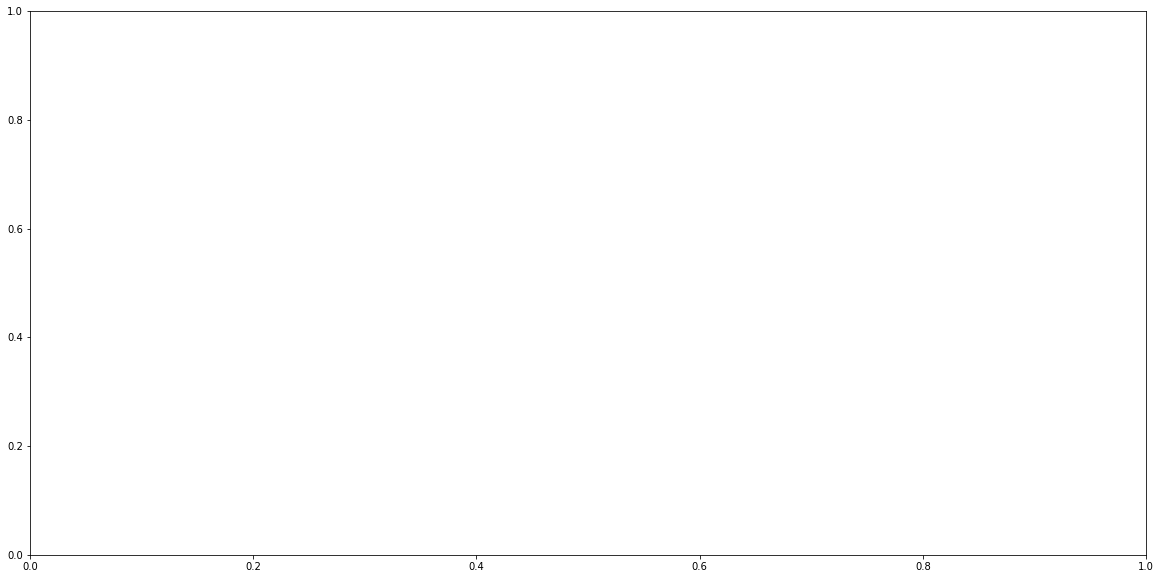

In [5]:
import matplotlib.pyplot as plt
x = range(1, 2001)
plt.figure(figsize=(20,10))
plt.subplot(1, 1, 1)
plt.plot(x, G_list, '-o', label='G')
plt.title('G vs. epoches')
plt.ylabel('LOSS')

plt.show()

In [ ]:
x = range(1, 2001)
plt.figure(figsize=(20,10))
plt.subplot(1, 1, 1)
plt.plot(x, D_z_list, '--o', label='D_z')
plt.title('Z vs. epoches')
plt.ylabel('LOSS')

plt.show()

In [ ]:
x = range(1, 2001)
plt.figure(figsize=(20,10))
plt.subplot(1, 1, 1)
plt.plot(x, D_img_list, '-.o', label='D_img')
plt.title('IMG vs. epoches')
plt.ylabel('LOSS')

plt.show()

In [ ]:
show_path = '/home/wpk/paper/code/Comparison_experiments/ExprGAN/image'
# show_path = '/home/wpk/paper/code/Comparison_experiments/ExprGAN/image_test'
name_list = os.listdir(show_path)
name_list.sort()
plt.figure(figsize=(20,120))
index = 1
print(len(name_list))
for i in range(len(name_list)):
    if 'epoch300_' in name_list[i]:
        image_dst = Image.open(os.path.join(show_path, name_list[i])) 
        plt.subplot(50, 5, index)
        plt.title(name_list[i])
        plt.imshow(image_dst)
        
        index += 1
plt.show()